# Analise de Dados Cards Yu Gi Oh

![imagen](https://store-images.s-microsoft.com/image/apps.42818.65935711642560027.0a5508b2-97cc-454e-bc78-fca0b9474931.eed4b951-b090-41e0-83a9-2af5b16761e4?mode=scale&q=90&h=1080&w=1920&format=jpg)

## O Jogo

A série de mangá e anime Yu-Gi-Oh! introduz o jogo de cartas colecionáveis original criado por Kazuki Takahashi, desenvolvido e publicado pela Konami. 

O jogo começou a ser produzido em 1998, e hoje é jogado no mundo inteiro. O jogo possui algumas diferenças quanto ao fictício, pois este servia para se adequar ao enredo. Takahashi começou a fazer as cartas em 1996. 

Em agosto de 2008, a TV Tokyo relatou que o jogo de cartas da série já vendeu mais de 18 milhões de cartas em todo o mundo.[33] Em 9 de junho de 2009, em seu aniversário de 10 anos, foi adicionado ao Guinness World Records como o jogo de cartas mais bem sucedido, tendo vendido mais de 22 bilhões e meio de cartas ao redor do mundo desde o início de sua fabricação.[34] 

Em 31 de março de 2011, a Konami já vendeu mais de 25 milhões de cartões em todo o mundo desde 1999.[35] O jogo continua a ganhar popularidade, já que é jogado em todo o mundo, principalmente no Japão, América do Norte, Europa e Austrália, e foi ampliado com novas regras e adições conforme a franquia cresce.


## As cartas.

A esfera que representa o nível do monstro.
O jogo de cartas - cujo nome original é Yu-Gi-Oh! Trading Card Game (遊☆戯☆王 オフィシャルカードゲーム em japonês, Yū☆Gi☆Ō turadingu Kādo Gēmu em rōmaji, abreviado como TCG) - é baseado em batalhas de monstros e ativação de efeitos bônus e armadilhas num duelo entre 2 oponentes, cada um possuindo 8000 LPs (Life Points, ou Pontos de Vida) e usando Decks (baralhos) de 40 a 60 cartas.

O perdedor é aquele que tem seus pontos de vida reduzidos à zero,[36] ou quem não tiver mais cartas para puxar.[37]

> Tradicional: Neste formato de duelo, quase todas as cartas existentes desde a primeira coleção (Legend of Blue-Eyes Dragon) até a mais recente são permitidas para jogar - exceto cartas "banidas" conforme uma lista periódica (anteriormente semestral ou trimestral, agora sem um período fixo) publicada pela Konami. Normalmente, pessoas que jogam neste formato usam decks de First Turn Kill (onde não há chance de o oponente jogar se a estratégia do Deck tiver sucesso), One Turn Kill (onde o oponente tem seus pontos de vida reduzidos a 0 num mesmo turno) e decks com cartas limitadas e restritas.[38]

> Avançado: Neste formato, mais largamente utilizado nos torneios, há maior limitação das cartas permitidas para uso (algumas cartas são limitadas a 2 ou 1 por Deck). Por causa disto, aqui predominam os Decks baseados no controle da partida através da interrupção das investidas do oponente (ou "controle de campo") ou remoção de cartas.[39]

Os campeonatos mais conhecidos e movimentados são Yu-Gi-Oh! World Championship e Yu-Gi-Oh! Championship Series, ou YCS, mas há outros tipos de campeonatos, como a "Pegasus League" (com regras próprias e variadas a cada torneio), "Sneak Peek" (torneios de Decks montados com a coleção mais recente),"Dragon Duel" (com crianças até 12 anos),World Championship Qualifier;ou WCQ, Yu-Gi-Oh! Day e Ultimate Duelist Series, ou UDS.

# Analise de Dados

![](https://miro.medium.com/max/875/1*eTkbro695IQB_UPUGk1WSw.jpeg)

# Bibliotecas (Instalação)

In [96]:
#install.packages('tidyverse')
#install.packages('ggExtra')
#install.packages('repr')
#install.packages('treemap')
#install.packages('ggalt')
#install.packages('ggfortify')
#install.packages('RColorBrewer')
#install.packages("viridis")


# Bibliotecas (Importação)

In [97]:
library(tidyverse)
library(repr)
library(RColorBrewer)
library(viridis)
library(ggExtra)
library(treemap)
library(ggalt)
library(ggfortify)

# Carga dos dados

Vc pode baixar do GitHub ou baixar o arquivo e salvar na sua máquina vou fazer aqui pelos dois métodos

In [98]:
url = 'https://raw.githubusercontent.com/DeepFluxion/Analise_Dados_Linguagem_R/master/data/ygo.csv'

In [99]:
ygo <- read.csv(url)

In [100]:
ygo <- read.csv(file = 'data/ygo.csv')

# Mudando o nome das Colunas

In [101]:
names(ygo)<-c('ID','Nome','Ataque','Atributo','Defesa','has_materials',
             'has_name_condition','is_extra_deck','is_fusion','is_link','is_pendulum',
             'is_synchro','is_xyz','link_markers','link_number','materiais','monster_types','name_condition',
             'numero','pendulum_left','pendulum_right','pendulum_text','lancamentos','Tipo','estrelas','texto')

# EDA preliminar

Para começar, vamos fazer uma análise para ter uma ideia dos dados.

Em primeiro lugar, quais dados realmente temos?

- Nome: o nome do cartão. Isso pode ser potencialmente útil para construir um modelo preditivo, se usado com a PNL. Por exemplo, muitos cards de Guerreiro podem conter Guerreiro em seu nome ou uma palavra semelhante, como Samurai ou Cavalo.
- Ataque: O ataque da carta. Varia entre 0 e 5.000.
- Atributo: o atributo do cartão. Abrange os quatro elementos clássicos, Terra, Vento, Água e Fogo, junto com Luz, Escuro e Divino.
- Defesa: A defesa da carta. Varia entre 0 e 5.000.
- has_materials: se o cartão precisa de materiais para sua invocação (Xyz, Synchro etc)
- has_name_condition: se o cartão tem uma condição especial relacionada ao seu nome.
- is_extra_deck: se a carta é encontrada no baralho extra. Este é um catchall para Fusion, Xyz, Synchro etc
- is_fusion: Se o cartão é uma fusão ou não.
- is_link: Se a carta é um monstro Link ou não.
- is_pendulum: se a carta é um pêndulo ou não.
- is_synchro: Se o cartão é um Synchro ou não.
- is_xyz: se o cartão é Xyz ou não.
- link_markers: a posição dos marcadores de link de um cartão.
- link_number: O número do link do cartão.
- materiais: se um cartão precisa de materiais para convocar, esses são os materiais necessários.
- monster_types: O (s) tipo (s) de card. Como Normal, Effect, Fusion, Flip etc.
- name_condition: Qual é a condição do nome do cartão.
- número: a senha do cartão.
- pendulum_left: O valor da escala do pêndulo esquerdo.
- pendulum_right: O valor da escala direita do pêndulo.
- pendulum_text: O efeito do pêndulo da carta (se houver)
- lancamentos: quando um cartão foi lançado.
- Tipo: o tipo da carta, como Máquina, Guerreiro etc.
- estrelas: quantos níveis ou classificações uma carta possui.
- texto: o efeito da carta ou texto de sabor.

O lugar mais fácil para começar, são os 3 valores numéricos mais óbvios quando se olha para uma carta, o ataque, a defesa e as estrelas (nível / classificação). Isso dá a você uma ideia geral do poder da carta, sem considerar seu efeito. Claro, sem o efeito considerado, você não obtém a imagem completa.

Tmabém vamos trabalhar com Atributo e Tipo que parecem bem interssante de se explorar

# Analisando os Atributos

In [102]:
g<- ygo %>% 
    count(Atributo, sort = TRUE)
g

Atributo n   
1 DARK     1614
2 EARTH    1491
3 LIGHT    1212
4 WATER     598
5 WIND      552
6 FIRE      472
7 DIVINE     10

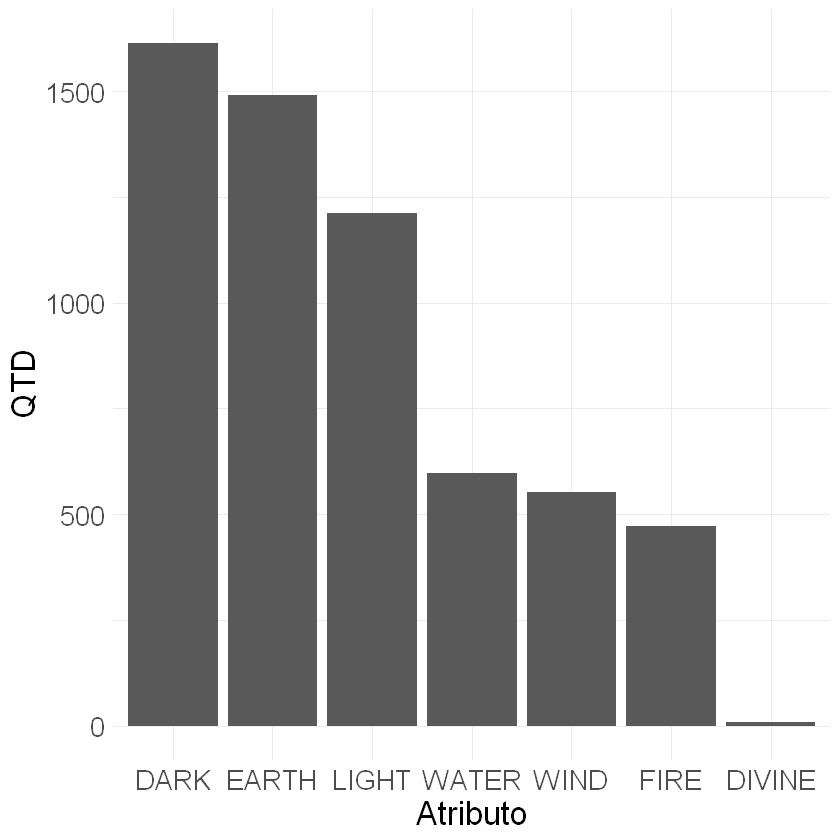

In [103]:
options(repr.plot.width=7, repr.plot.height=7)
ggplot(data = g, aes(x=reorder(Atributo, -n), y=n))+
  geom_bar(stat="identity")+
  theme_minimal()+
  theme(text = element_text(size = 20))+
  ylab('QTD')+
  xlab('Atributo')

# Analisando os Tipos

In [104]:
g<- ygo %>% 
    count(Tipo, sort = TRUE)
g

Tipo          n  
1  Warrior       821
2  Machine       699
3  Fiend         592
4  Spellcaster   506
5  Dragon        464
6  Fairy         358
7  Beast         300
8  Winged Beast  247
9  Aqua          197
10 Insect        193
11 Rock          190
12 Beast-Warrior 186
13 Zombie        173
14 Plant         171
15 Reptile       136
16 Psychic       122
17 Pyro          108
18 Fish           98
19 Thunder        97
20 Dinosaur       88
21 Cyberse        80
22 Sea Serpent    62
23 Wyrm           51
24 Divine-Beast    8
25 Creator God     2

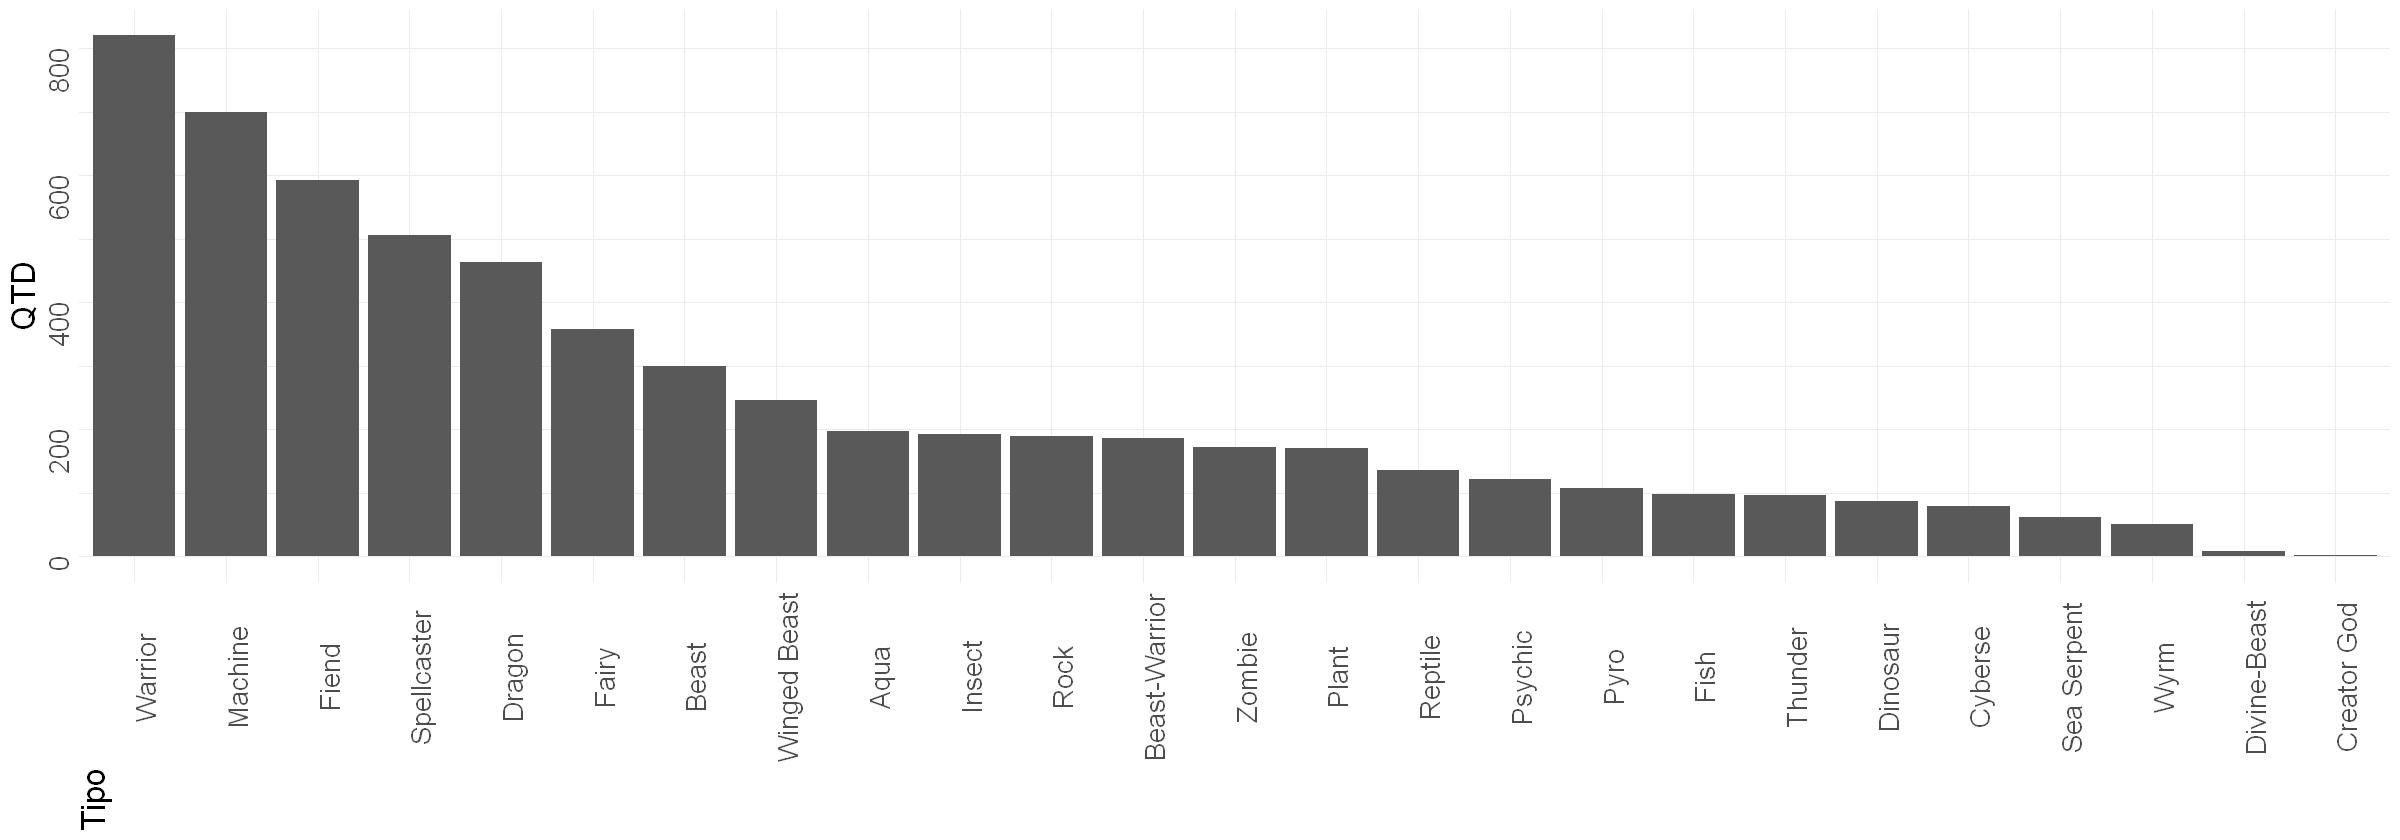

In [105]:
options(repr.plot.width=20, repr.plot.height=7)
ggplot(data = g, aes(x=reorder(Tipo, -n), y=n))+
  geom_bar(stat="identity")+
  theme_minimal()+
  theme(text = element_text(size = 20,angle = 90))+
  ylab('QTD')+
  xlab('Tipo')

# Analisando os Atrubutos, Ataque, Defesa e Estrelas

In [106]:
ygo %>% 
  group_by(Atributo)%>% 
  summarise(mean(Ataque,na.rm = TRUE),
            mean(Defesa,na.rm = TRUE),
            mean(estrelas,na.rm = TRUE))

`summarise()` ungrouping output (override with `.groups` argument)



Atributo mean(Ataque, na.rm = TRUE) mean(Defesa, na.rm = TRUE)
1 DARK     1531.067                   1209.015                  
2 DIVINE   4000.000                   4000.000                  
3 EARTH    1372.546                   1206.550                  
4 FIRE     1573.134                   1152.065                  
5 LIGHT    1601.266                   1323.865                  
6 WATER    1405.705                   1236.041                  
7 WIND     1409.909                   1203.033                  
  mean(estrelas, na.rm = TRUE)
1  4.746052                   
2 10.222222                   
3  4.162457                   
4  4.526998                   
5  4.713922                   
6  4.138514                   
7  4.192308

# Analisando os Tipos, Ataque, Defesa e Estrelas

In [107]:
ygo %>% 
  group_by(Tipo)%>% 
  summarise(mean(Ataque,na.rm = TRUE),
            mean(Defesa,na.rm = TRUE),
            mean(estrelas,na.rm = TRUE))

`summarise()` ungrouping output (override with `.groups` argument)



Tipo          mean(Ataque, na.rm = TRUE) mean(Defesa, na.rm = TRUE)
1  Aqua          1149.239                   1176.5306                 
2  Beast         1267.726                   1092.5926                 
3  Beast-Warrior 1634.167                   1162.5698                 
4  Creator God        NaN                         NaN                 
5  Cyberse       1427.500                   1002.0833                 
6  Dinosaur      1756.977                   1219.8851                 
7  Divine-Beast  4000.000                   4000.0000                 
8  Dragon        2111.087                   1633.9207                 
9  Fairy         1467.887                   1284.5029                 
10 Fiend         1442.151                   1106.1391                 
11 Fish          1353.061                   1073.4694                 
12 Insect        1134.635                   1042.7419                 
13 Machine       1441.691                   1353.1341                 
14 Plant         1179.240                   1060.2941                 
15 Psychic       1577.049                   1246.6667                 
16 Pyro          1424.762                    950.9524                 
17 Reptile       1292.105                   1026.6667                 
18 Rock          1381.383                   1398.3957                 
19 Sea Serpent   1762.097                   1269.6721                 
20 Spellcaster   1317.369                   1189.4309                 
21 Thunder       1373.158                   1059.7938                 
22 Warrior       1619.756                   1296.1063                 
23 Winged Beast  1358.740                   1128.2520                 
24 Wyrm          1955.882                   1645.9184                 
25 Zombie        1506.509                    895.9064                 
   mean(estrelas, na.rm = TRUE)
1   3.719388                   
2   3.855705                   
3   4.432432                   
4  12.000000                   
5   3.458333                   
6   4.750000                   
7  10.000000                   
8   6.052980                   
9   4.649275                   
10  4.466552                   
11  4.010204                   
12  3.668449                   
13  4.723589                   
14  3.511765                   
15  4.300000                   
16  4.250000                   
17  4.191176                   
18  4.306878                   
19  4.377049                   
20  4.032129                   
21  4.237113                   
22  4.627936                   
23  4.235772                   
24  5.693878                   
25  4.168605

# Visualizando os Atributos com um TREMAP

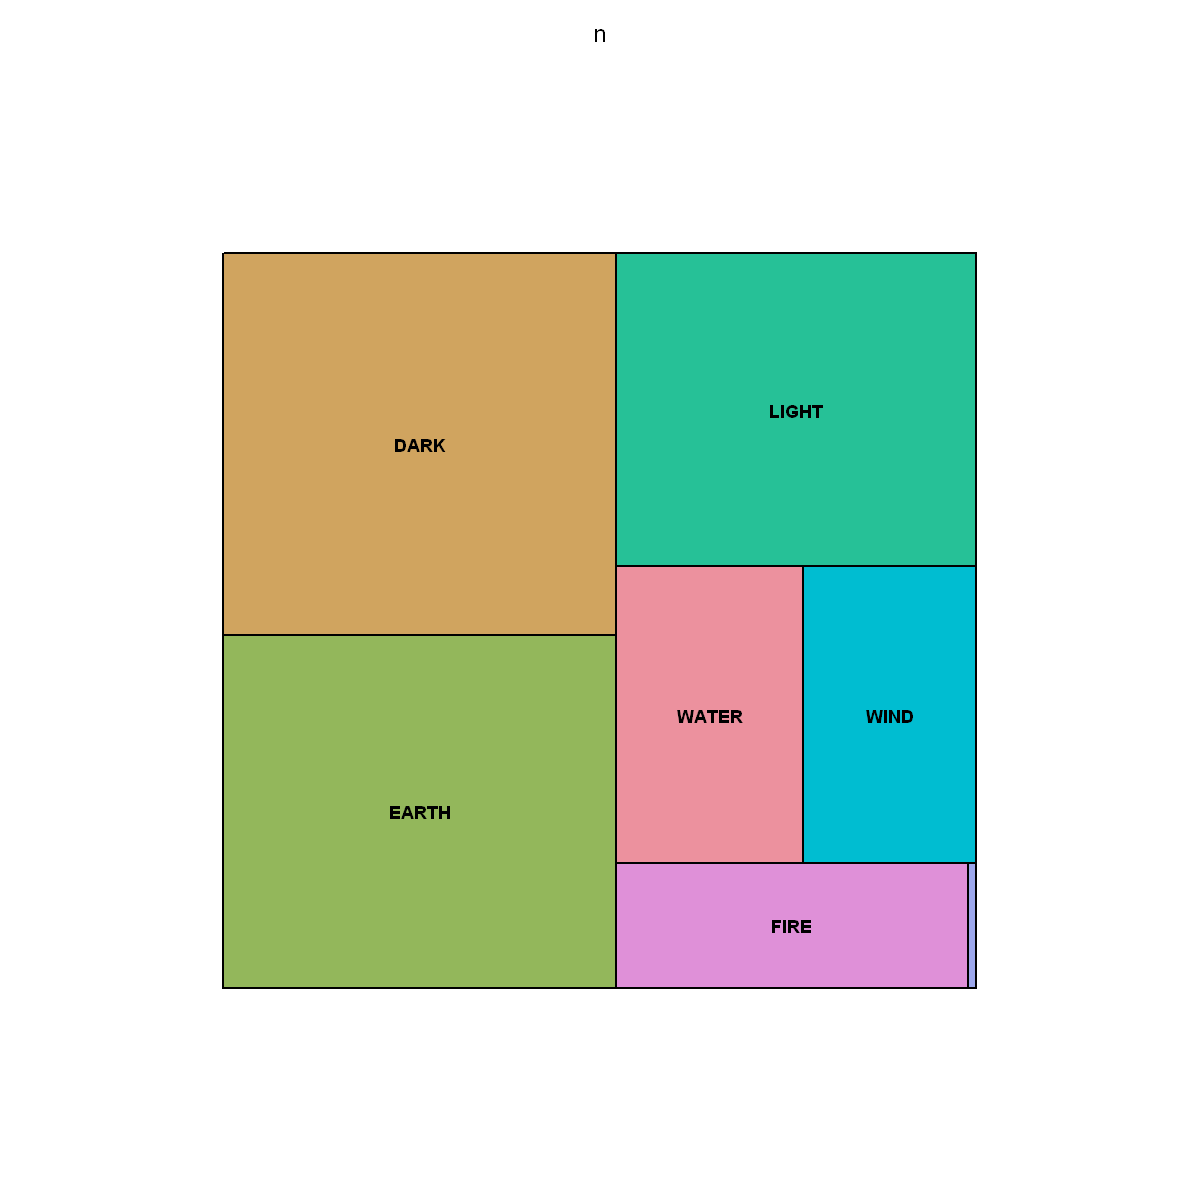

In [108]:
options(repr.plot.width=10, repr.plot.height=10)
c<- ygo %>% 
  count(Atributo, sort = TRUE)
treemap(c,
        index="Atributo",
        vSize="n",
        type="index")

# Visualizando os Tipos com um TREMAP

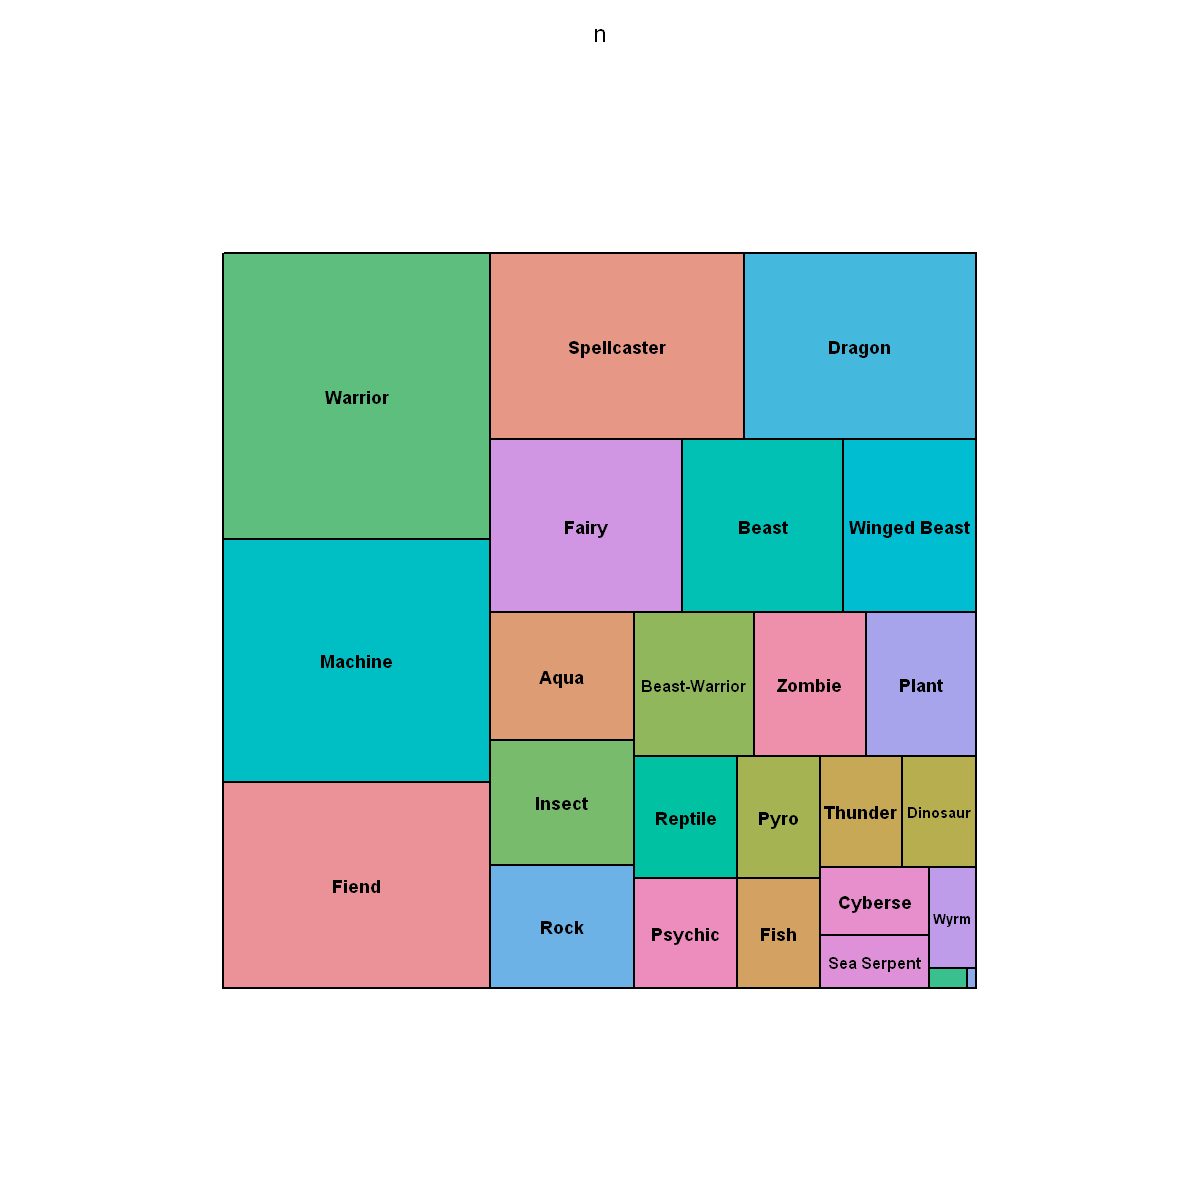

In [109]:
options(repr.plot.width=10, repr.plot.height=10)
c<- ygo %>% 
  count(Tipo, sort = TRUE)
treemap(c,
        index="Tipo",
        vSize="n",
        type="index")

# Visualizando os Tipos com um TREMAP

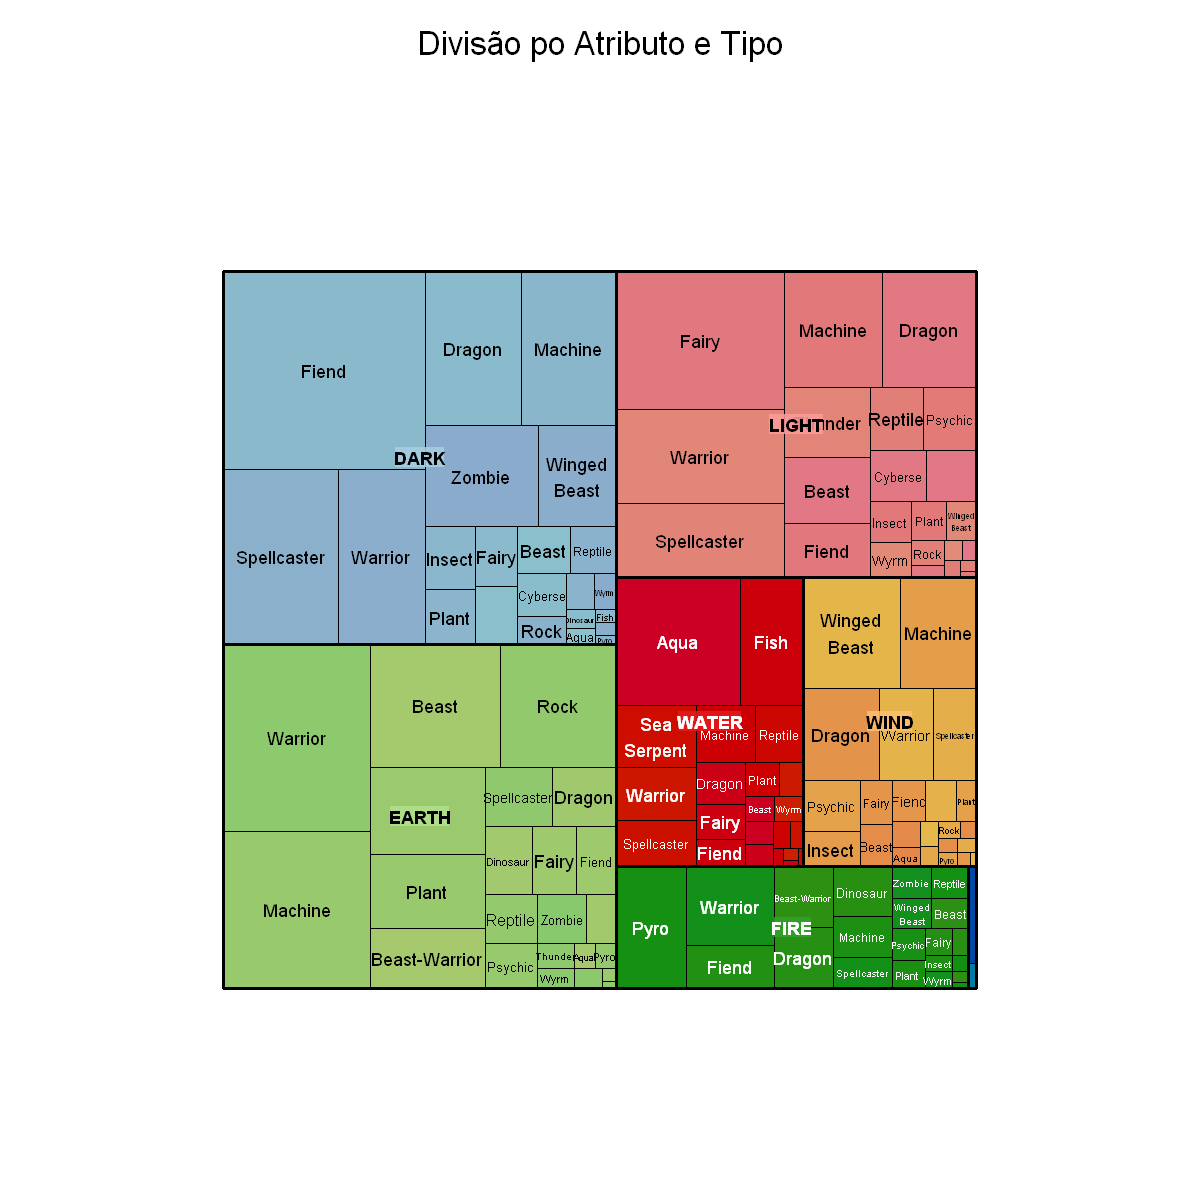

In [110]:
g<- ygo %>% 
  group_by(Tipo)%>% 
  count(Atributo, sort = TRUE)

options(repr.plot.width=10, repr.plot.height=10)
treemap(g, #Your data frame object
        index=c("Atributo","Tipo"),  #A list of your categorical variables
        vSize = "n",  #This is your quantitative variable
        type="index", #Type sets the organization and color scheme of your treemap
        palette = "Paired",  #Select your color palette from the RColorBrewer presets or make your own.
        title="Divisão po Atributo e Tipo", #Customize your title
        fontsize.title = 20 #Change the font size of the title
        )

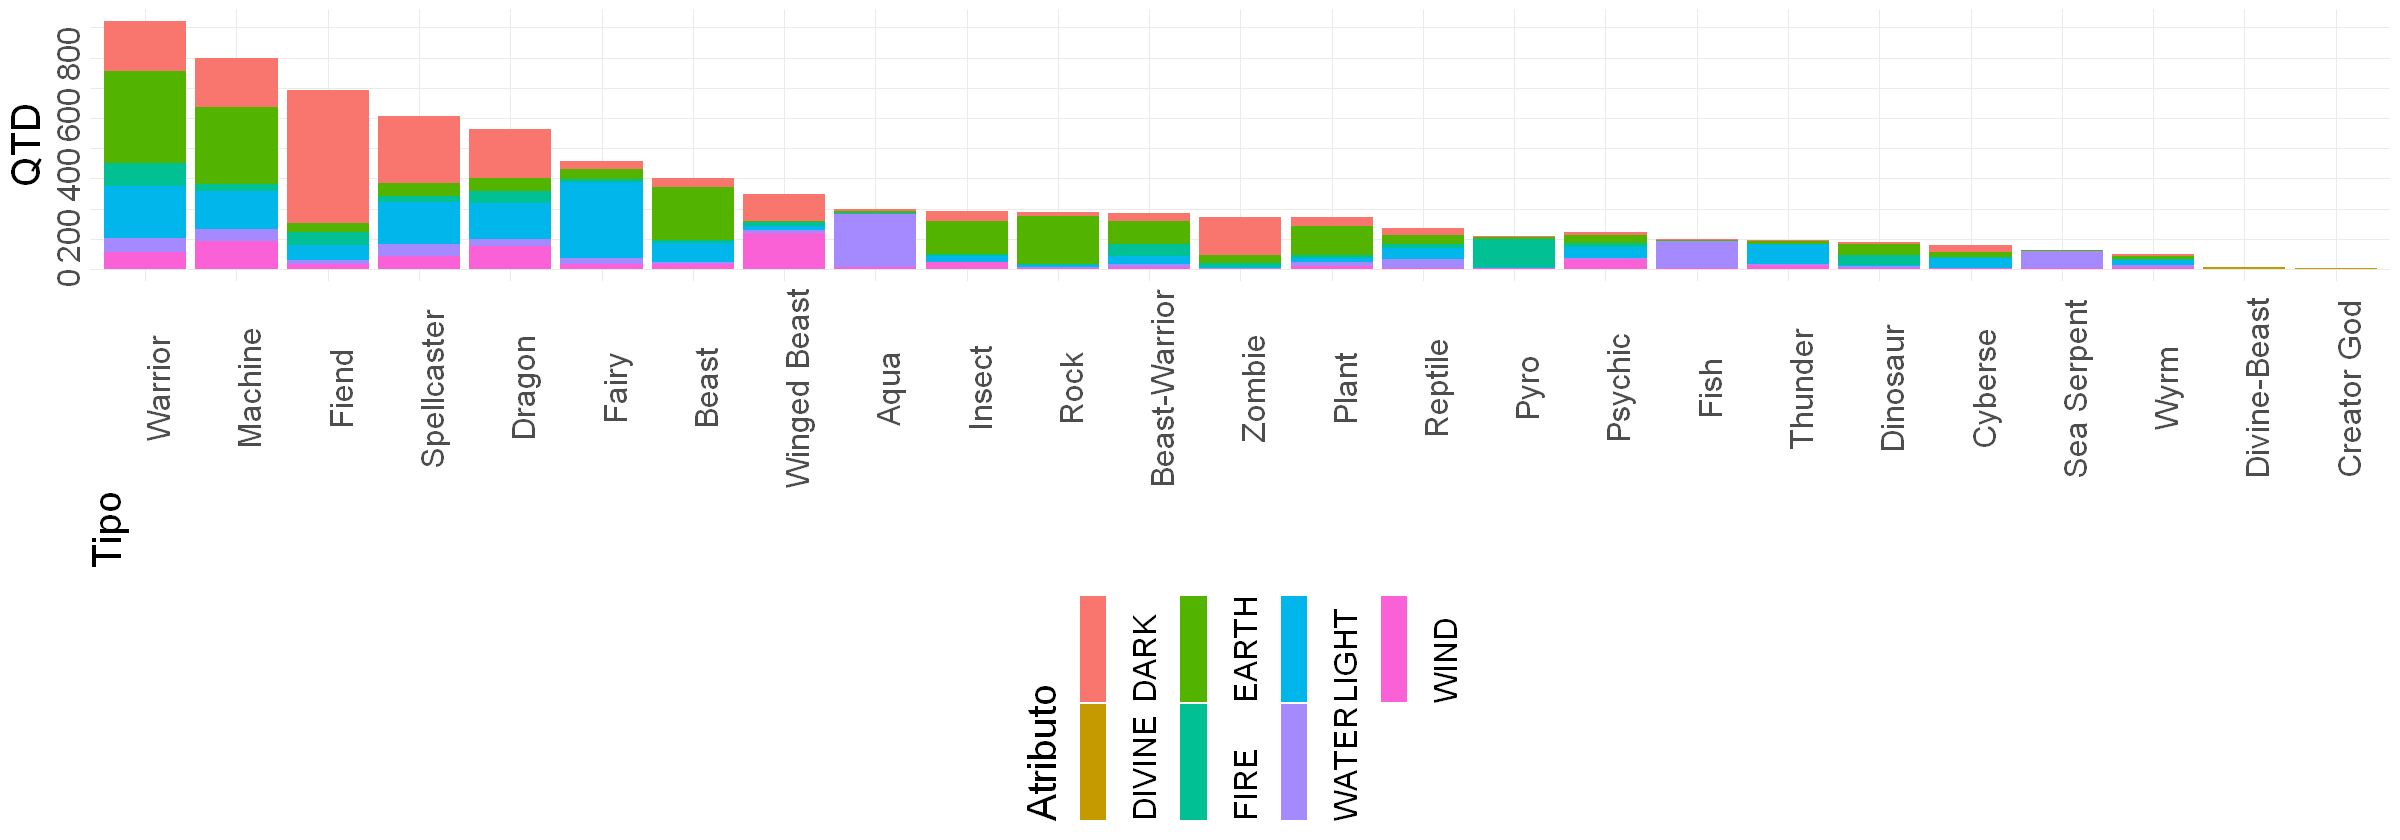

In [112]:
options(repr.plot.width=20, repr.plot.height=7)
ggplot(data = g, aes(x=reorder(Tipo, -n), y=n, fill=Atributo))+
  geom_bar(stat="identity")+
  theme_minimal()+
  theme(text = element_text(size = 24,angle = 90),legend.position="bottom")+
  ylab('QTD')+
  xlab('Tipo')

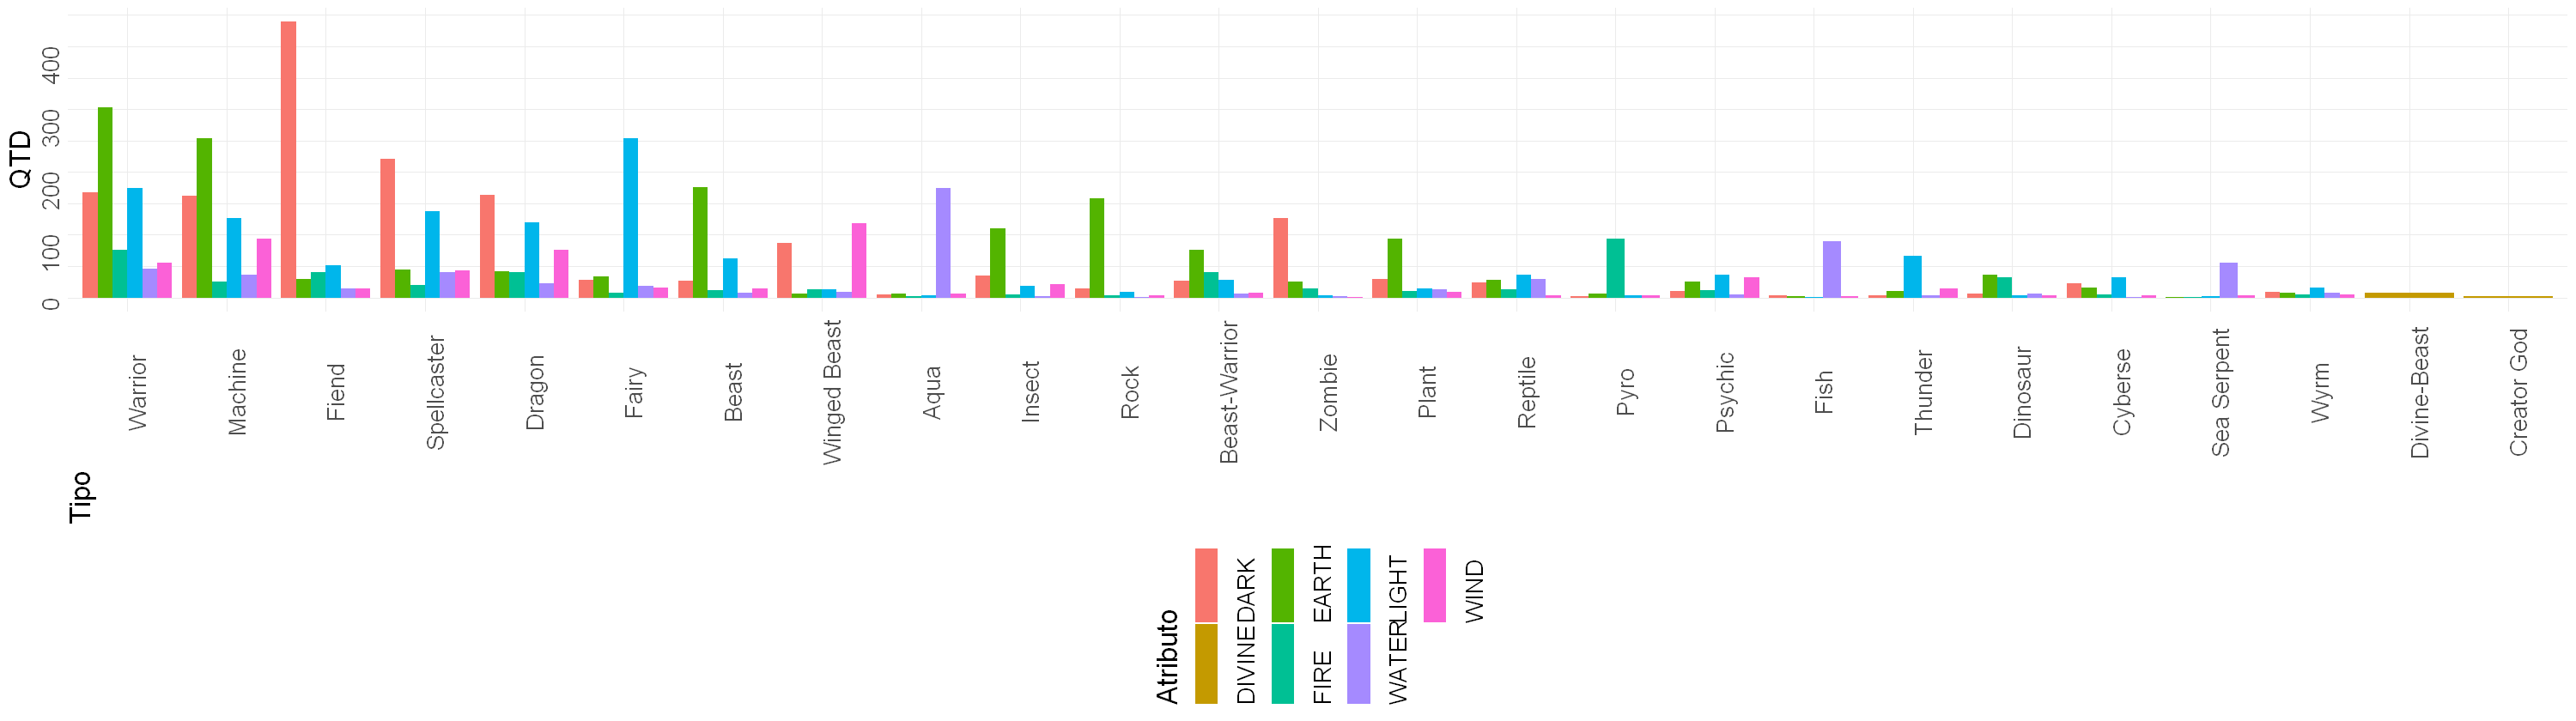

In [113]:
options(repr.plot.width=25, repr.plot.height=7)
ggplot(data = g, aes(x=reorder(Tipo, -n), y=n, fill=Atributo))+
  geom_bar(stat="identity", position=position_dodge())+
  theme_minimal()+
  theme(text = element_text(size = 20,angle = 90),legend.position="bottom")+
  ylab('QTD')+
  xlab('Tipo')

# Visualizando so Valores de Ataque por Histogramas

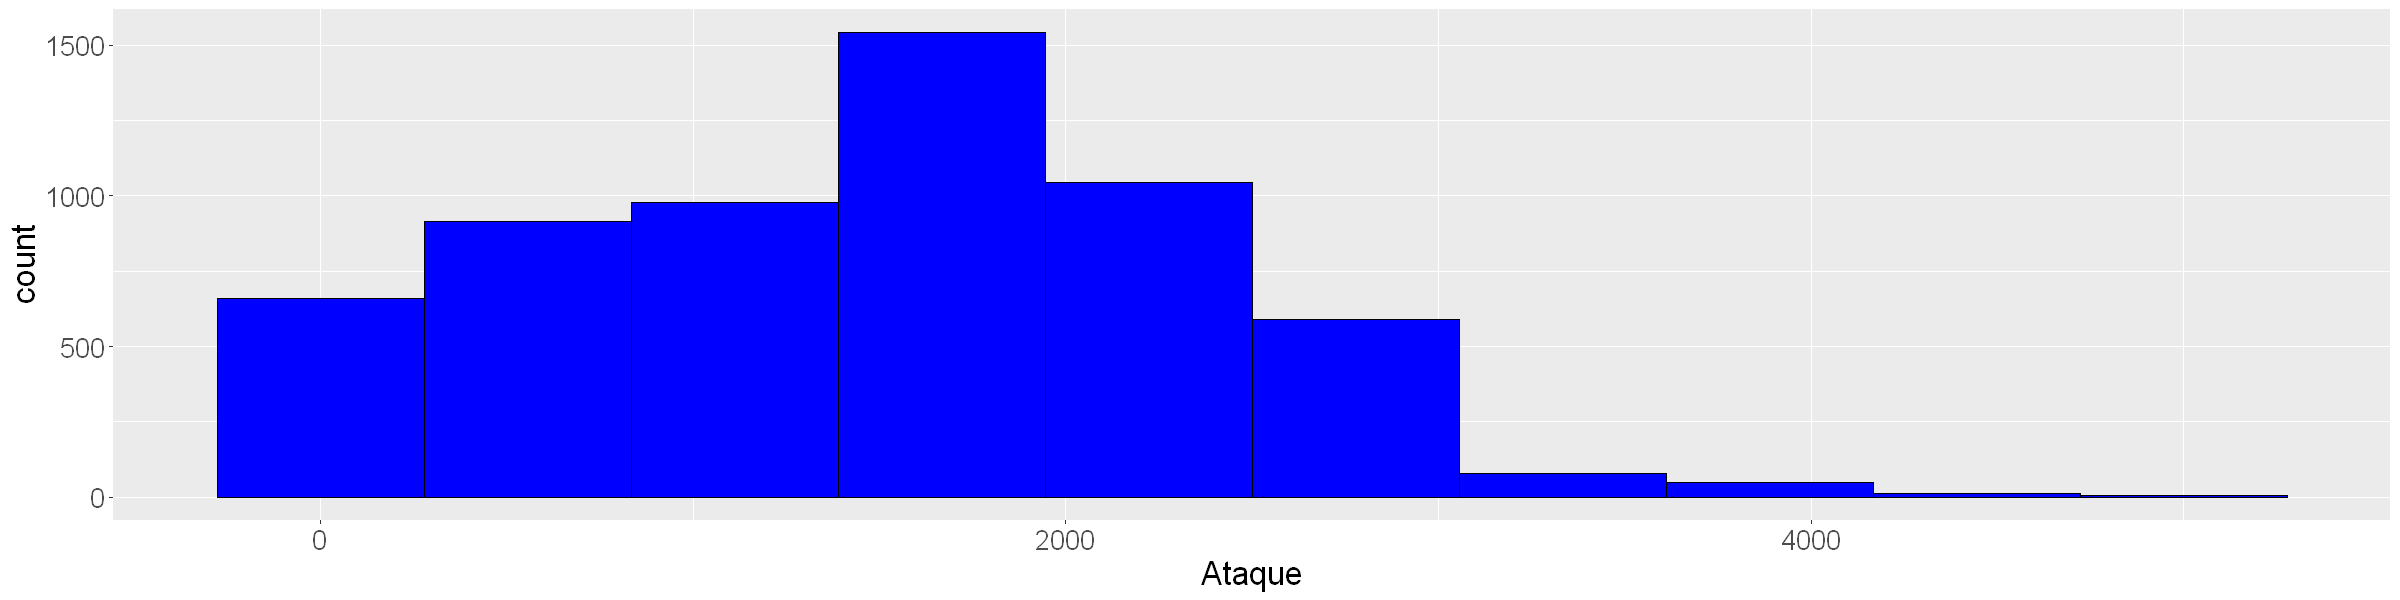

In [114]:
options(repr.plot.width=20, repr.plot.height=5)
ggplot(ygo, aes(x=Ataque)) + 
  geom_histogram(fill="blue", color="black", na.rm=TRUE, bins = 10)+
  theme(text = element_text(size = 20)) 
 

# Visualizando so Valores de Ataque por Grafico de Distribuição

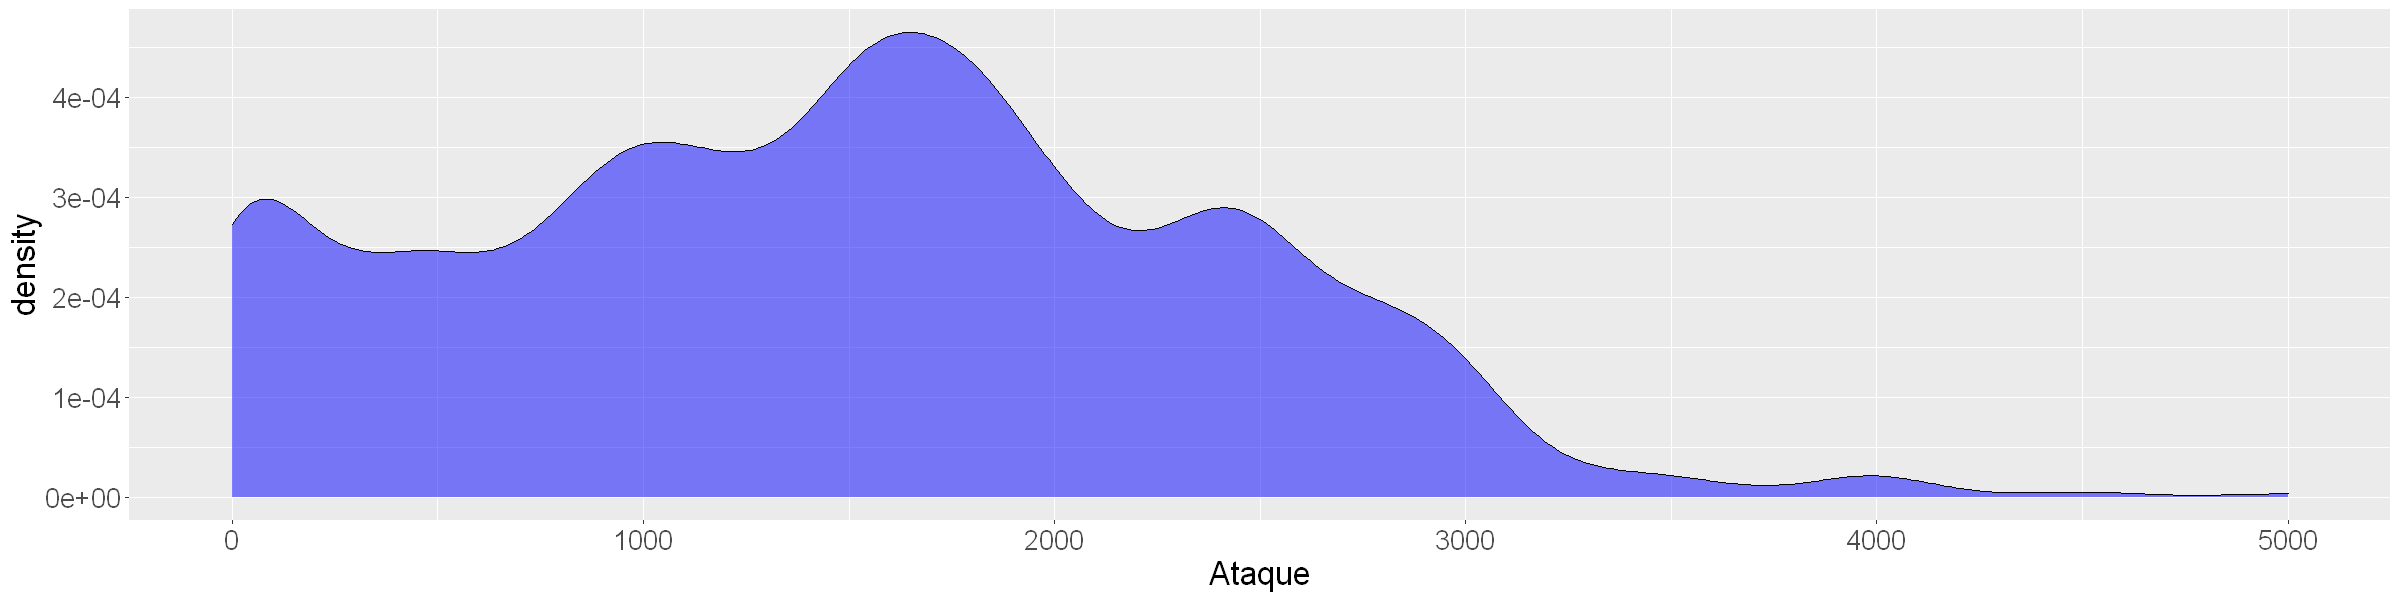

In [115]:
options(repr.plot.width=20, repr.plot.height=5)
ggplot(ygo, aes(x=Ataque)) + 
  geom_density(fill="blue", color="black", alpha=0.5, na.rm = TRUE)+
  theme(text = element_text(size = 20)) 
 

# Visualizando so Valores de  Defesa por Histogramas

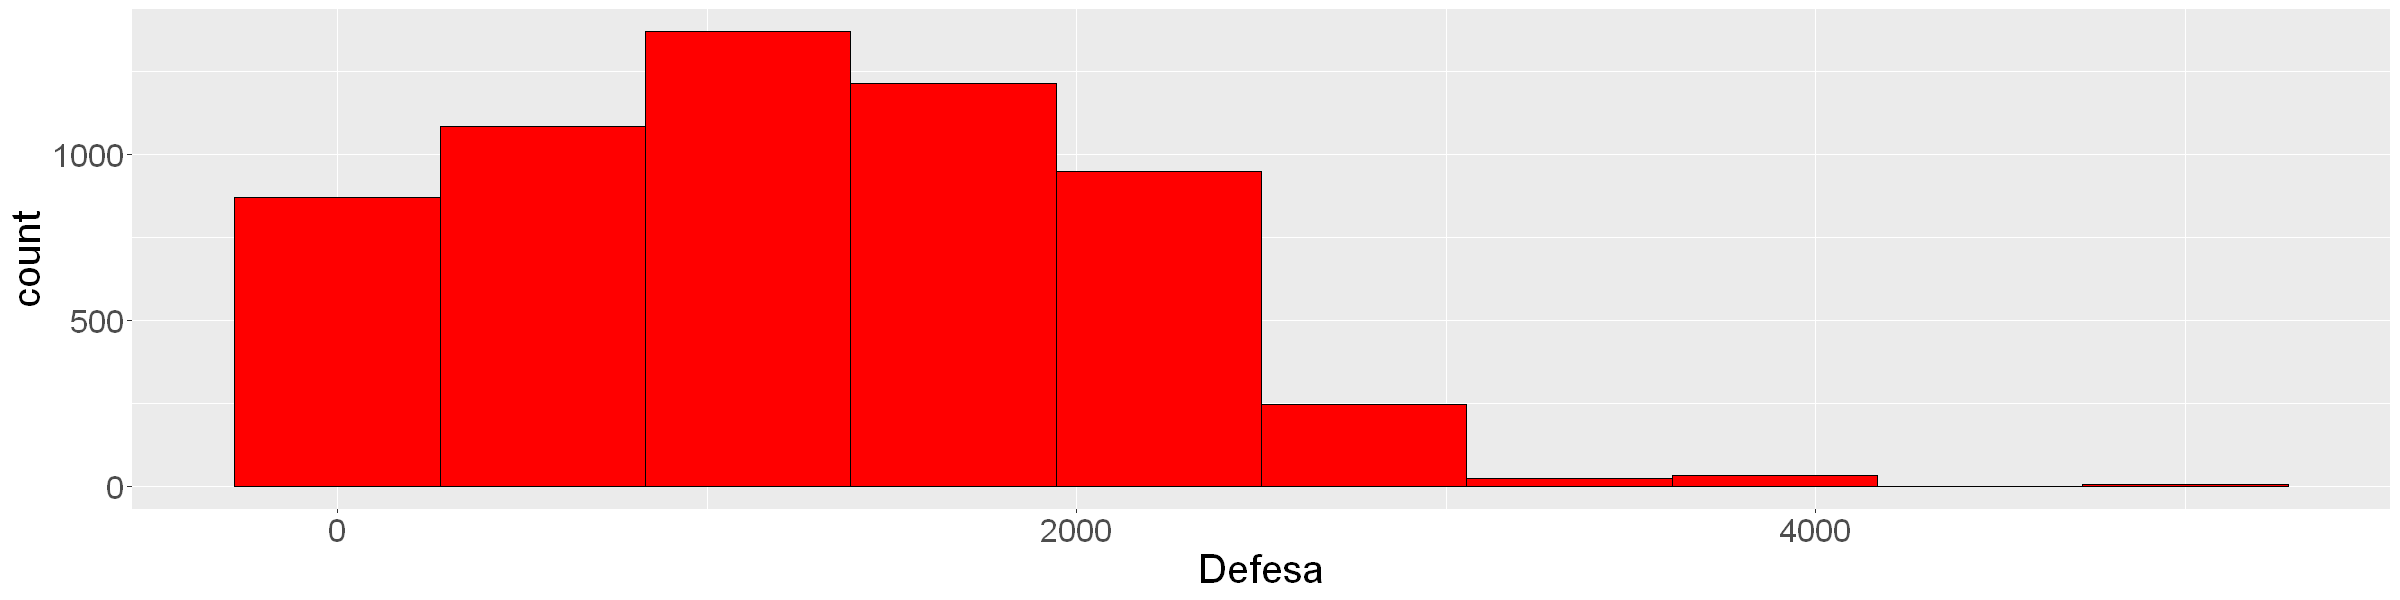

In [116]:
options(repr.plot.width=20, repr.plot.height=5)
ggplot(ygo, aes(x=Defesa)) + 
  geom_histogram(fill="red", color="black", na.rm=TRUE, bins = 10)+
  theme(text = element_text(size = 24)) 
 

# Visualizando so Valores de  Defesa por Grafico de Distribuição

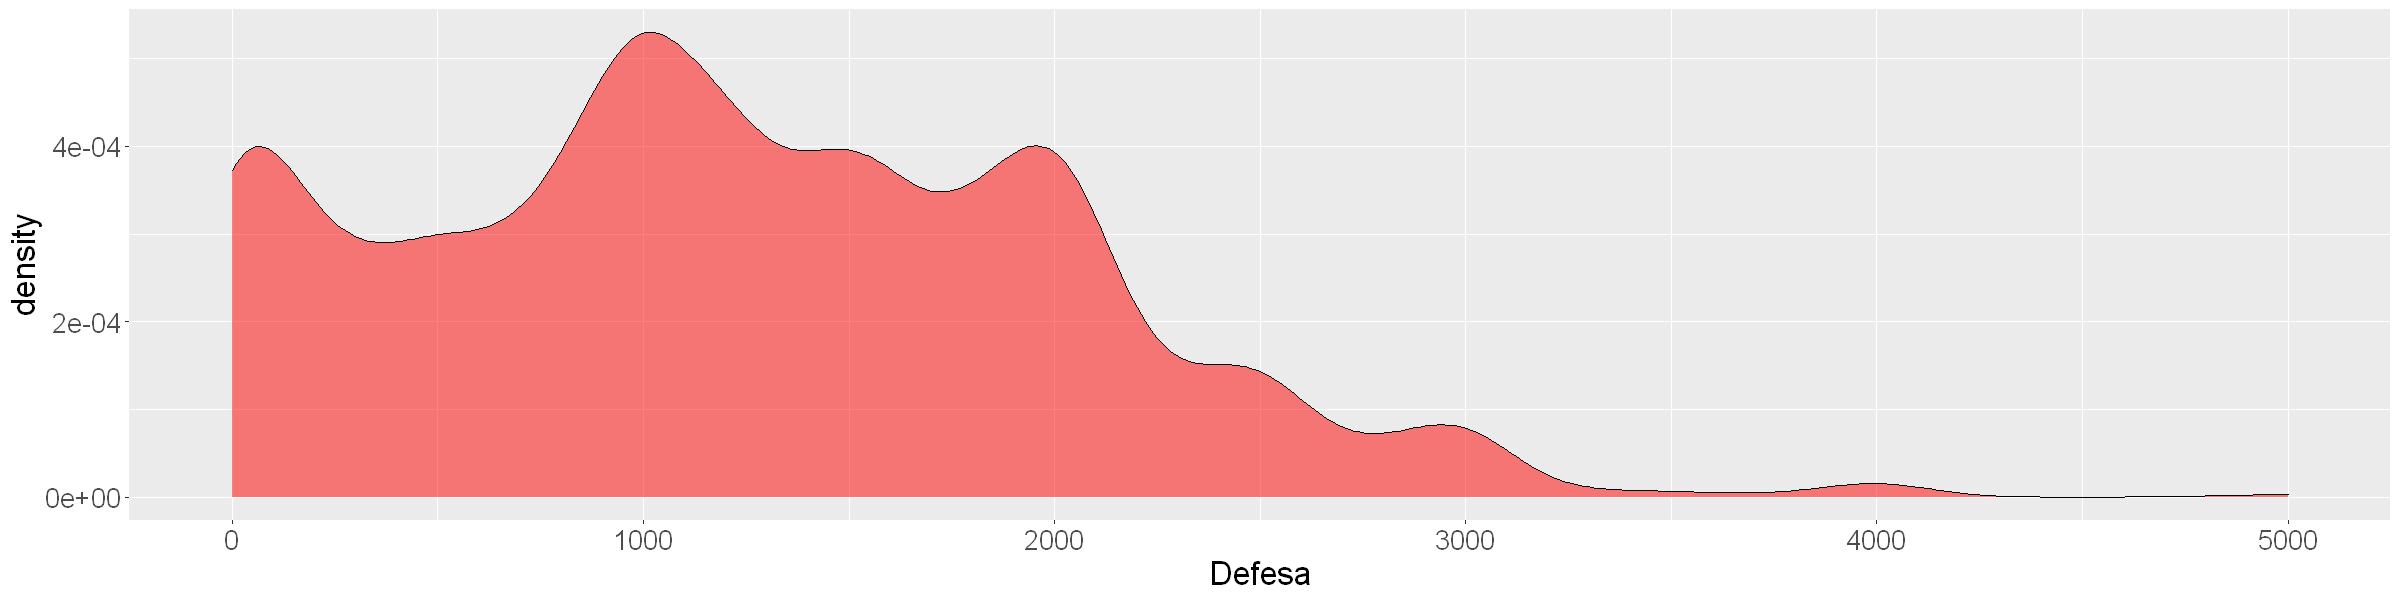

In [117]:
options(repr.plot.width=20, repr.plot.height=5)
ggplot(ygo, aes(x=Defesa)) + 
  geom_density(fill="red", color="black", alpha=0.5, na.rm = TRUE)+
  theme(text = element_text(size = 20)) 
 

# Visualizando so Valores de Estrelas por Histogramas

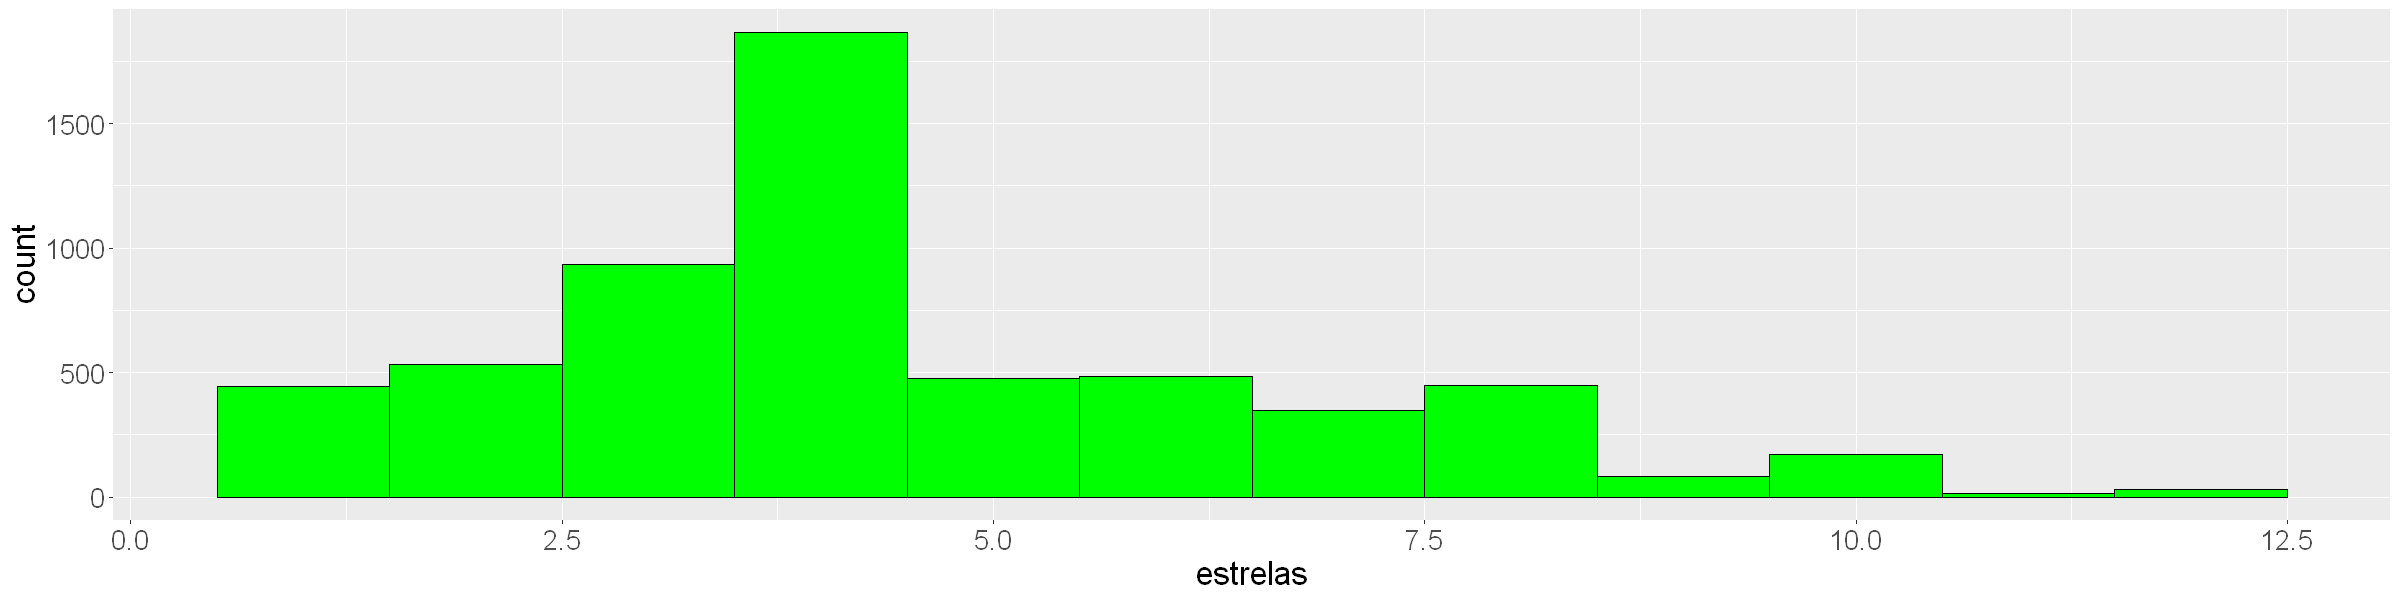

In [118]:
options(repr.plot.width=20, repr.plot.height=5)
ggplot(ygo, aes(x=estrelas)) + 
  geom_histogram(fill="green", color="black", na.rm=TRUE, bins=12)+
  theme(text = element_text(size = 20)) 
 

# Visualizando so Valores de  Estrelas por Grafico de Distribuição

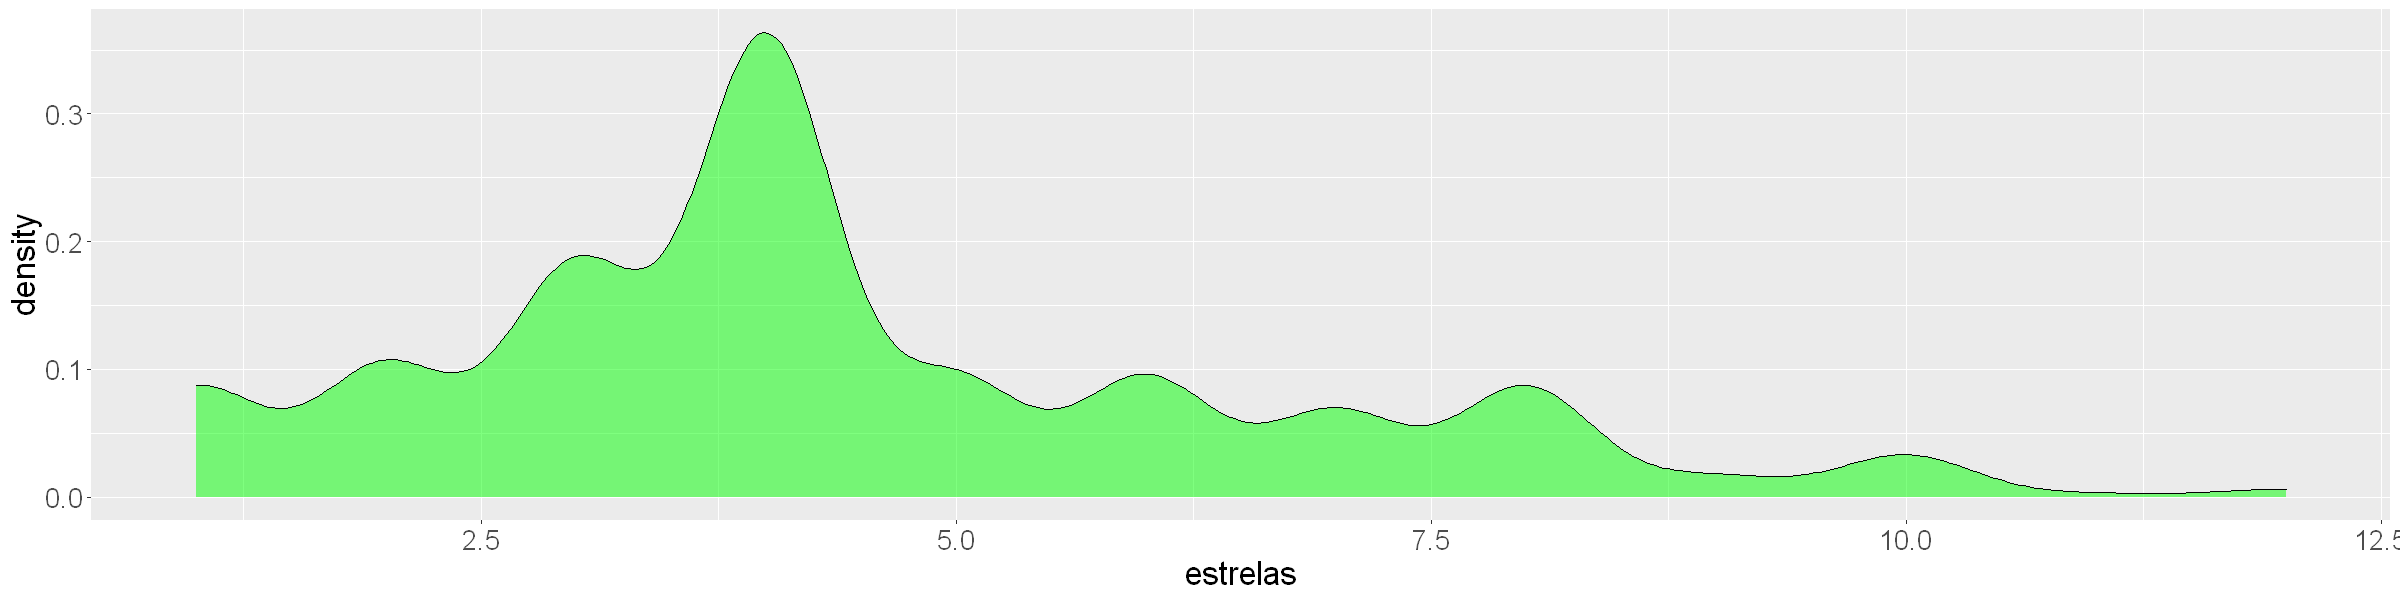

In [119]:
options(repr.plot.width=20, repr.plot.height=5)
ggplot(ygo, aes(x=estrelas)) + 
  geom_density(fill="green", color="black", alpha=0.5, na.rm = TRUE)+
  theme(text = element_text(size = 20)) 
 

# Visualizando a Relação entre Ataque e Defesa

Warning message:
"Removed 176 rows containing missing values (geom_point)."


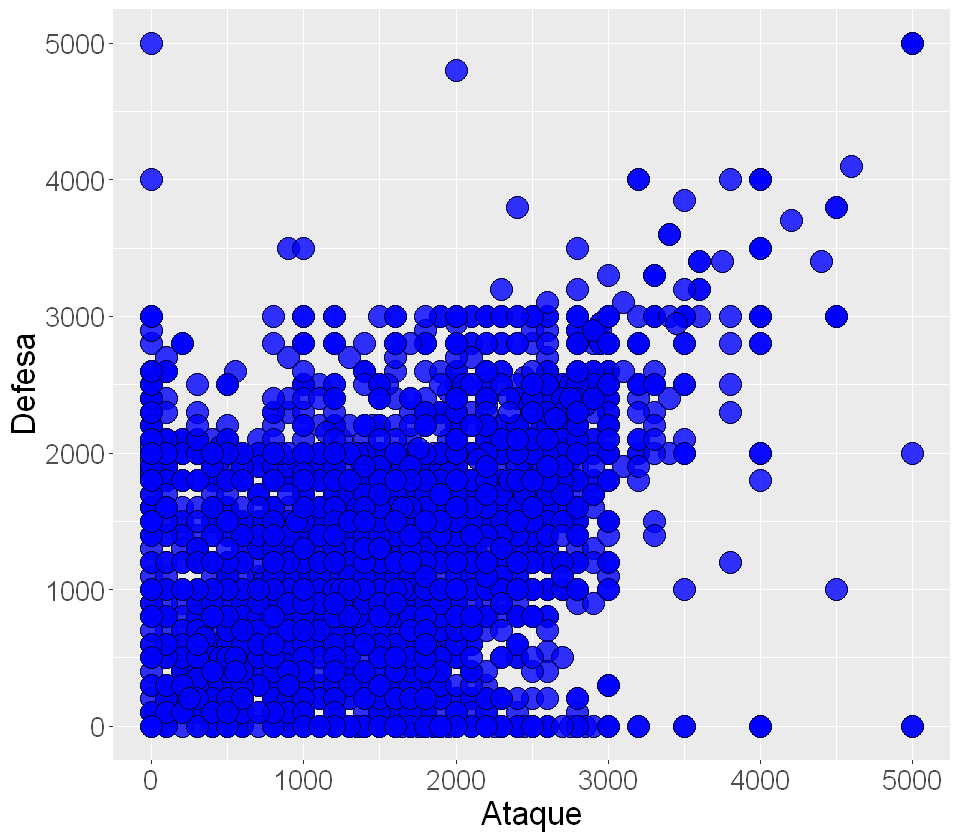

In [120]:
options(repr.plot.width=8, repr.plot.height=7)
ggplot(ygo, aes(x=Ataque, y=Defesa)) + 
   geom_point(
        color="black",
        fill="blue",
        shape=21,
        alpha=0.8,
        size=6
        )+
  theme(text = element_text(size = 20)) 

# Visualizando a Relação entre Ataque, Defesa e Estrelas

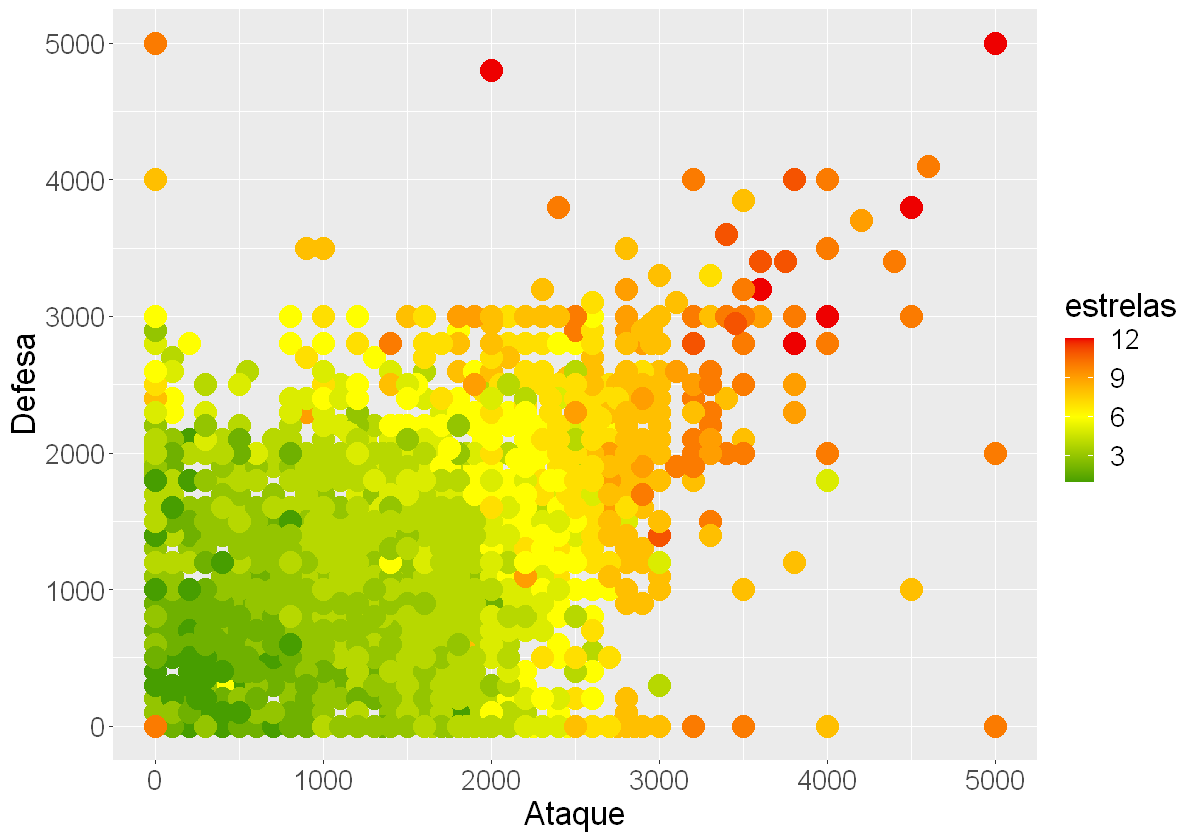

In [121]:
options(repr.plot.width=10, repr.plot.height=7)
ggplot(ygo, aes(x=Ataque, y=Defesa, color=estrelas))+
  geom_point(size=6, na.rm = TRUE) +
  theme_gray()+
  #scale_color_viridis(option = "D")+
  theme(text = element_text(size = 20))+
  scale_colour_gradient2(low = "green4",mid = "yellow",high = "red2",midpoint = 6)

# Visualizando a Relação entre Ataque, Defesa e Estrelas com um Mapa de Contorno

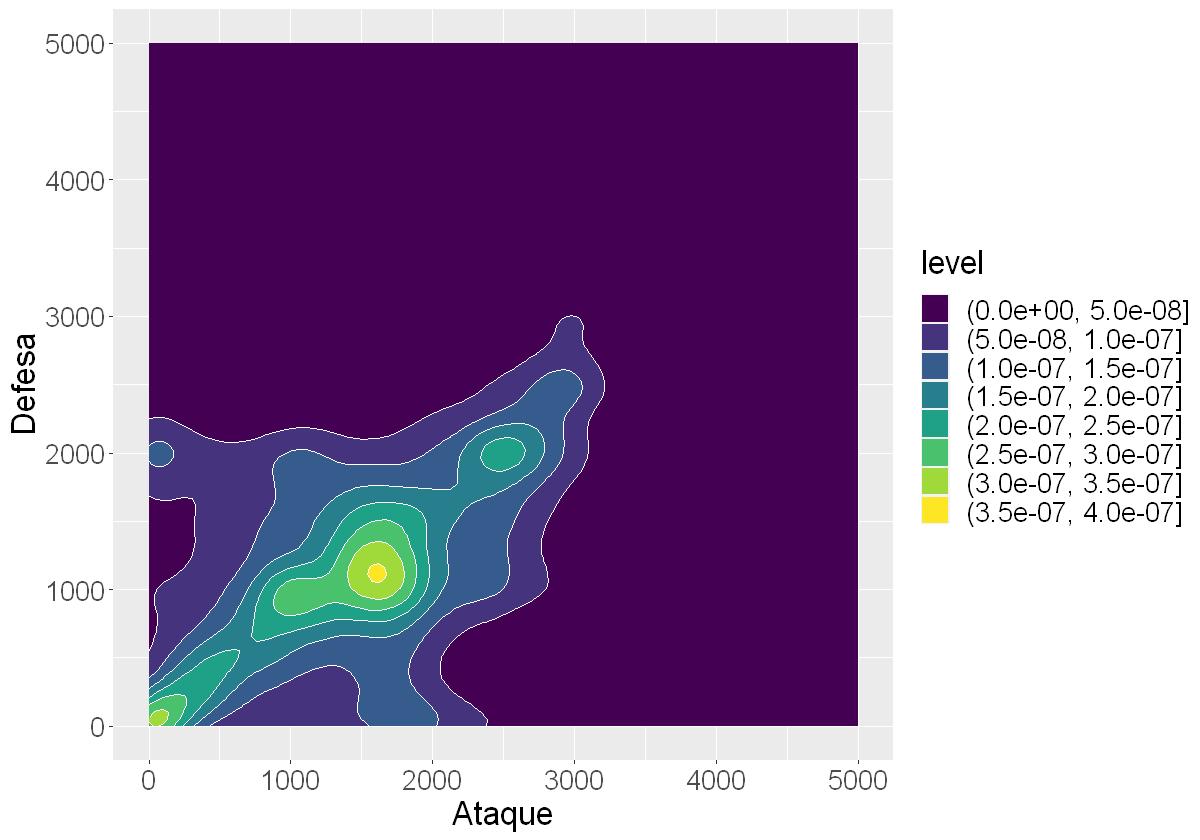

In [122]:
 ggplot(ygo, aes(x=Ataque, y=Defesa, z = estrelas))+ 
     geom_density_2d_filled(na.rm = TRUE)+
     geom_density_2d(color='white', na.rm = TRUE)+
     theme(text = element_text(size = 20)) 

# Visualizando a Relação entre Ataque, Defesa e Estrelas com um Mapa de Contorno

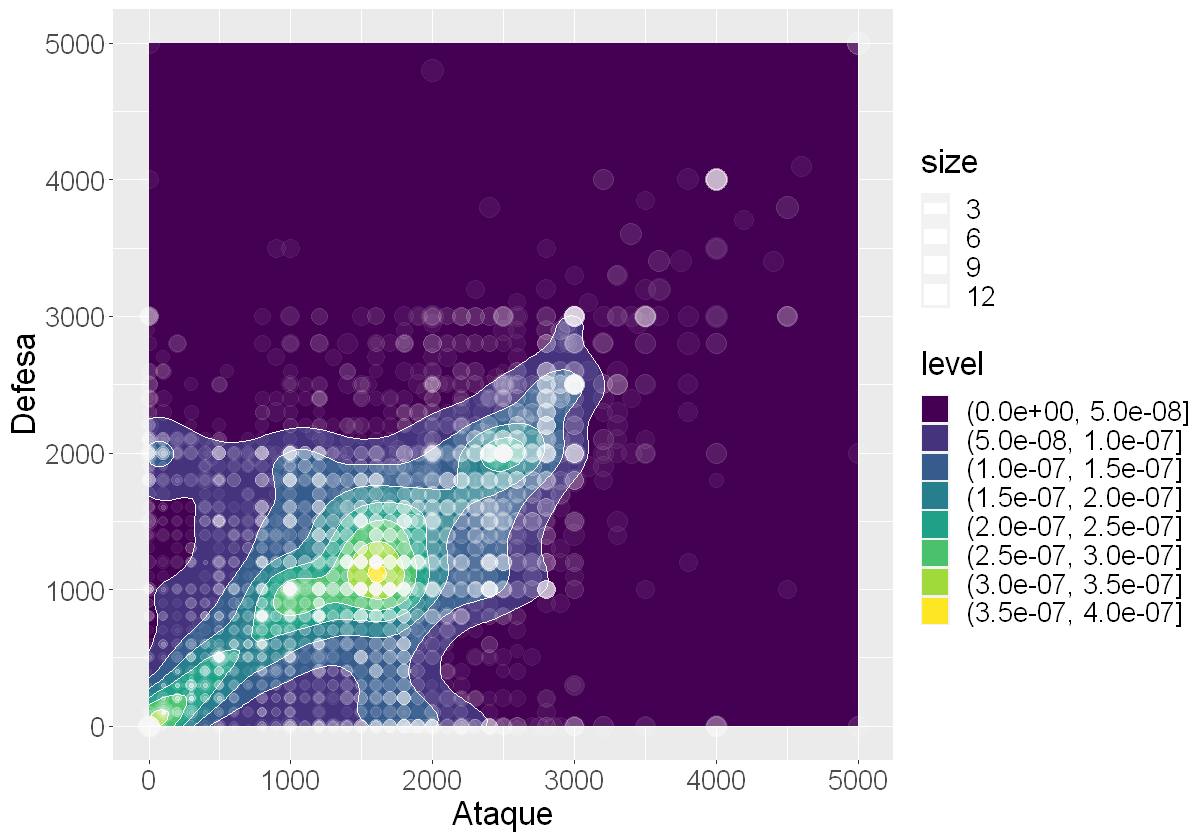

In [123]:
 ggplot(ygo, aes(x=Ataque, y=Defesa, z = estrelas))+ 
     geom_density_2d_filled(na.rm = TRUE)+
     geom_density_2d(color='white', na.rm = TRUE)+
     theme(text = element_text(size = 20))+
     geom_point(color='white', alpha=0.05, aes(size=estrelas), na.rm = TRUE)

# Visualizando Ataque por Atributos

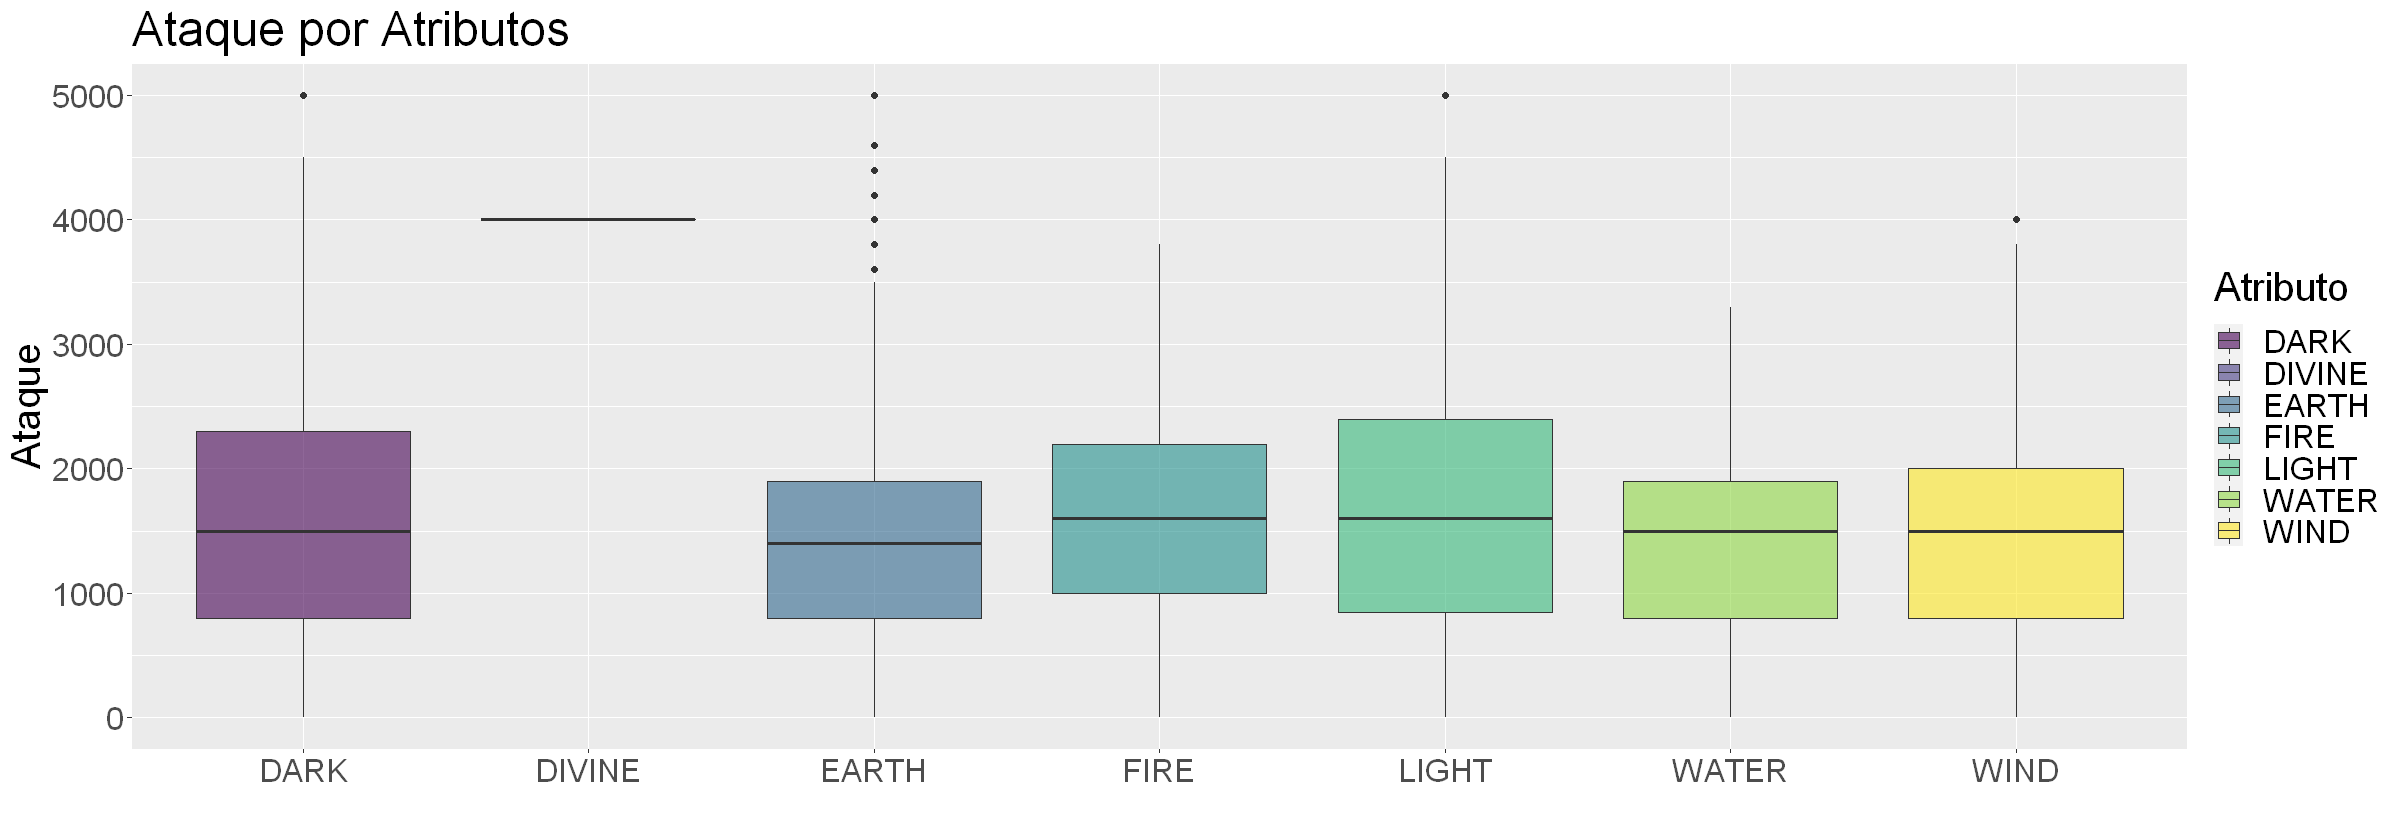

In [124]:
options(repr.plot.width=20, repr.plot.height=7)
ygo %>%
  ggplot( aes(x=Atributo, y=Ataque, fill=Atributo)) +
    geom_boxplot(na.rm = TRUE) +
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="D") +
    theme_gray() +
    theme(text = element_text(size = 24))+
    ggtitle("Ataque por Atributos") +
    xlab("")

# Visualizando Ataque por Atributos com os dados sobrepostos

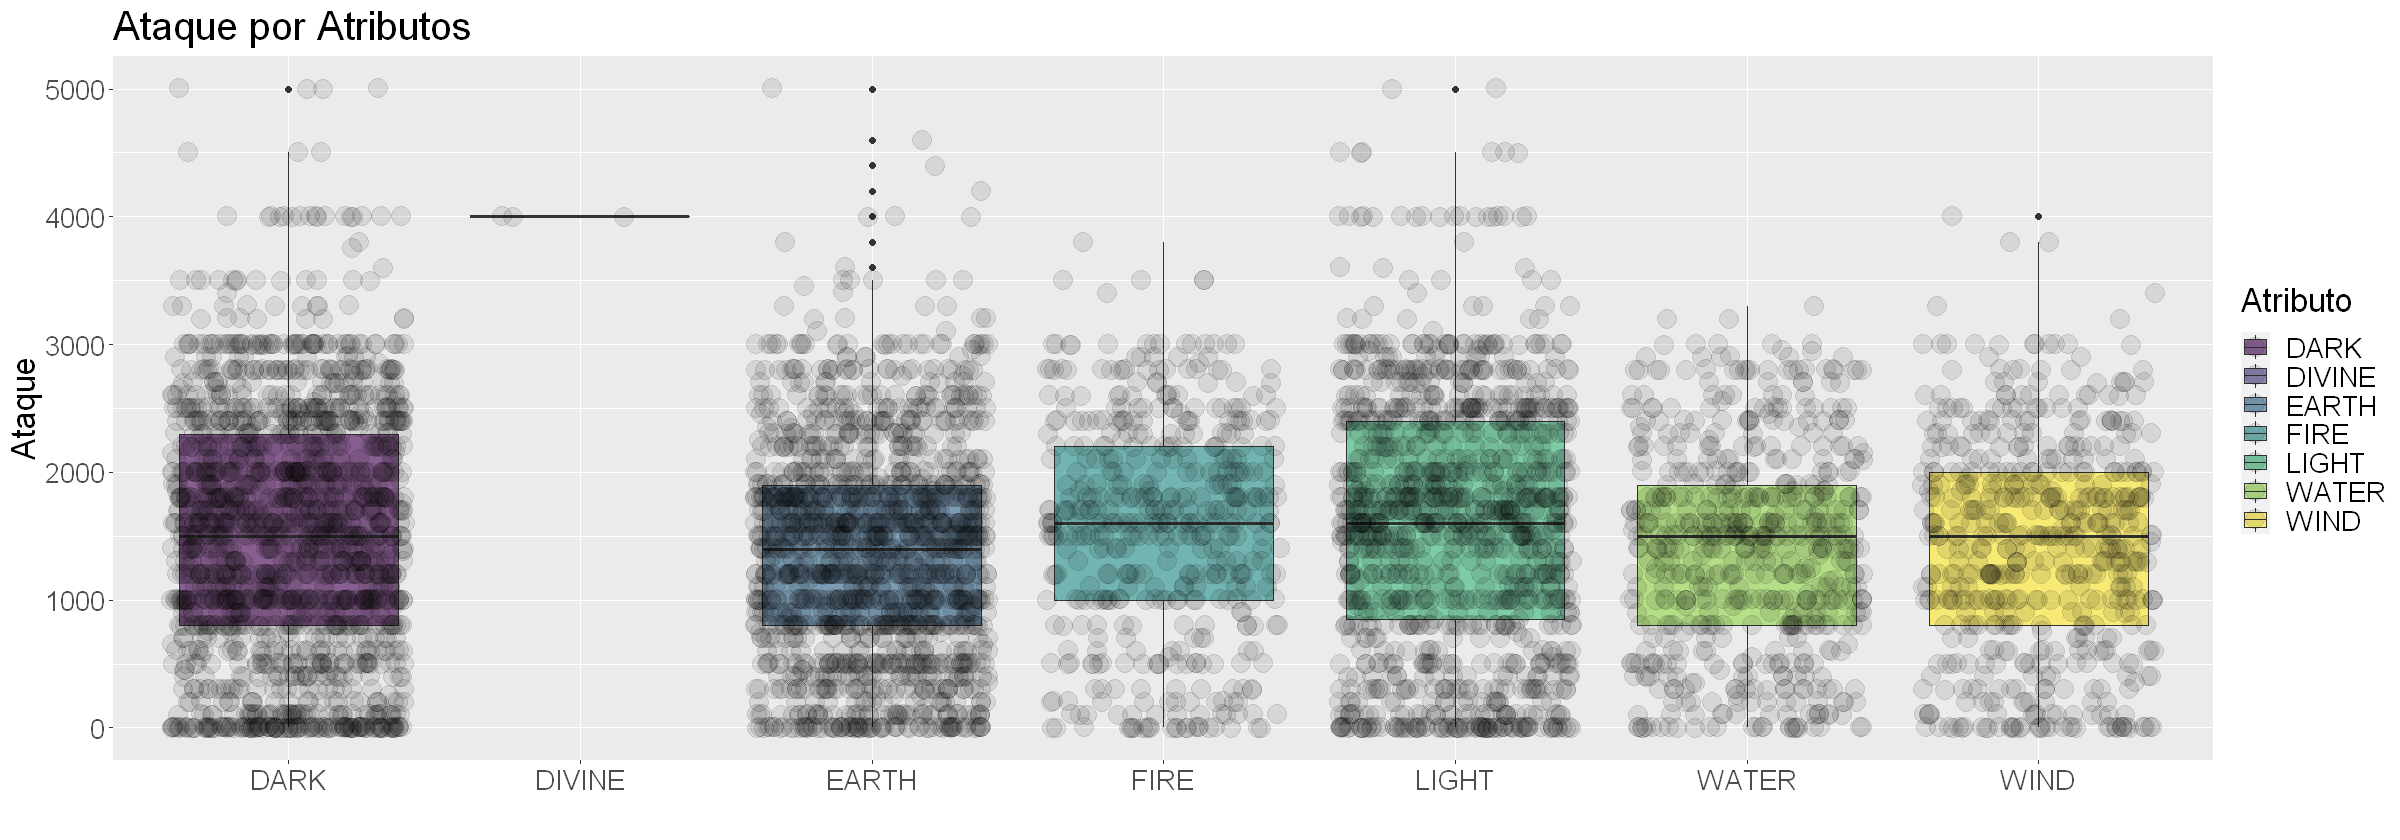

In [125]:
options(repr.plot.width=20, repr.plot.height=7)
ygo %>%
  ggplot( aes(x=Atributo, y=Ataque, fill=Atributo)) +
    geom_boxplot(na.rm = TRUE) +
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="D") +
    geom_jitter(color="black", size=5.4, alpha=0.09, na.rm = TRUE) +
    theme_gray() +
    theme(text = element_text(size = 20))+
    ggtitle("Ataque por Atributos") +
    xlab("")

# Visualizando Defesa por Atributos

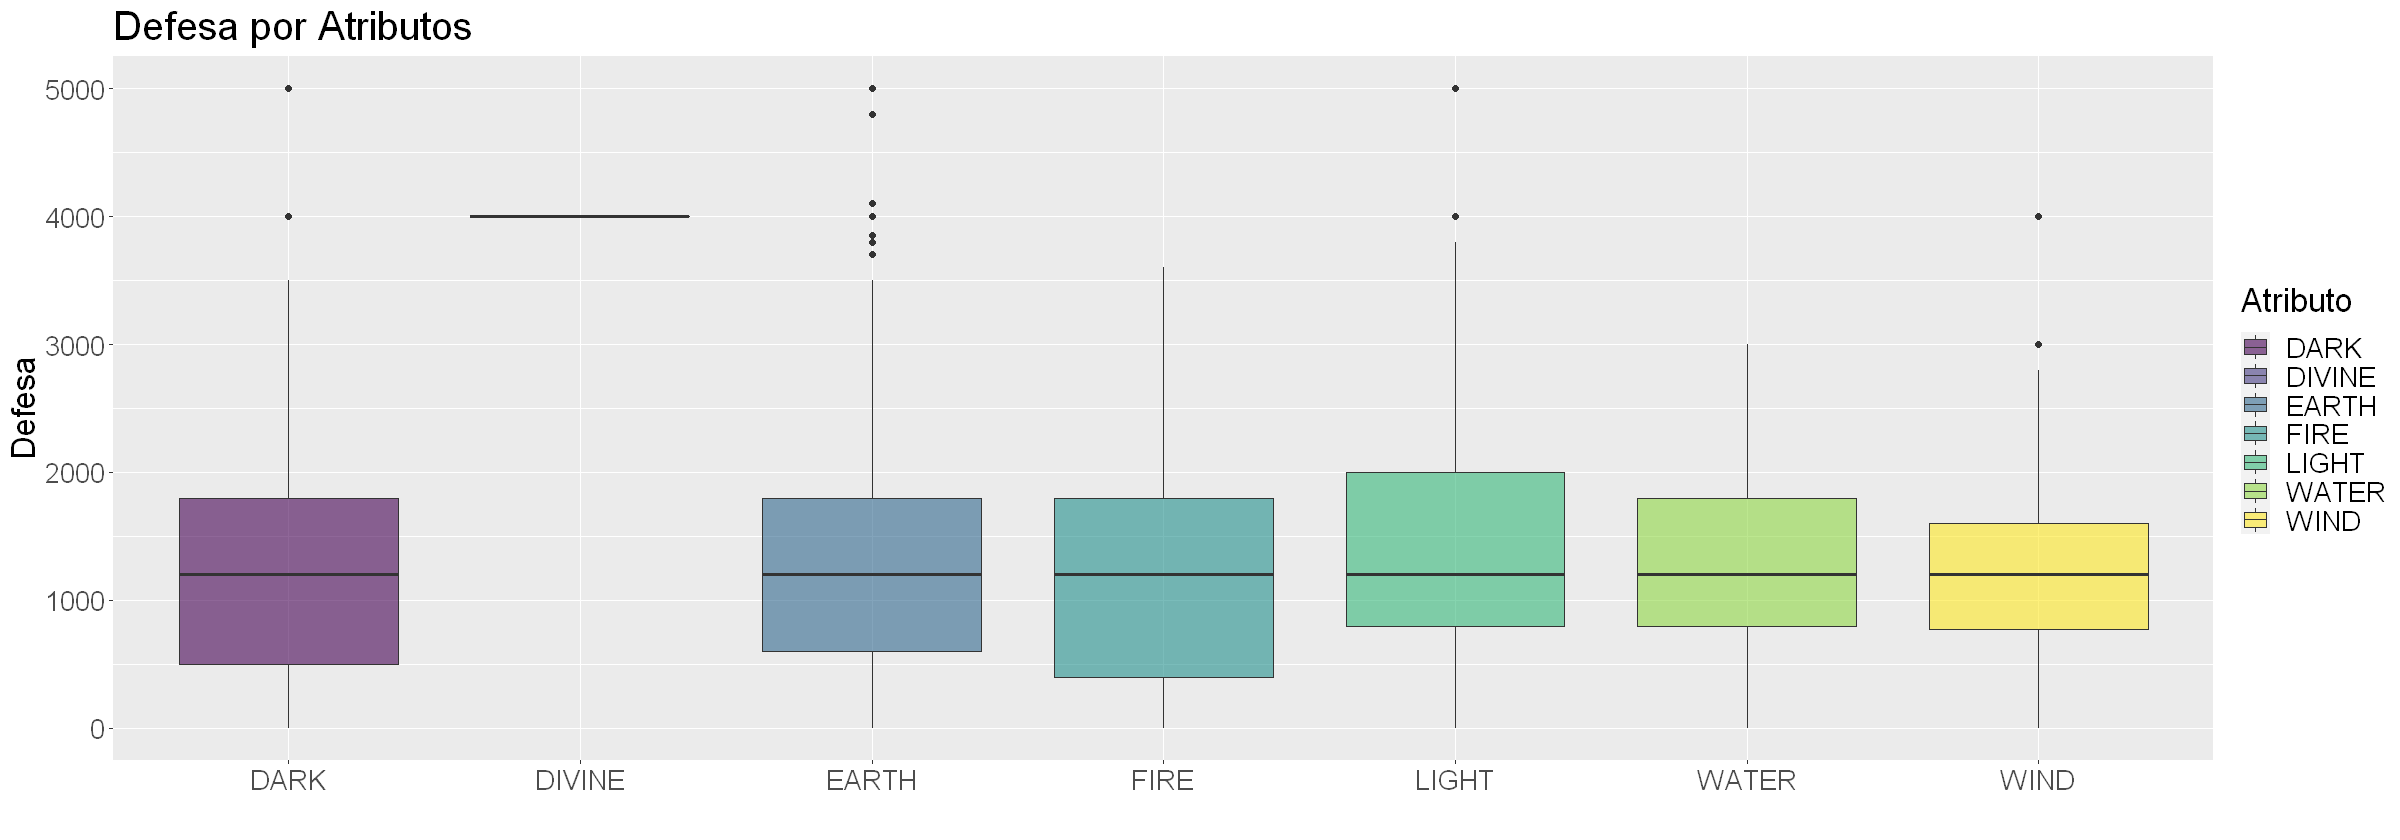

In [126]:
options(repr.plot.width=20, repr.plot.height=7)
ygo %>%
  ggplot( aes(x=Atributo, y=Defesa, fill=Atributo)) +
    geom_boxplot(na.rm = TRUE) +
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="D") +
    theme_gray() +
    theme(text = element_text(size = 20))+
    ggtitle("Defesa por Atributos") +
    xlab("")

# Visualizando Defesa por Atributos com os dados sobrepostos

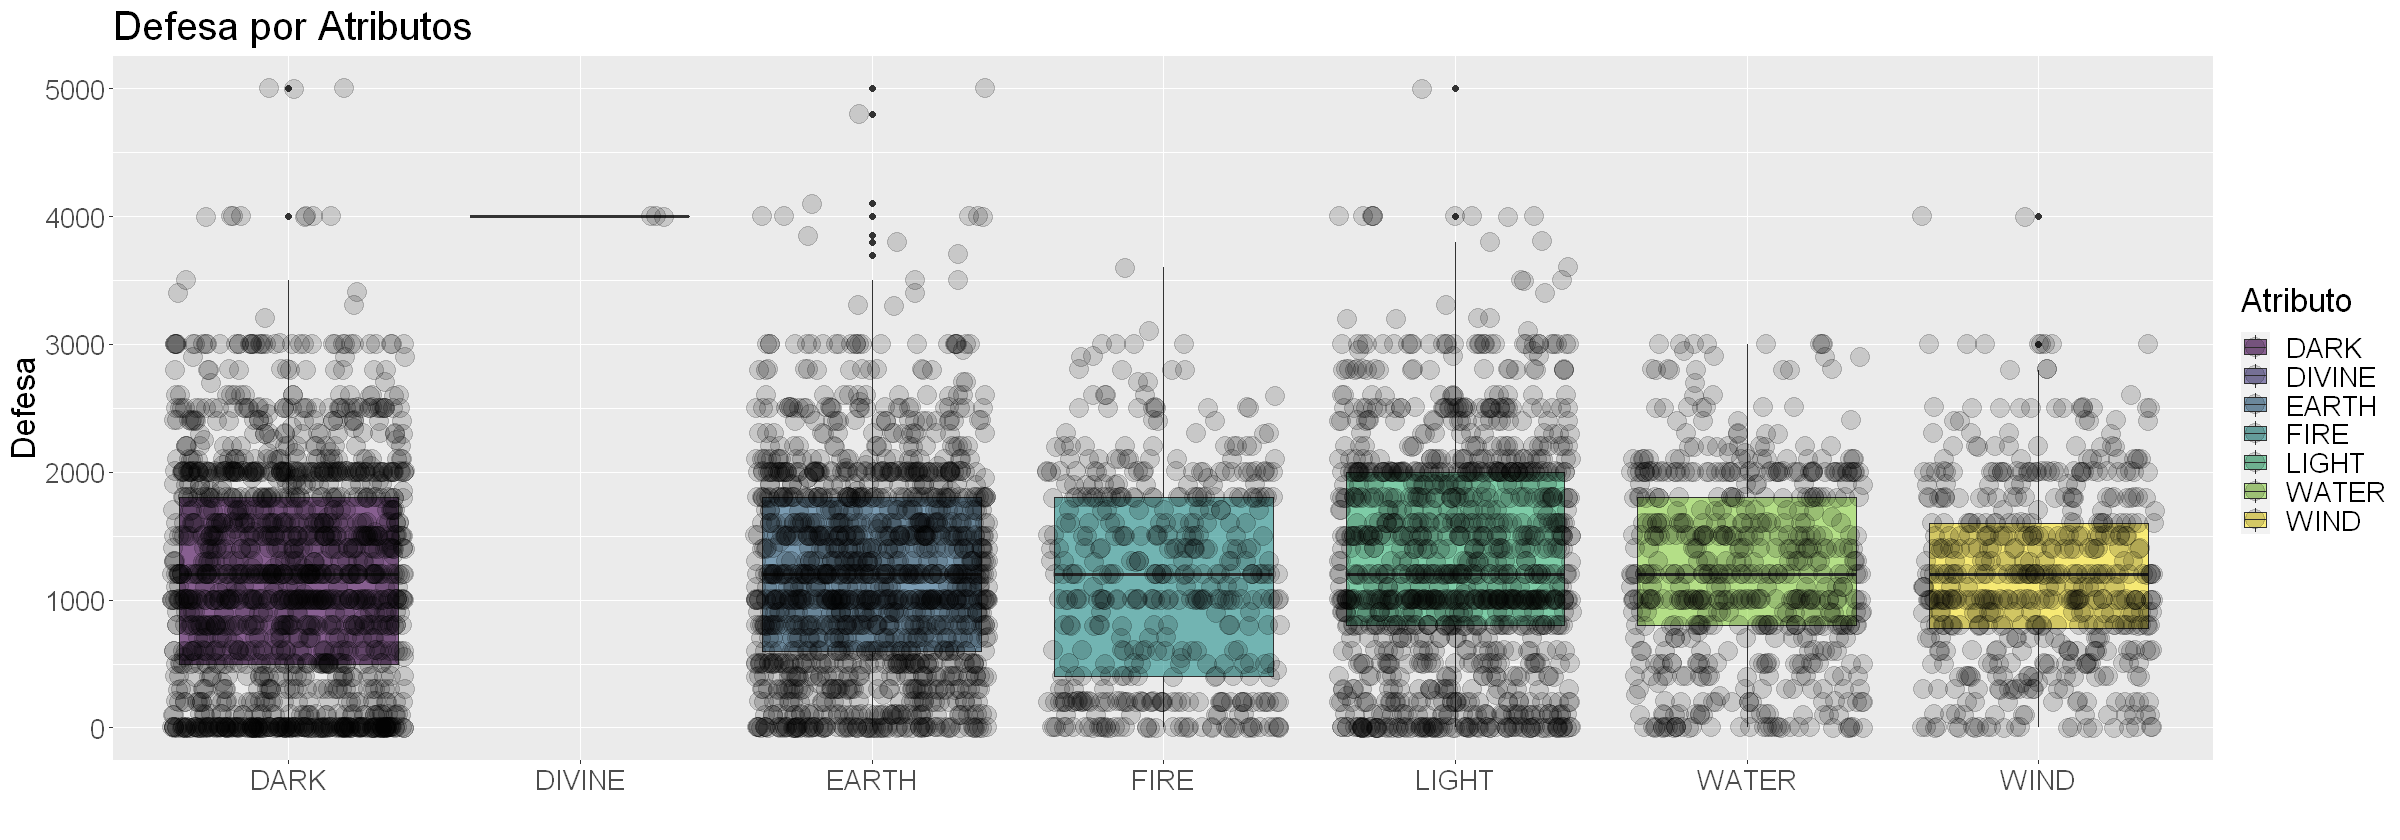

In [127]:
options(repr.plot.width=20, repr.plot.height=7)
ygo %>%
  ggplot( aes(x=Atributo, y=Defesa, fill=Atributo)) +
    geom_boxplot(na.rm = TRUE) +
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="D") +
    theme_gray() +
    theme(text = element_text(size = 20))+
    geom_jitter(color="black", size=5.4, alpha=0.15, na.rm = TRUE)+
    ggtitle("Defesa por Atributos") +
    xlab("")

# Visualizando Ataque por Atributos separado por Tipos com 

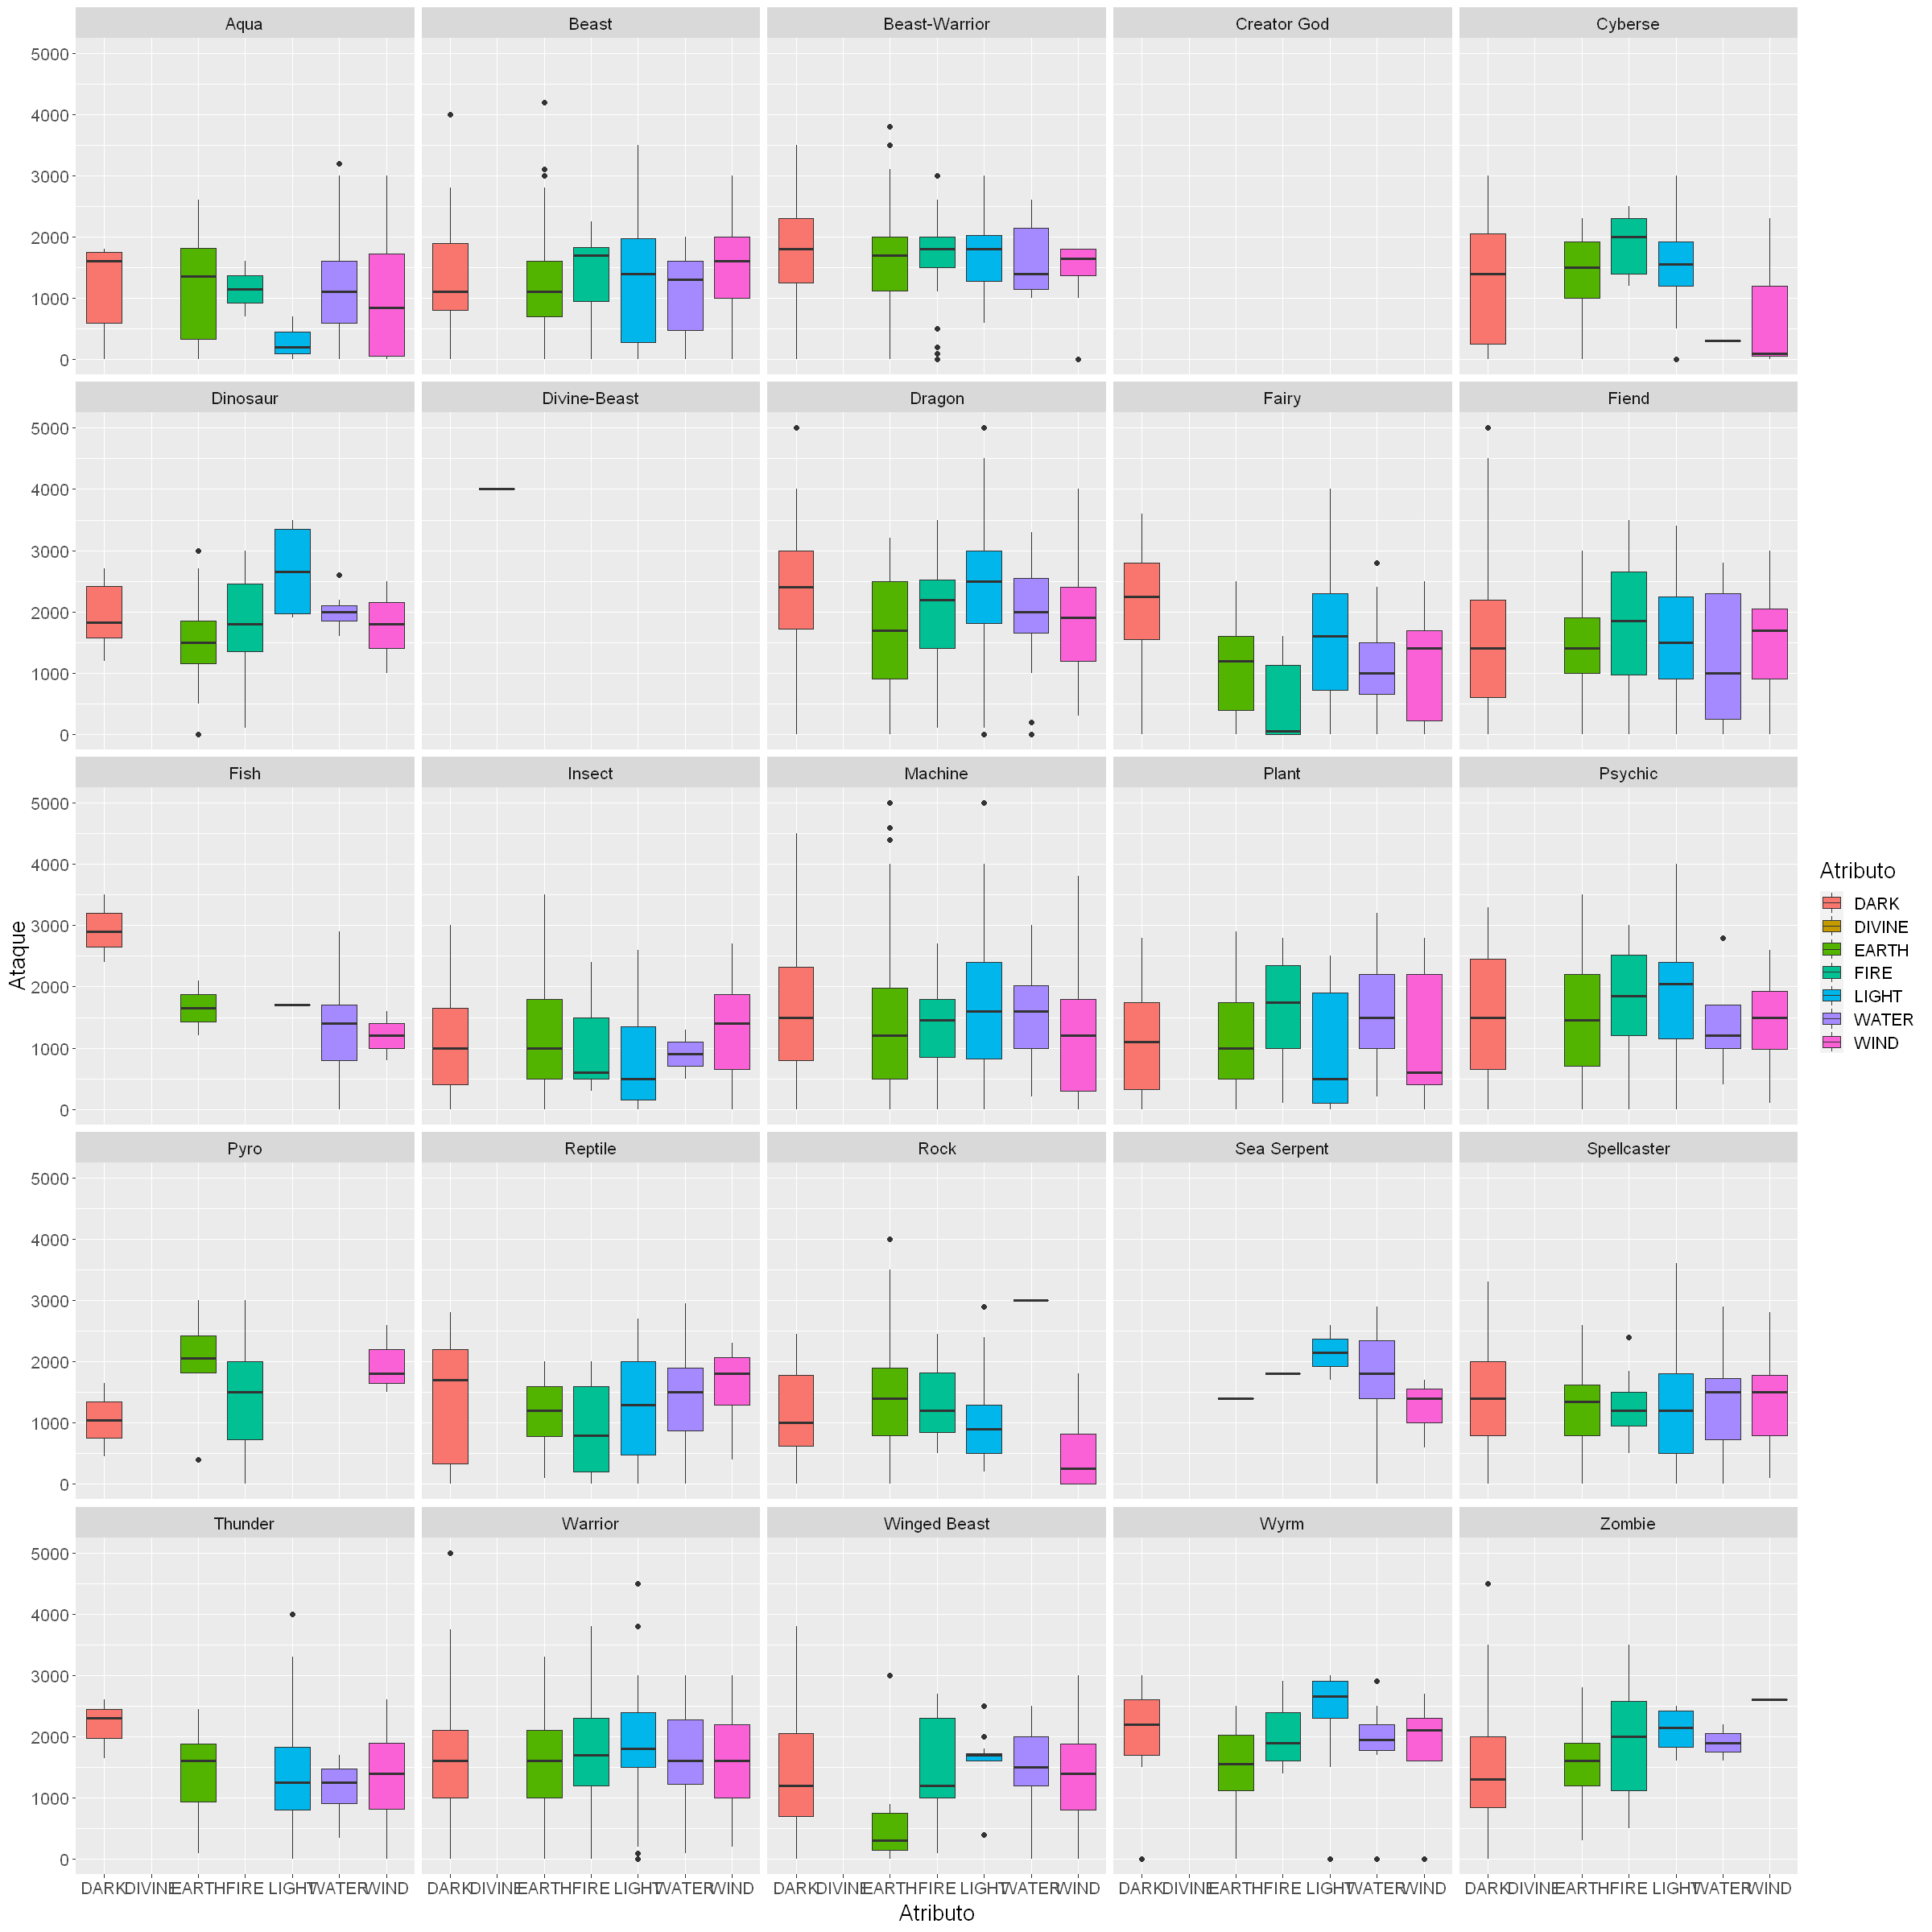

In [129]:
options(repr.plot.width=20, repr.plot.height=20)
ggplot(ygo, aes(x=Atributo, y=Ataque, fill=Atributo)) + 
    geom_boxplot(na.rm = TRUE) +
    theme_gray()+
    theme(text = element_text(size = 16))+
    facet_wrap(~Tipo)

# Visualizando Ataque por Atributos separado por Tipos Gráfico de Violinos

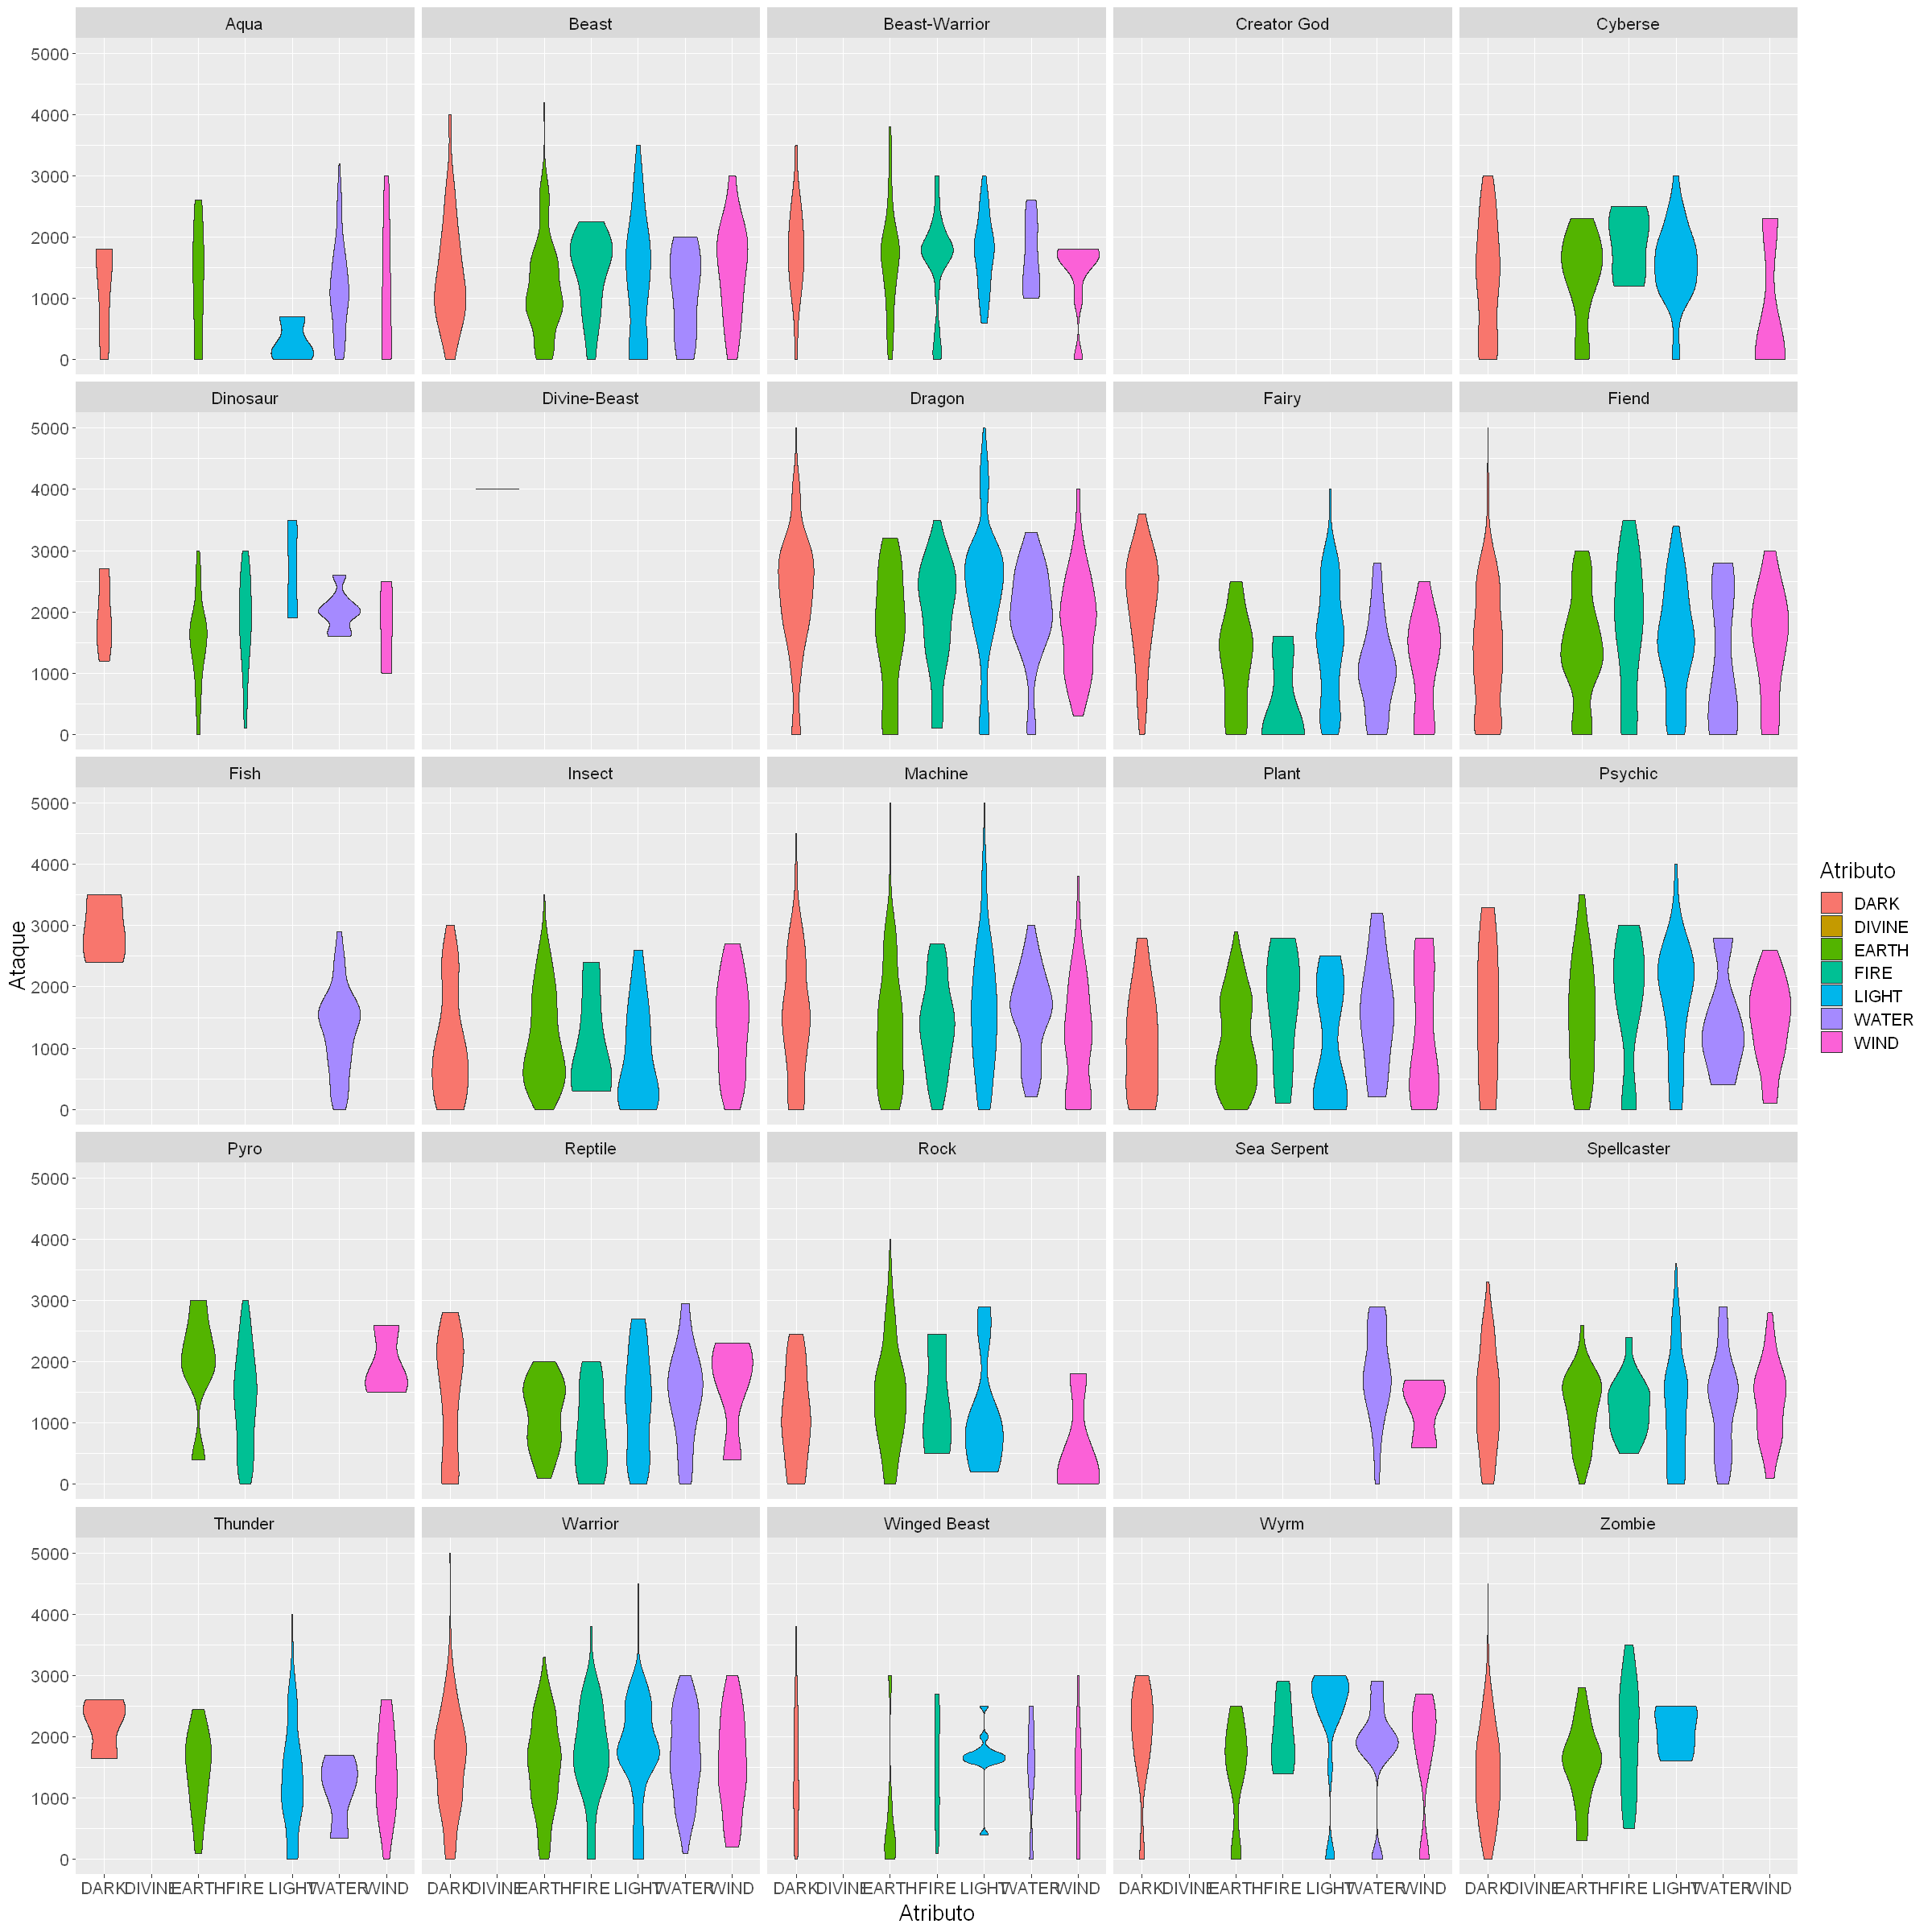

In [130]:
options(repr.plot.width=20, repr.plot.height=20)
ggplot(ygo, aes(x=Atributo, y=Ataque, fill=Atributo)) + 
    geom_violin(na.rm = TRUE) +
    theme_gray()+
    theme(text = element_text(size = 16))+
    facet_wrap(~Tipo)

# Visualizando Ataque por Atributos separado por Tipos Gráfico de Violinos e sobreposição de dados

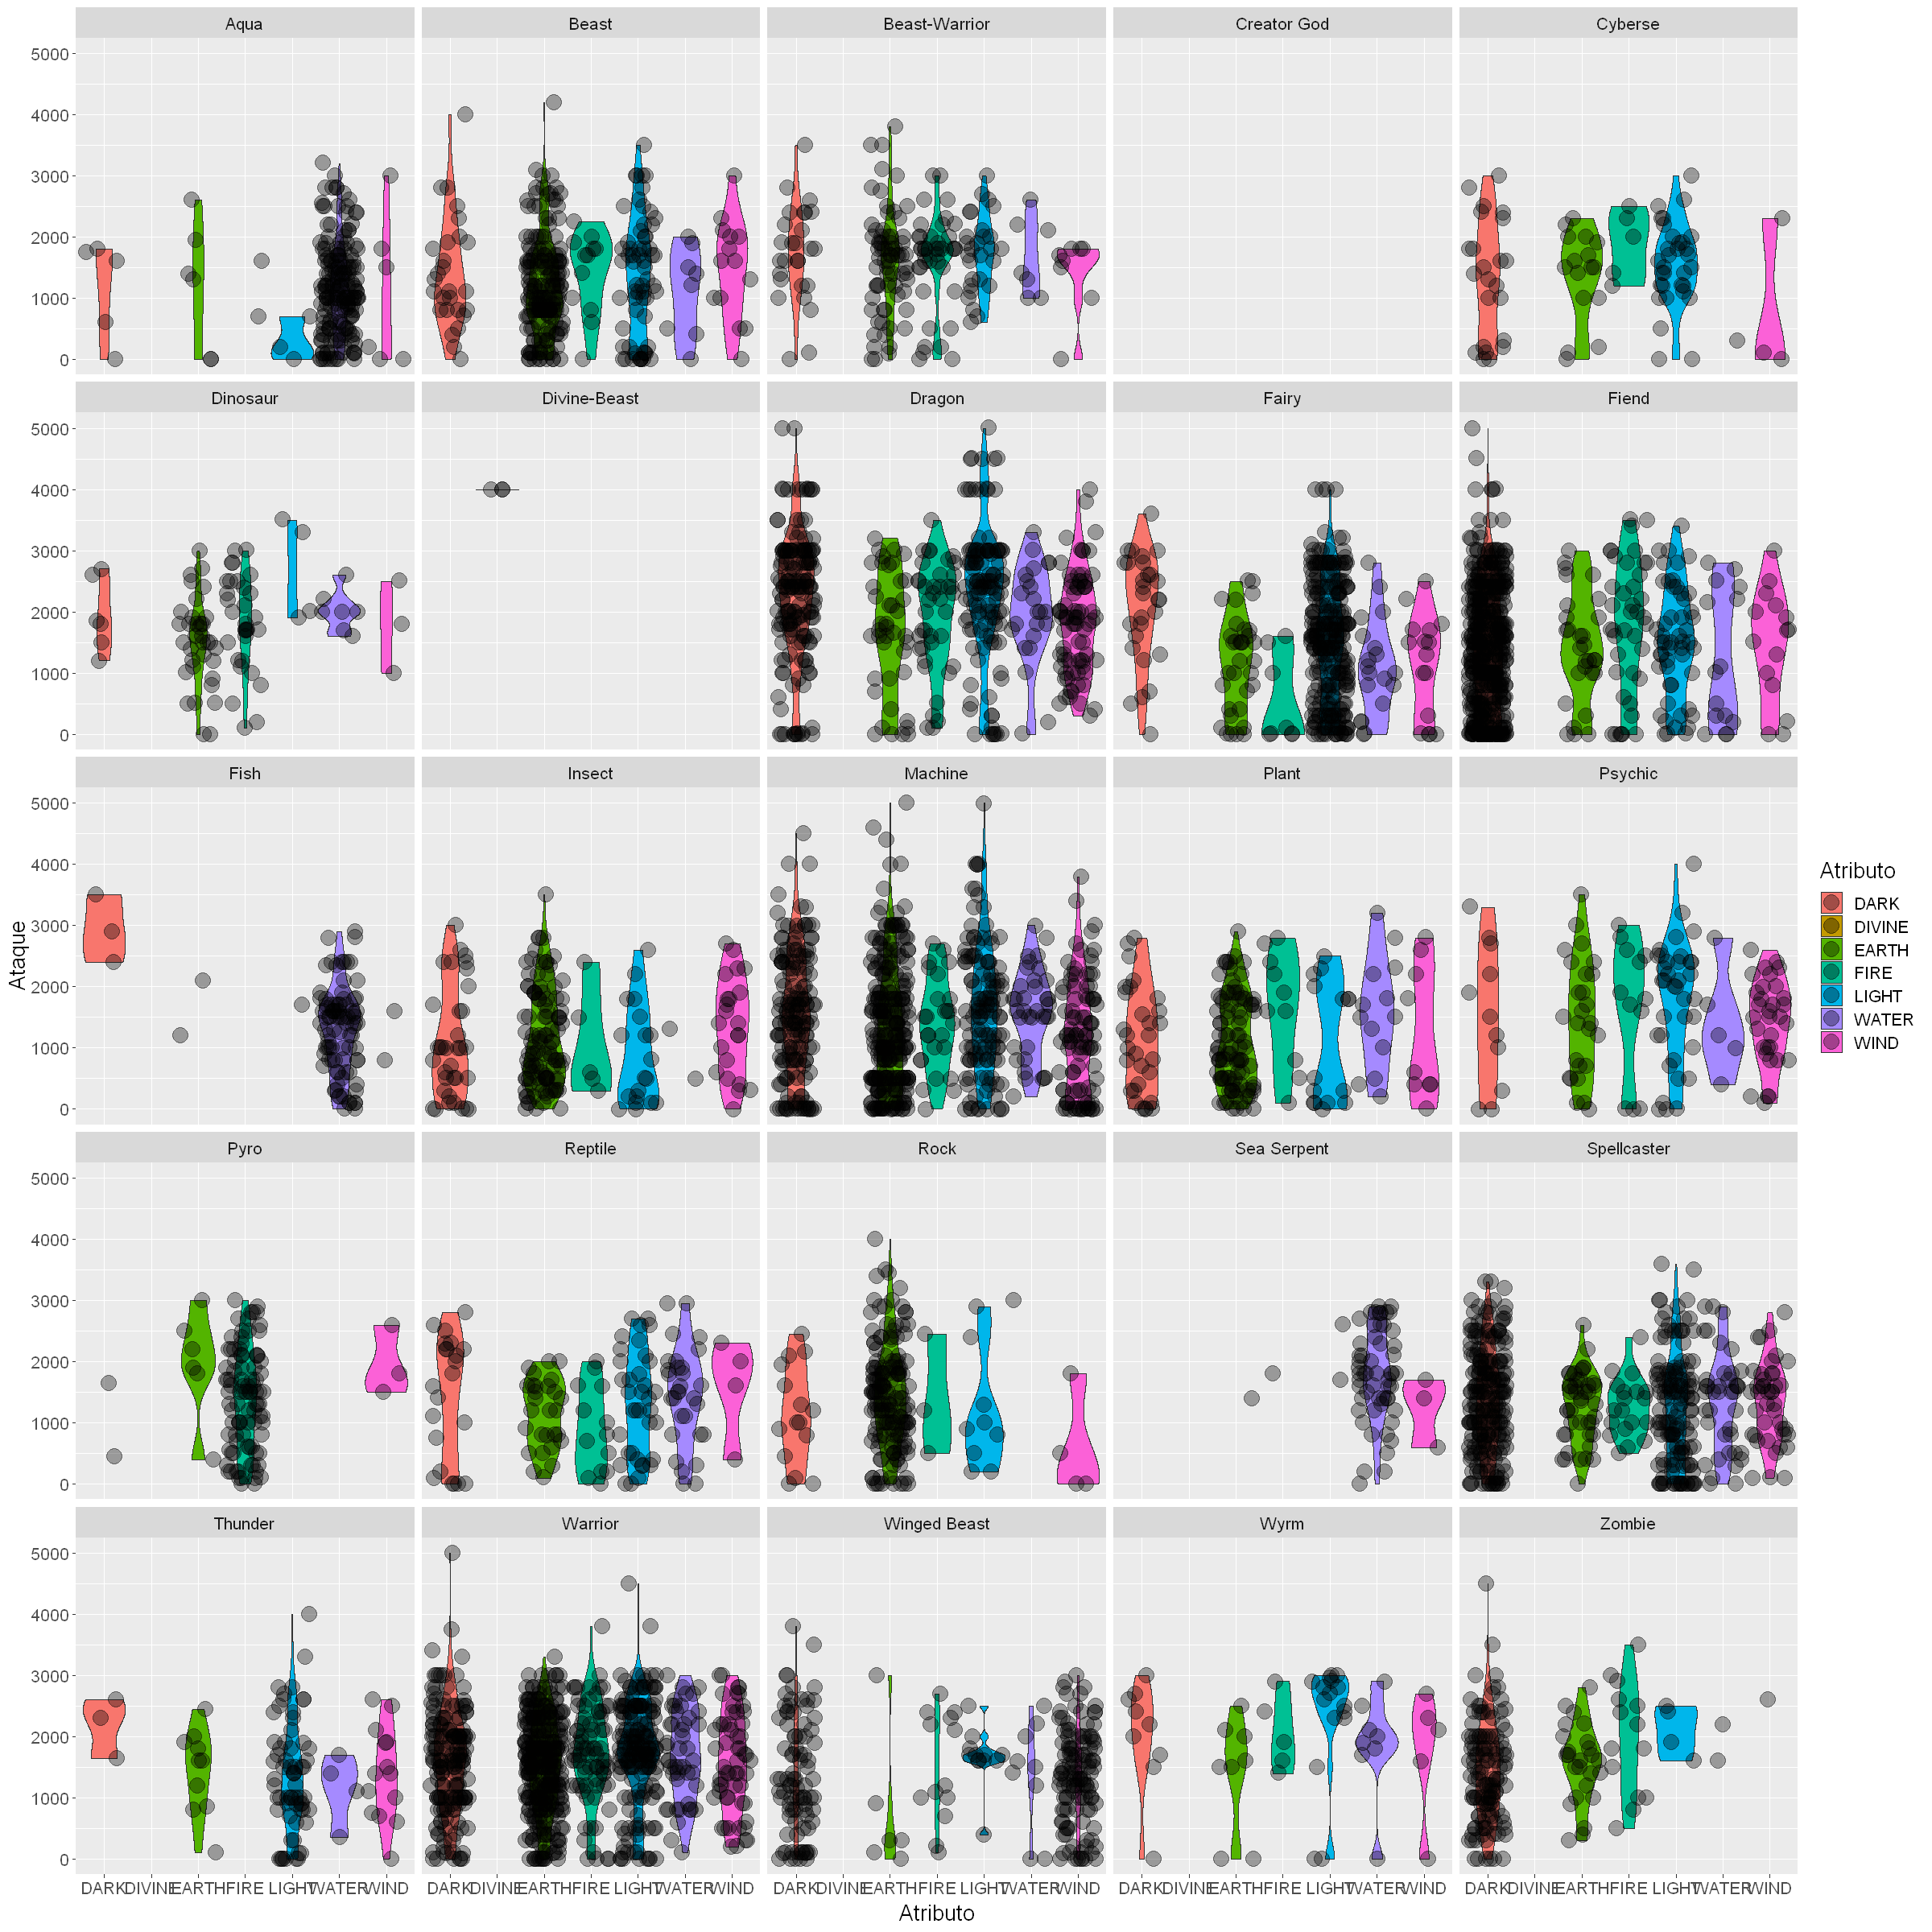

In [131]:
options(repr.plot.width=20, repr.plot.height=20)
ggplot(ygo, aes(x=Atributo, y=Ataque, fill=Atributo)) + 
    geom_violin(na.rm = TRUE) +
    geom_jitter(color="black", size=5.4, alpha=0.35, na.rm = TRUE)+
    theme_gray()+
    theme(text = element_text(size = 16))+
    facet_wrap(~Tipo)

# Visualizando Defesa por Atributos separado por Tipos com Boxplot

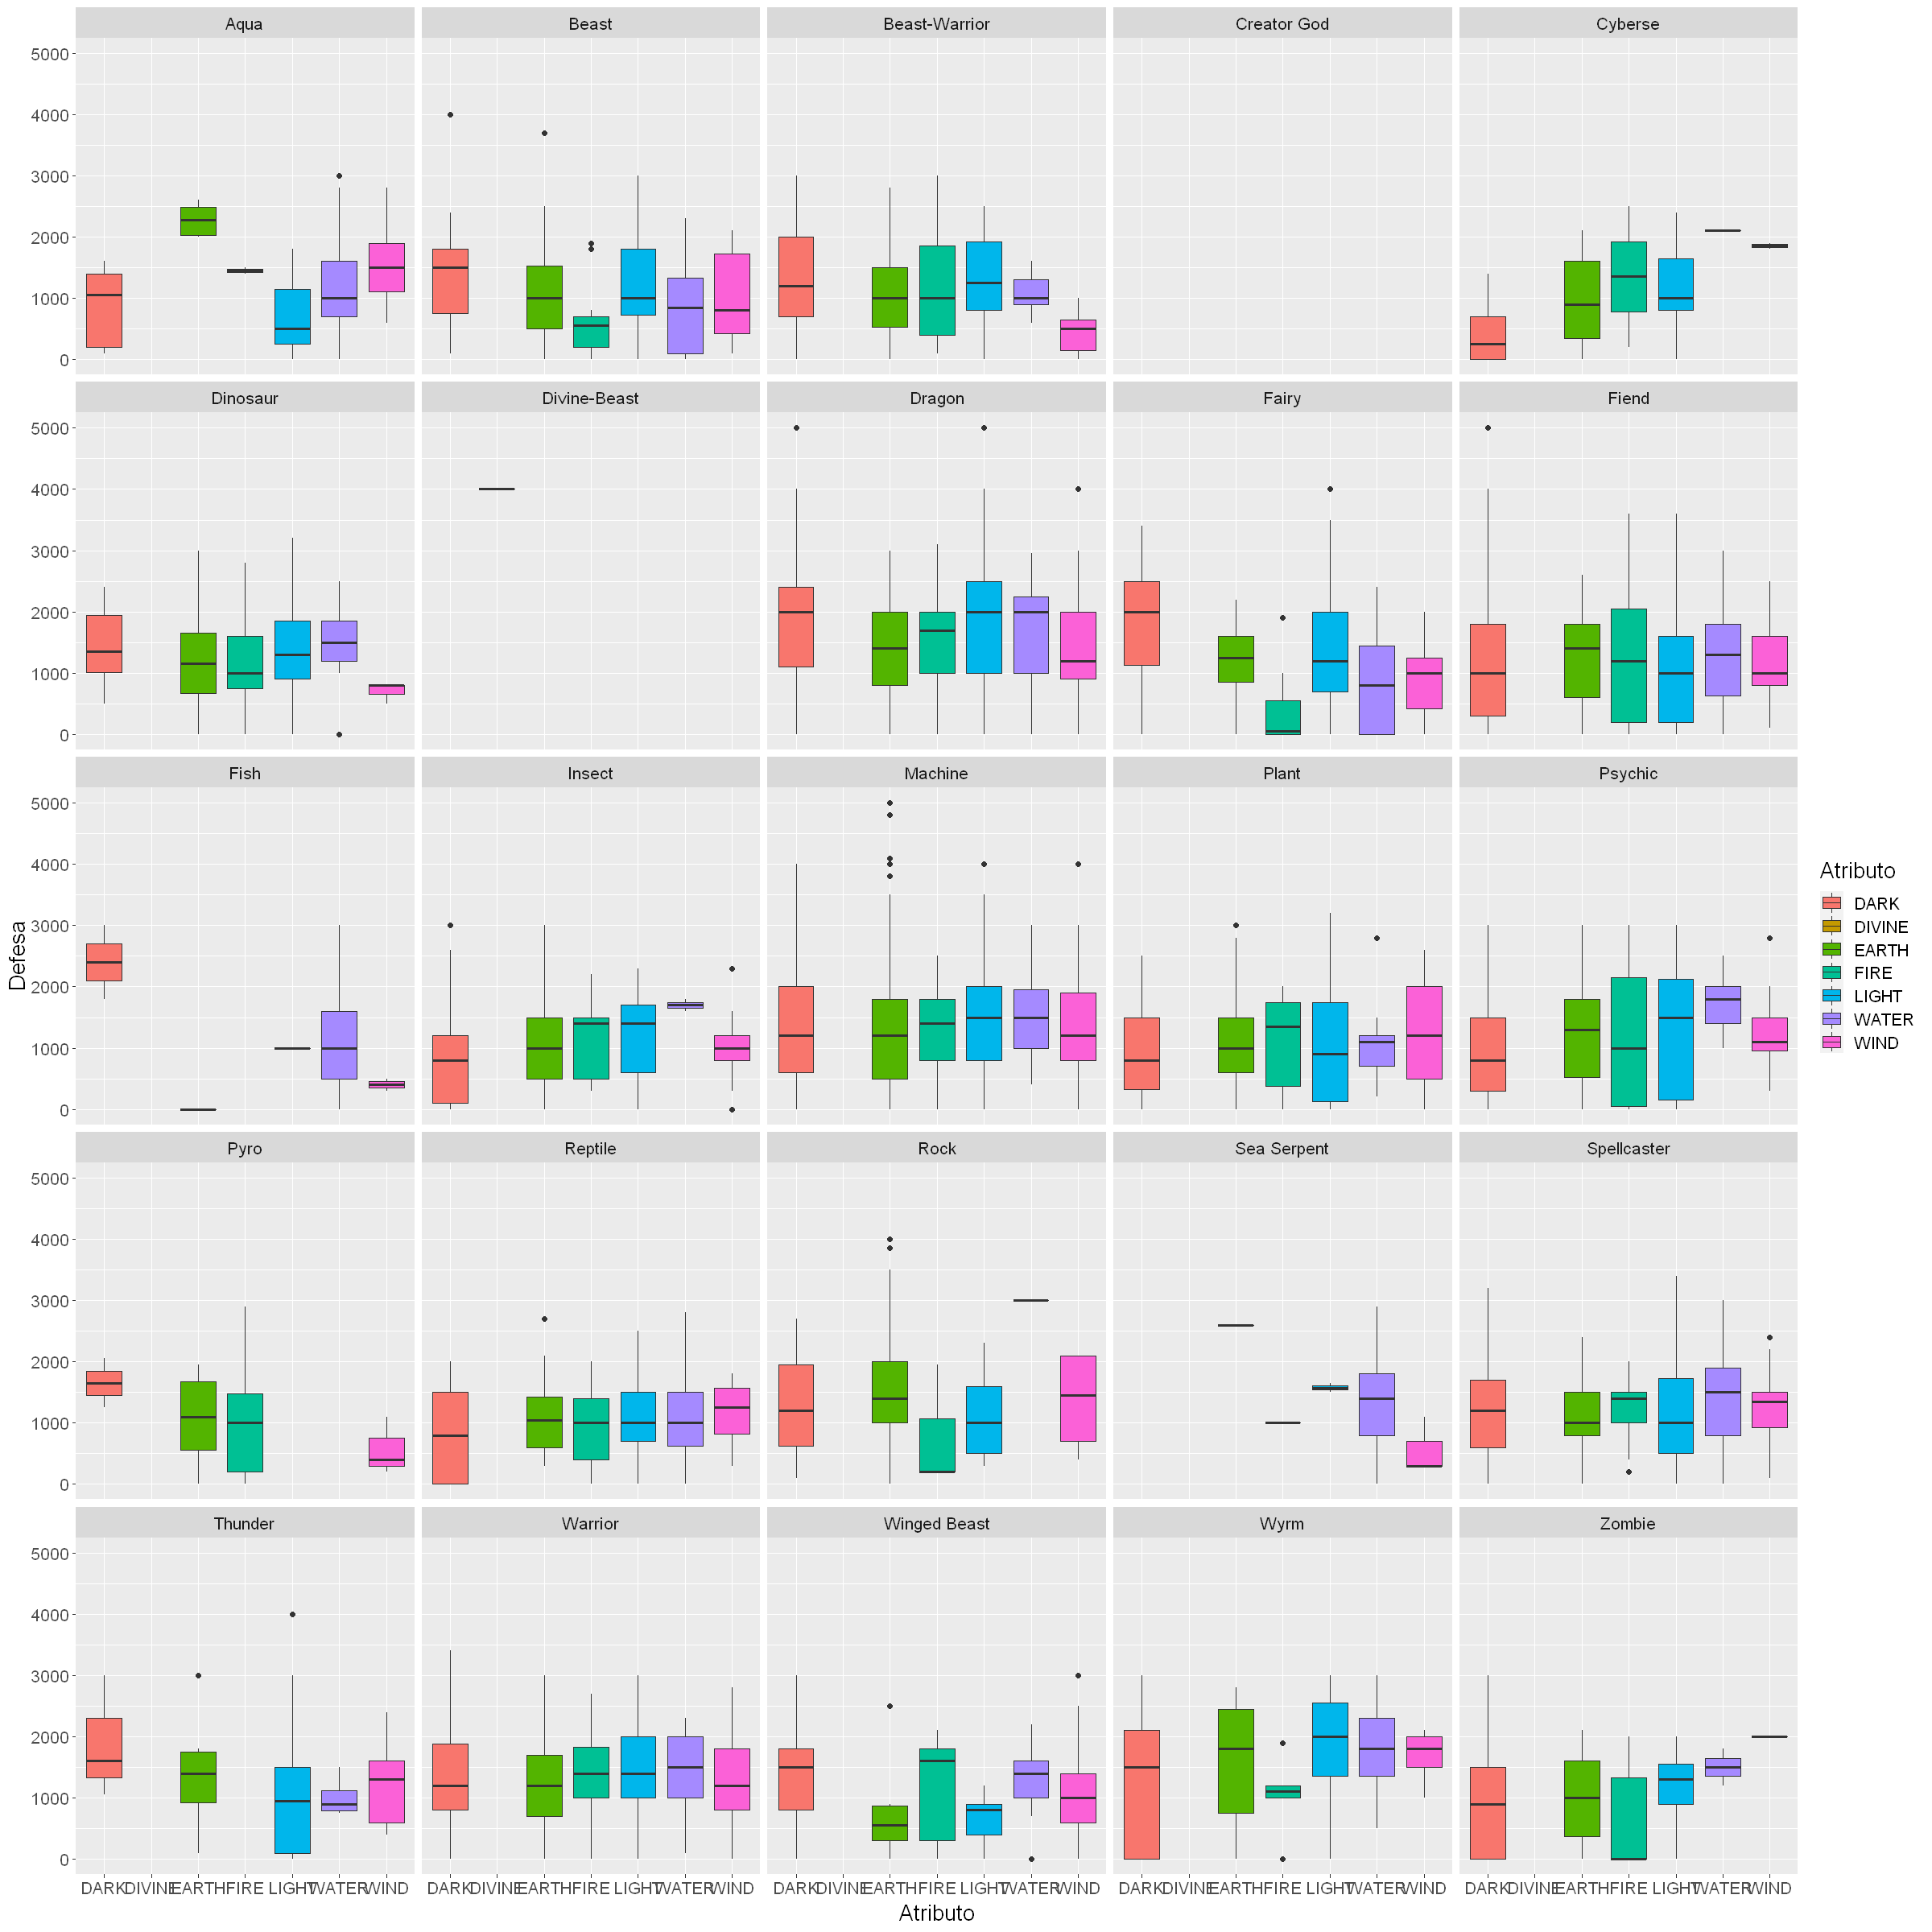

In [132]:
options(repr.plot.width=20, repr.plot.height=20)
ggplot(ygo, aes(x=Atributo, y=Defesa, fill=Atributo)) + 
    geom_boxplot(na.rm = TRUE) +
    theme_gray()+
    theme(text = element_text(size = 16))+
    facet_wrap(~Tipo)

# Visualizando Defesa por Atributos separado por Tipos com Violin Plot 

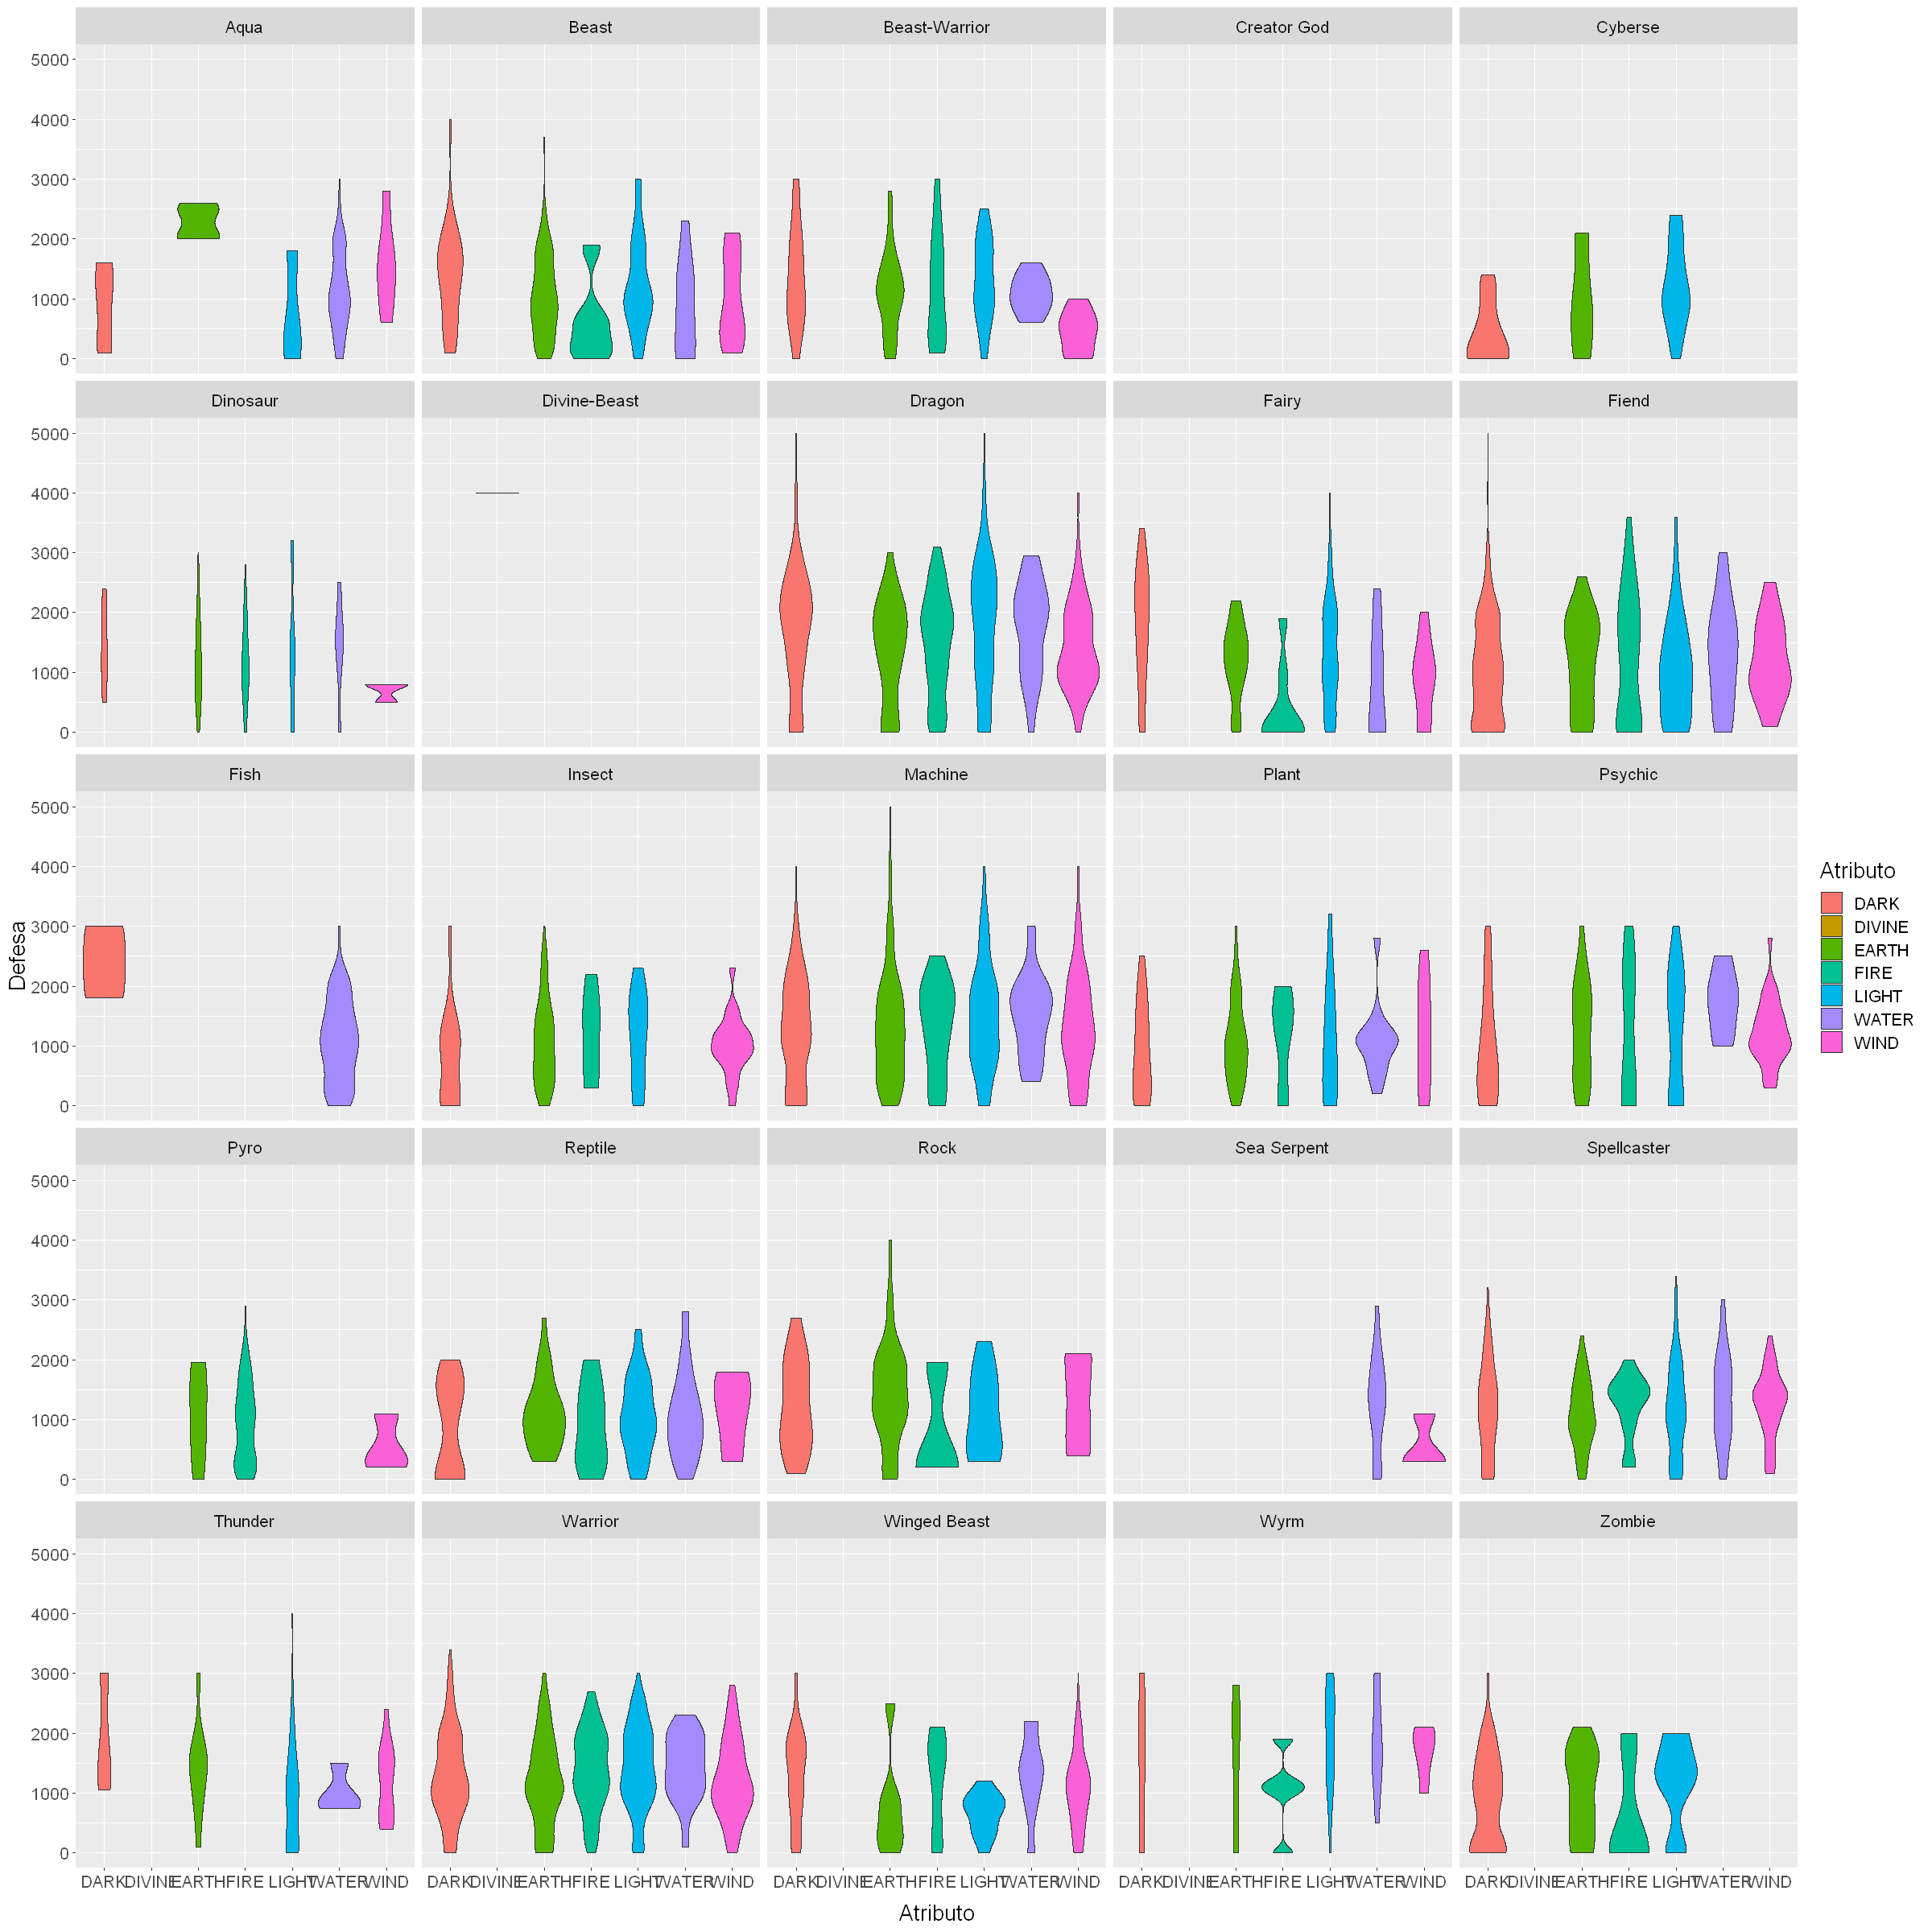

In [134]:
options(repr.plot.width=20, repr.plot.height=20)
ggplot(ygo, aes(x=Atributo, y=Defesa, fill=Atributo)) + 
    geom_violin(na.rm = TRUE) +
    theme_gray()+
    theme(text = element_text(size = 16))+
    facet_wrap(~Tipo)

# Visualizando Defesa por Atributos separado por Tipos com Violin Plot e sobreposição de dados

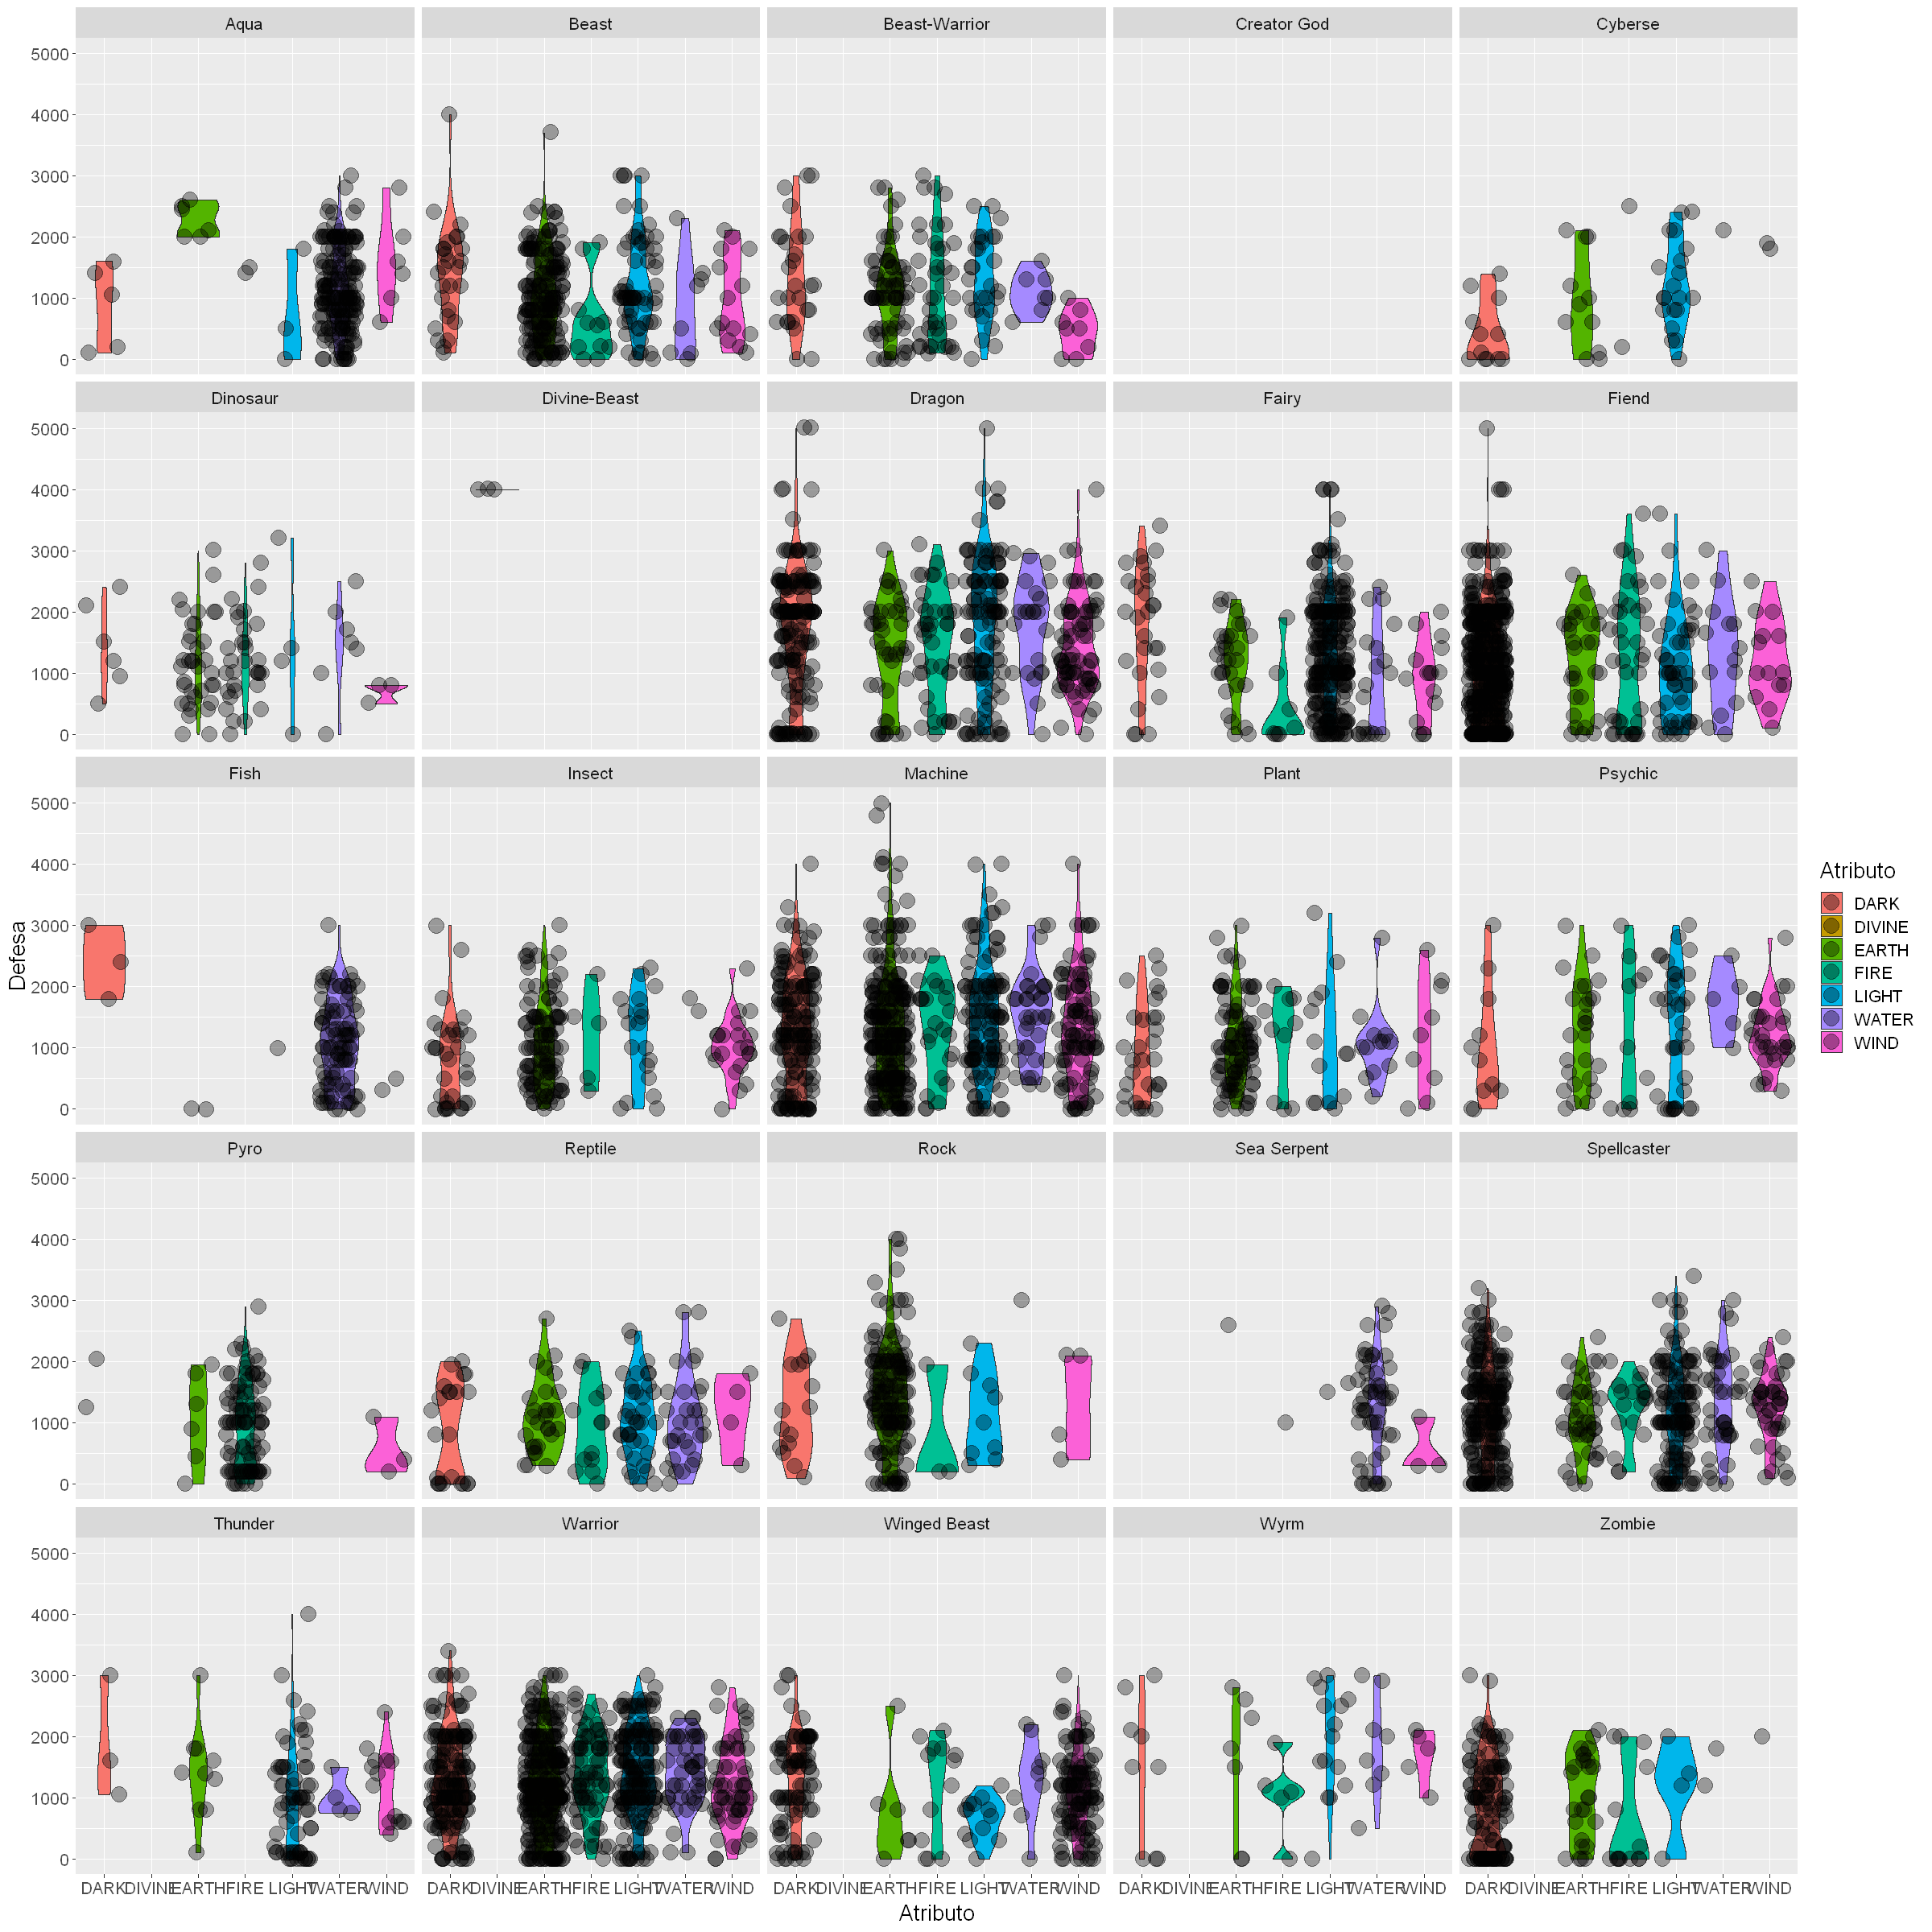

In [135]:
options(repr.plot.width=20, repr.plot.height=20)
ggplot(ygo, aes(x=Atributo, y=Defesa, fill=Atributo)) + 
    geom_violin(na.rm = TRUE) +
    geom_jitter(color="black", size=5.4, alpha=0.35, na.rm = TRUE)+
    theme_gray()+
    theme(text = element_text(size = 16))+
    facet_wrap(~Tipo)

# Visualizando Defesa por Tipos separado por Atributos com Violin Plot e sobreposição de dados

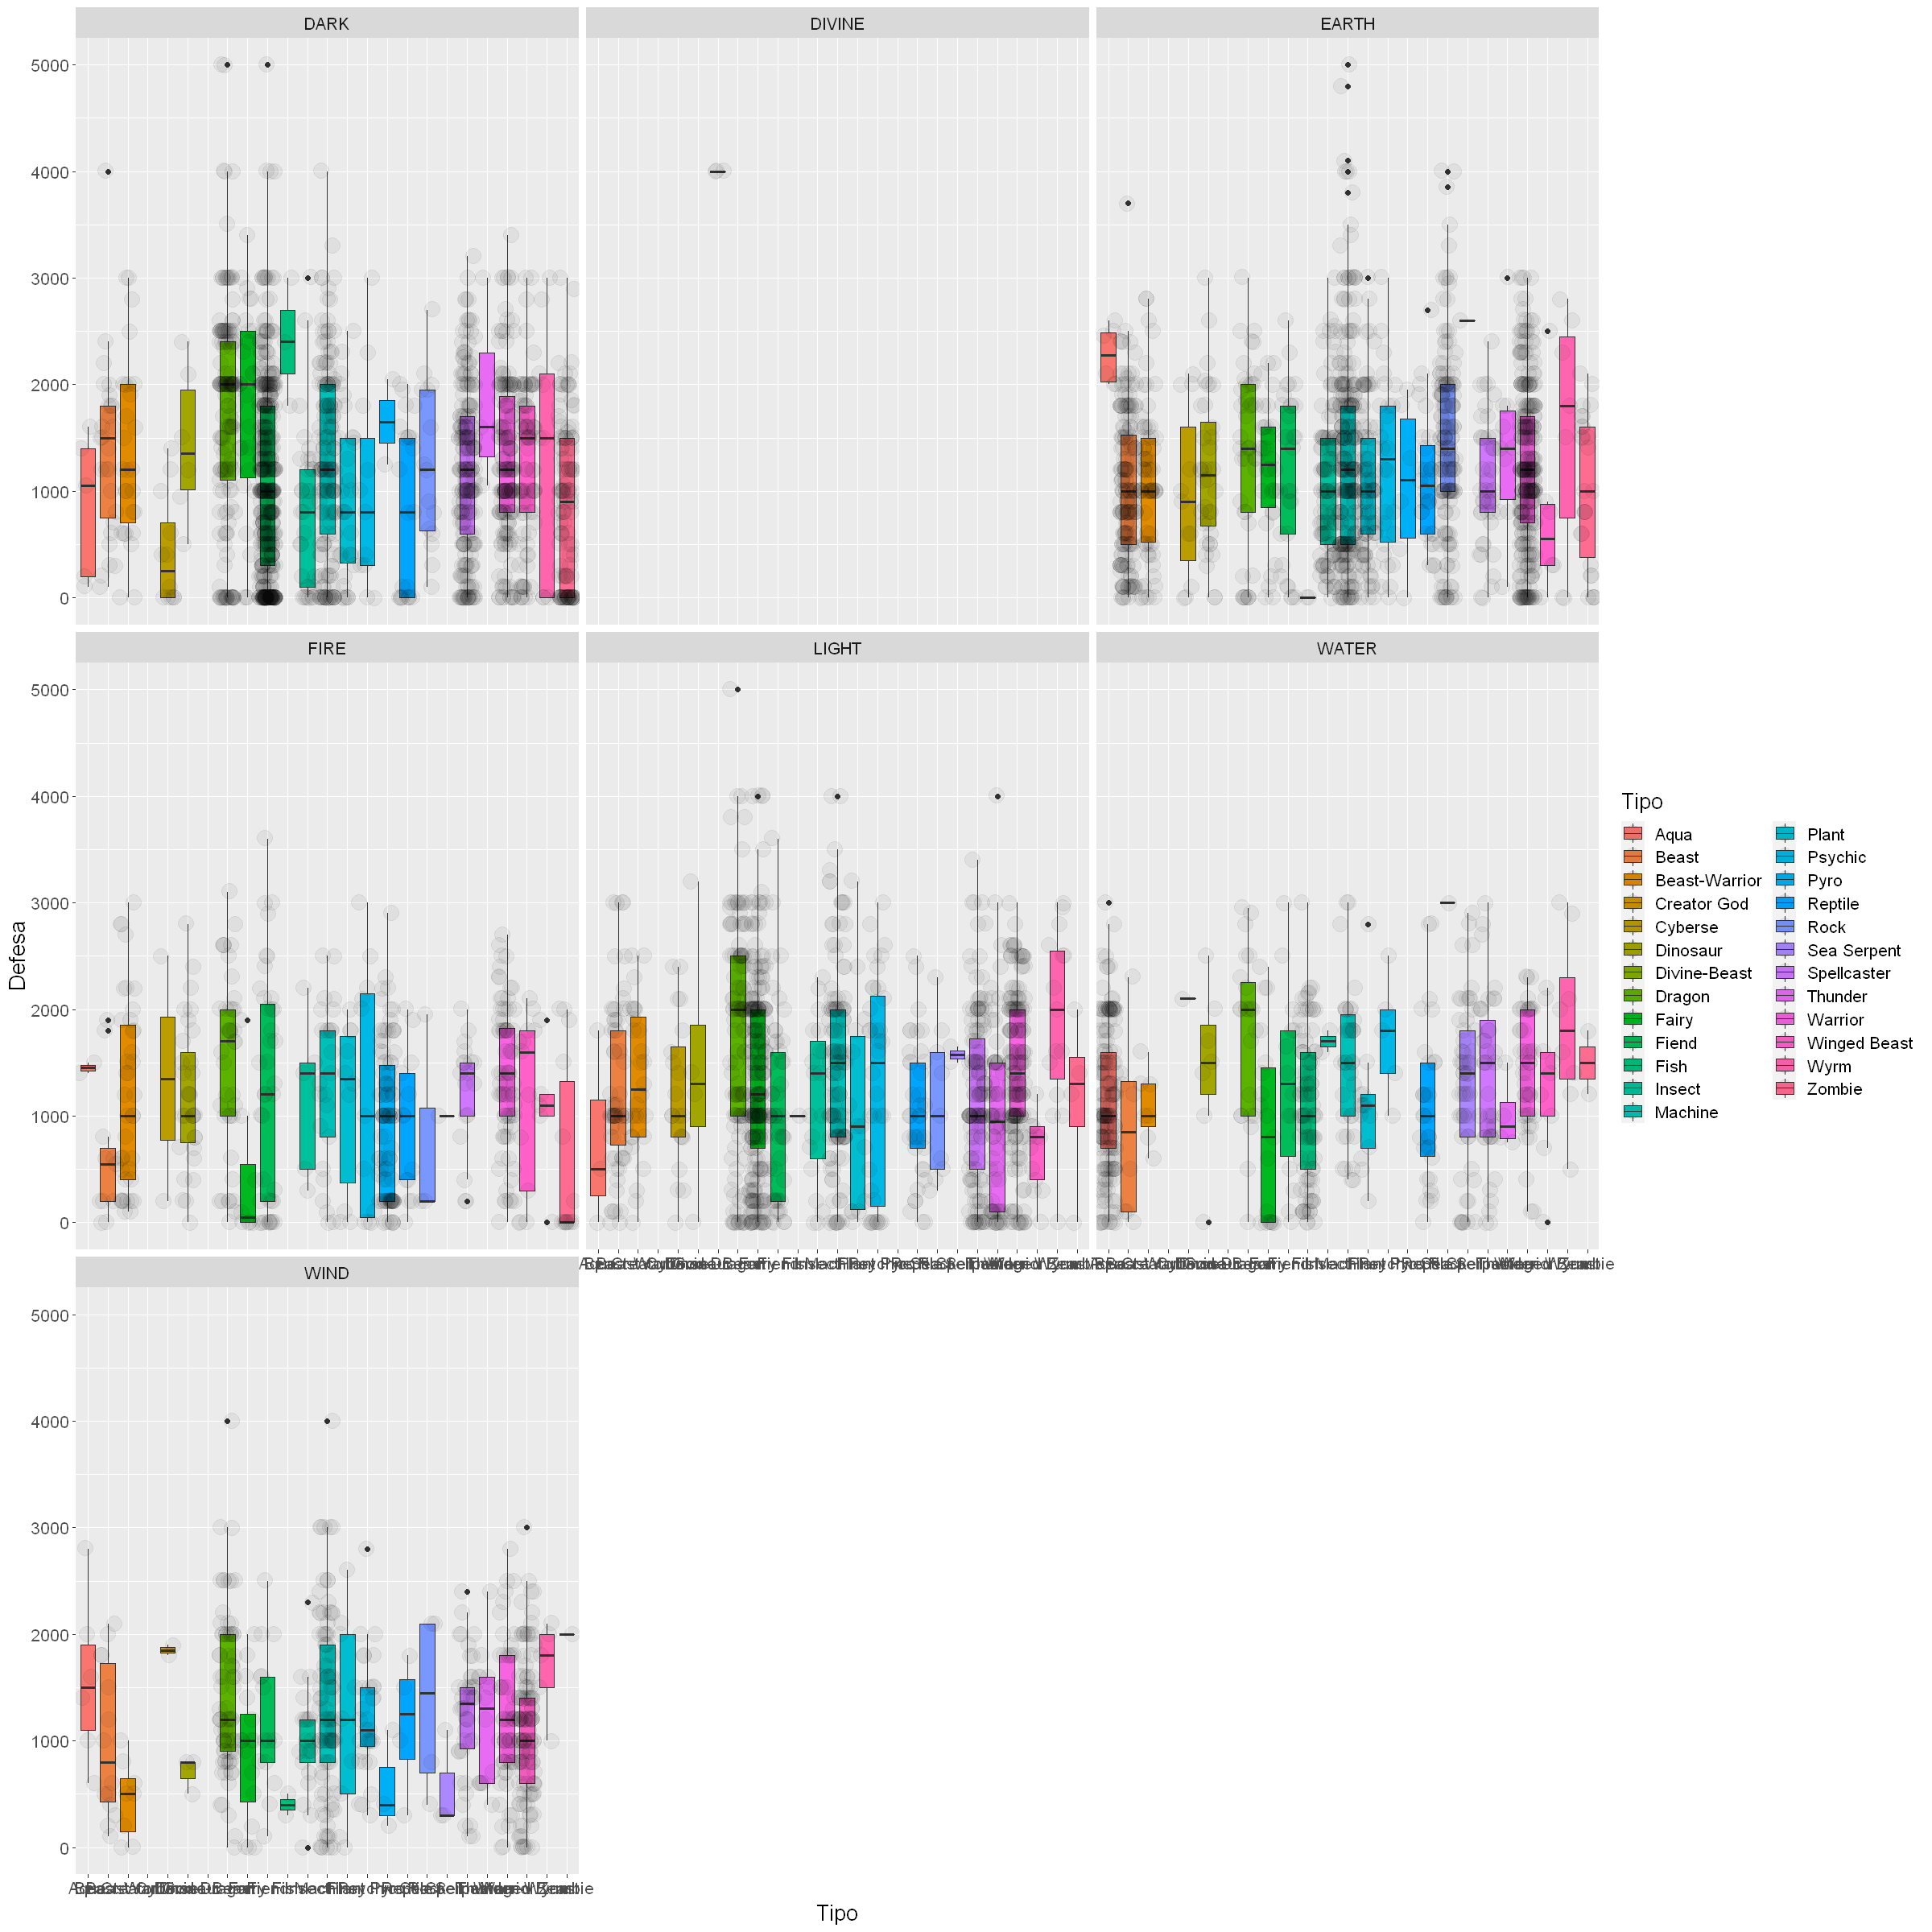

In [137]:
options(repr.plot.width=20, repr.plot.height=20)
ggplot(ygo, aes(x=Tipo, y=Defesa, fill=Tipo)) + 
    geom_boxplot(na.rm = TRUE) +
    geom_jitter(color="black", size=5.4, alpha=0.05, na.rm = TRUE)+
    theme_gray()+
    theme(text = element_text(size = 16))+
    facet_wrap(~Atributo)

# Visualizando Defesa por Atributos separado por Estrelas com Box Plot e sobreposição de dados

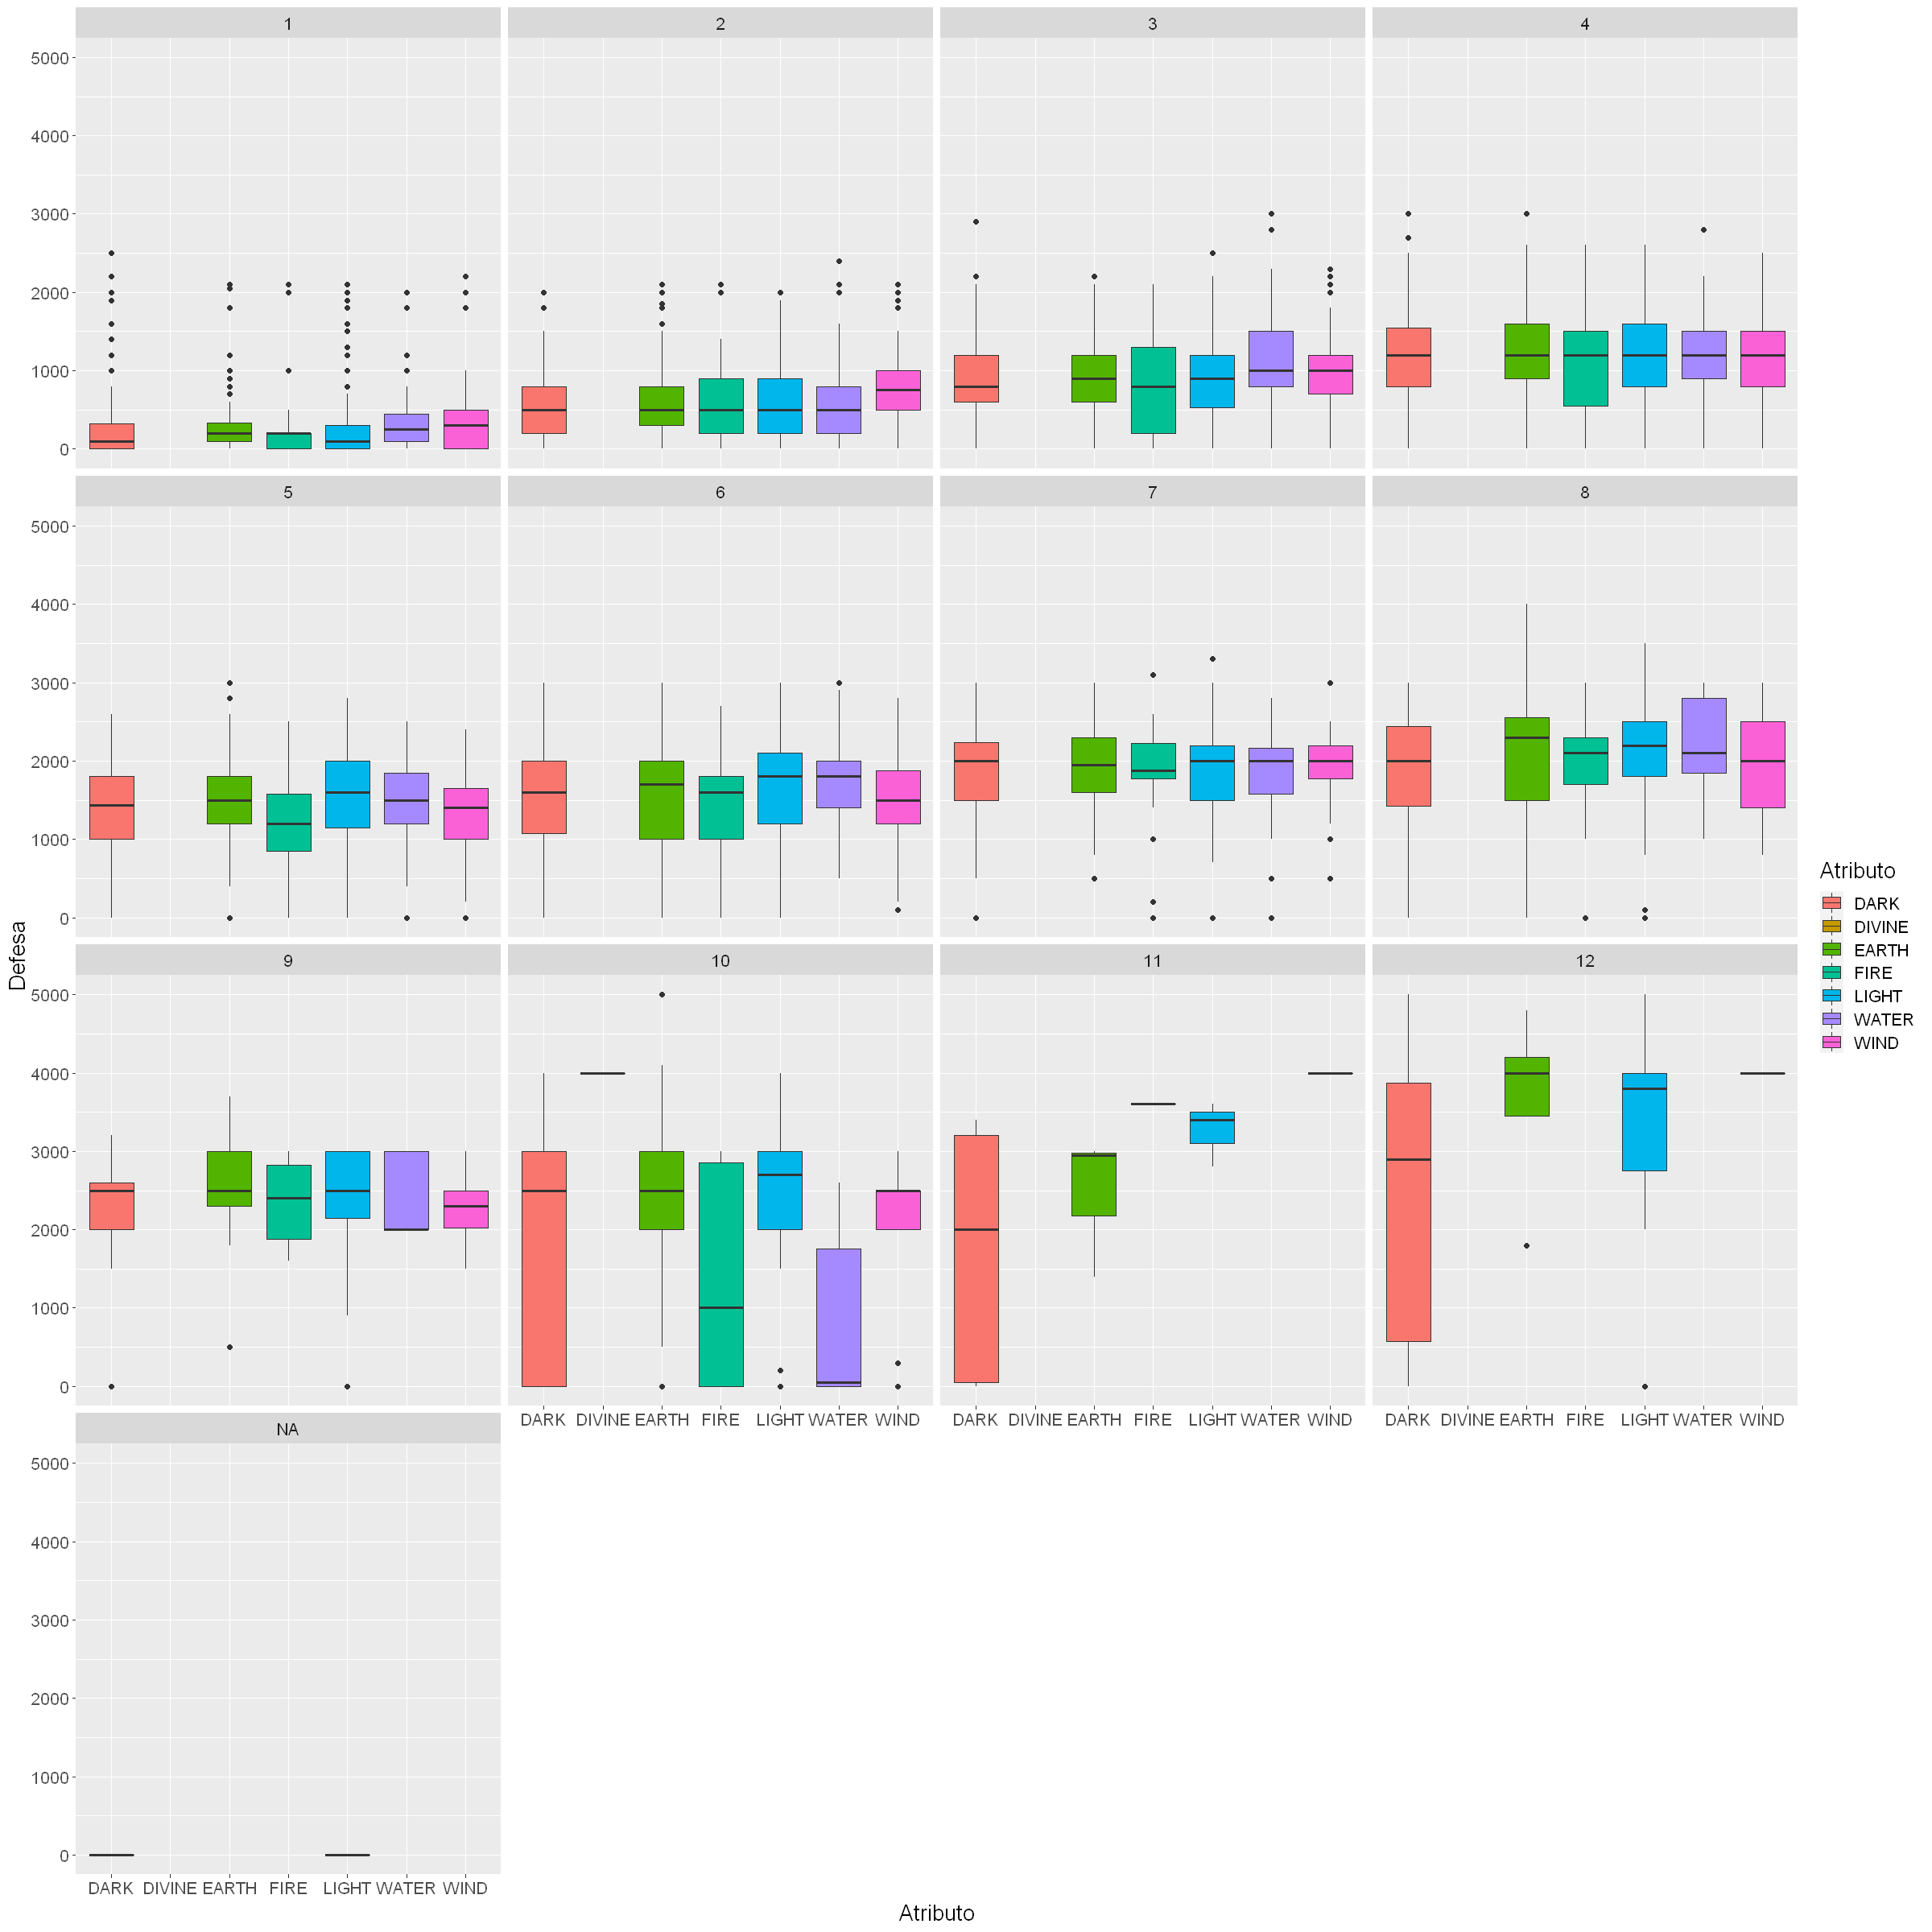

In [138]:
options(repr.plot.width=20, repr.plot.height=20)
ggplot(ygo, aes(x=Atributo, y=Defesa, fill=Atributo)) + 
    geom_boxplot(na.rm = TRUE) +
    theme_gray()+
    theme(text = element_text(size = 16))+
    facet_wrap(~estrelas)

Warning message in max(data$density):
"nenhum argumento não faltante para max; retornando -Inf"
Warning message:
"Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0"


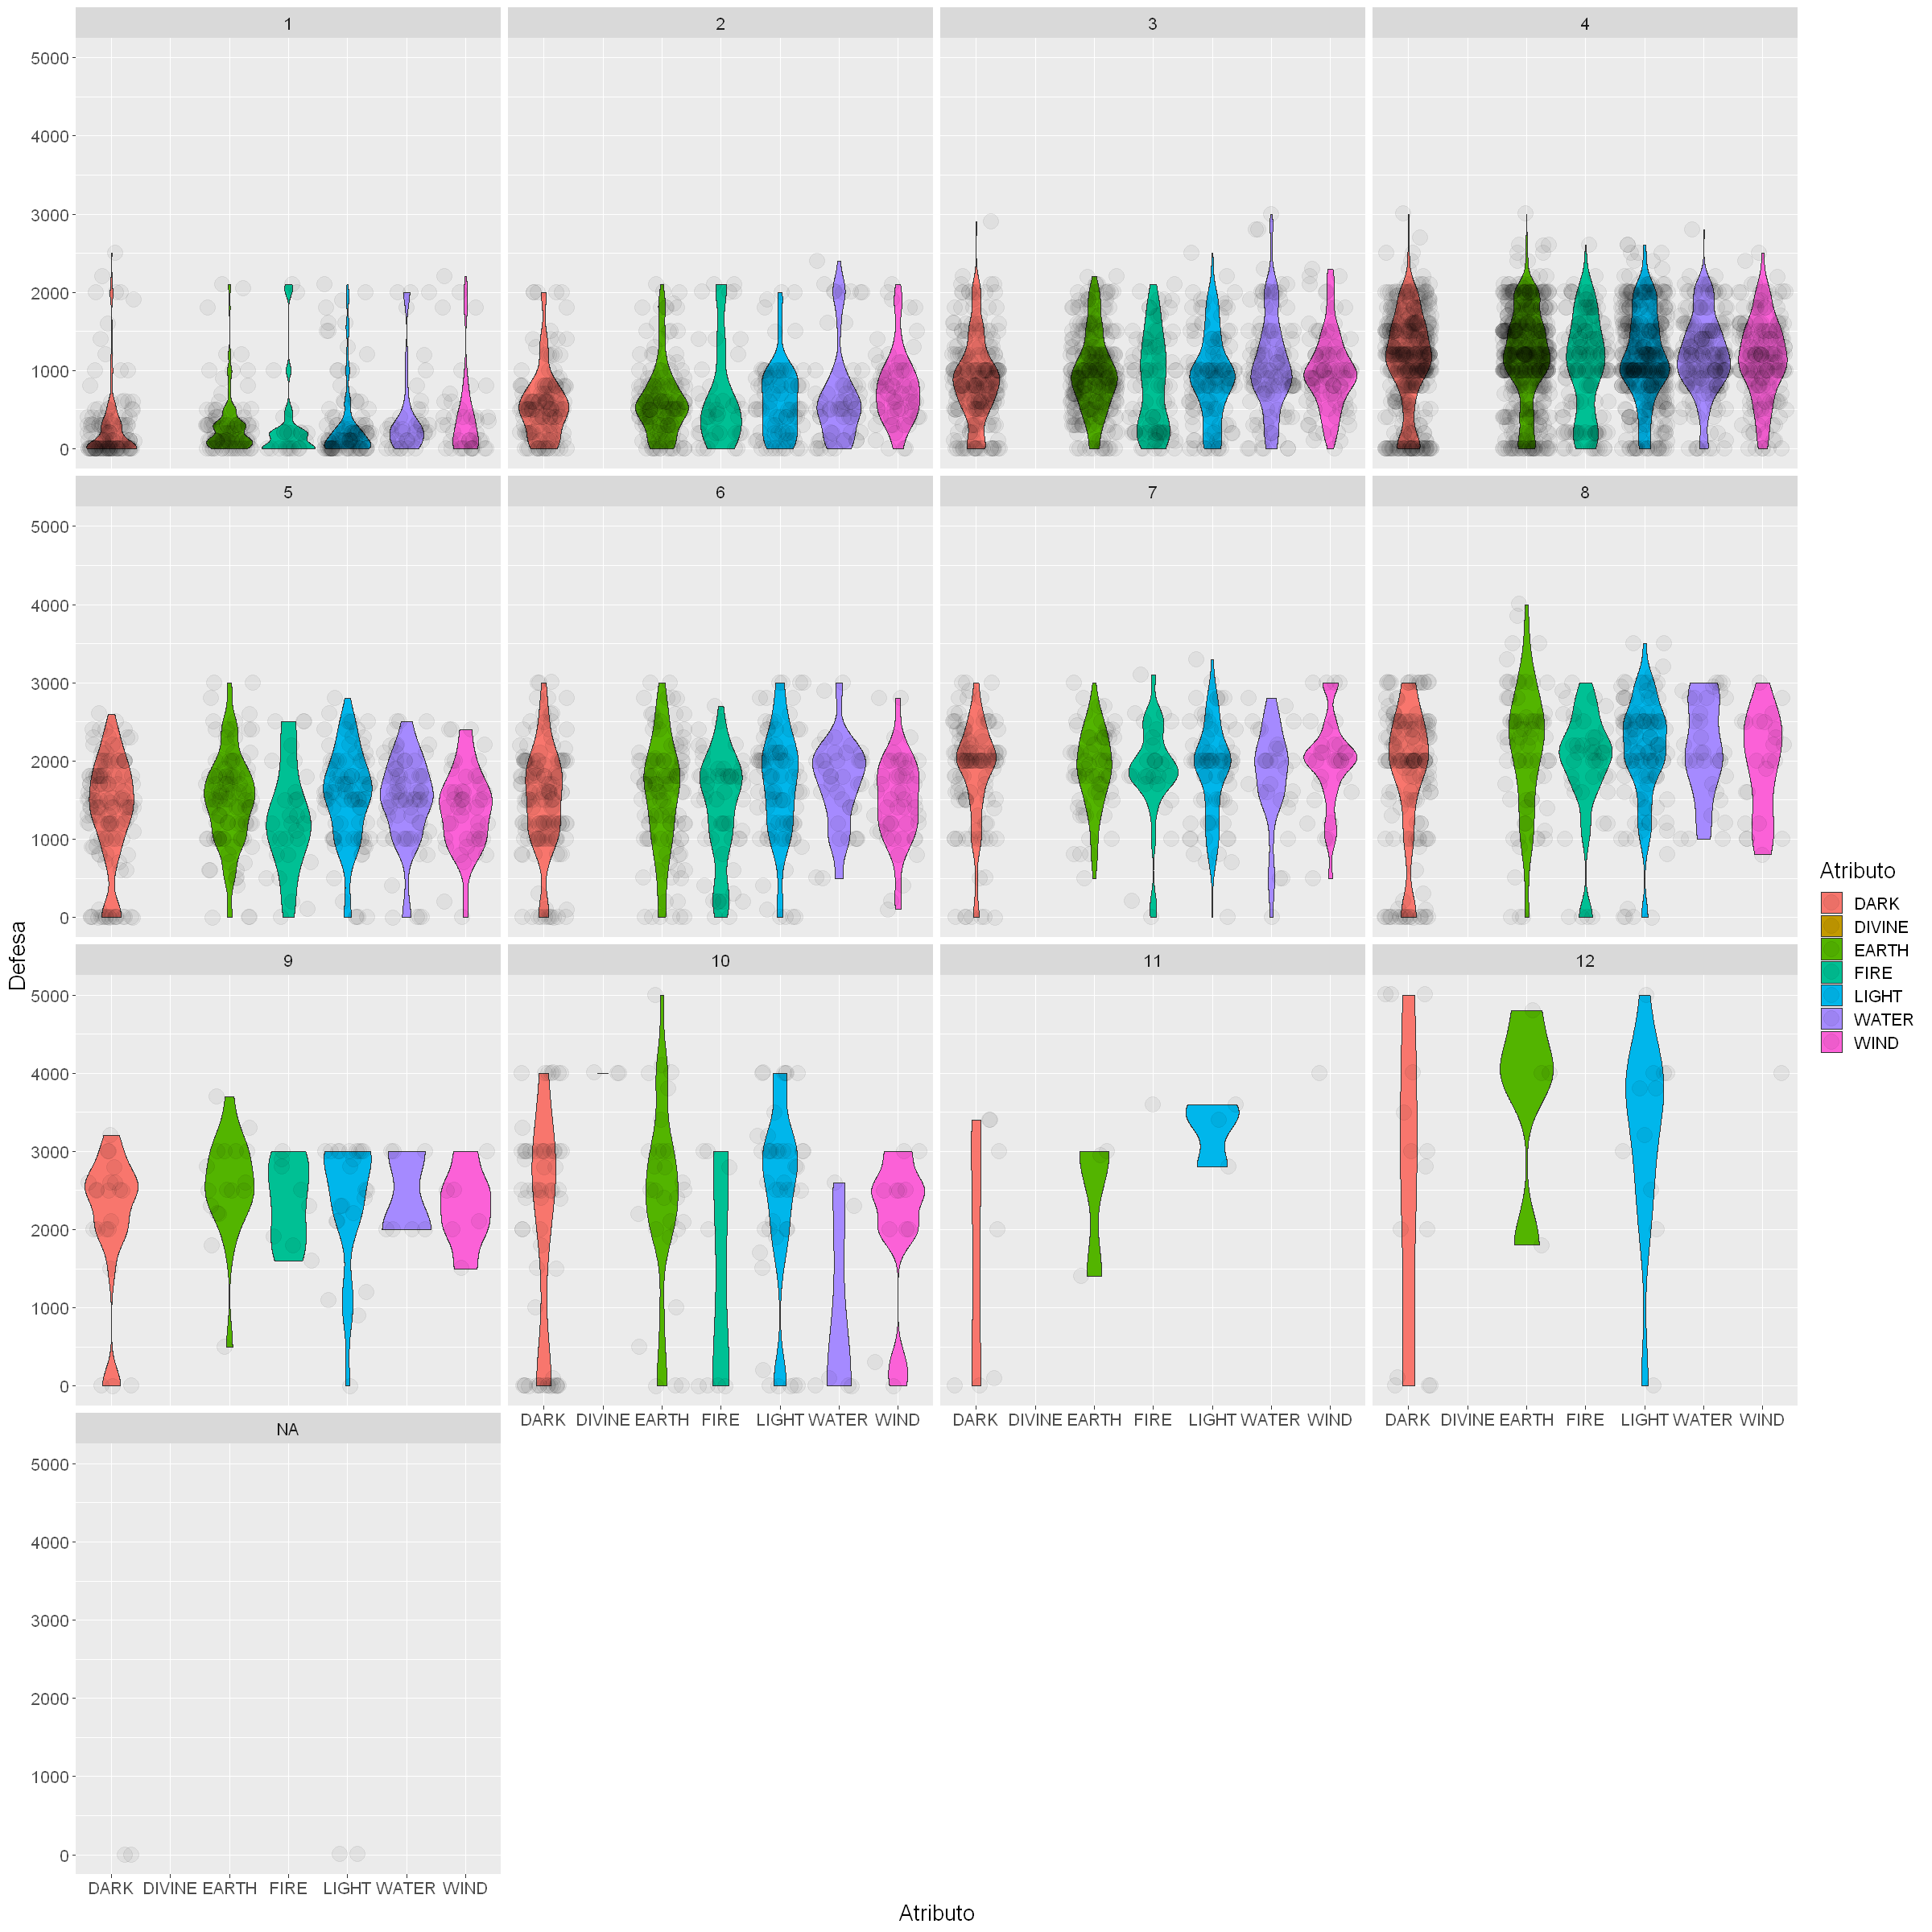

In [139]:
options(repr.plot.width=20, repr.plot.height=20)
ggplot(ygo, aes(x=Atributo, y=Defesa, fill=Atributo)) + 
    geom_violin(na.rm = TRUE) +
    geom_jitter(color="black", size=5.4, alpha=0.05, na.rm = TRUE)+
    theme_gray()+
    theme(text = element_text(size = 16))+
    facet_wrap(~estrelas)

# Observando a Relação entre Ataque e Estrelas

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



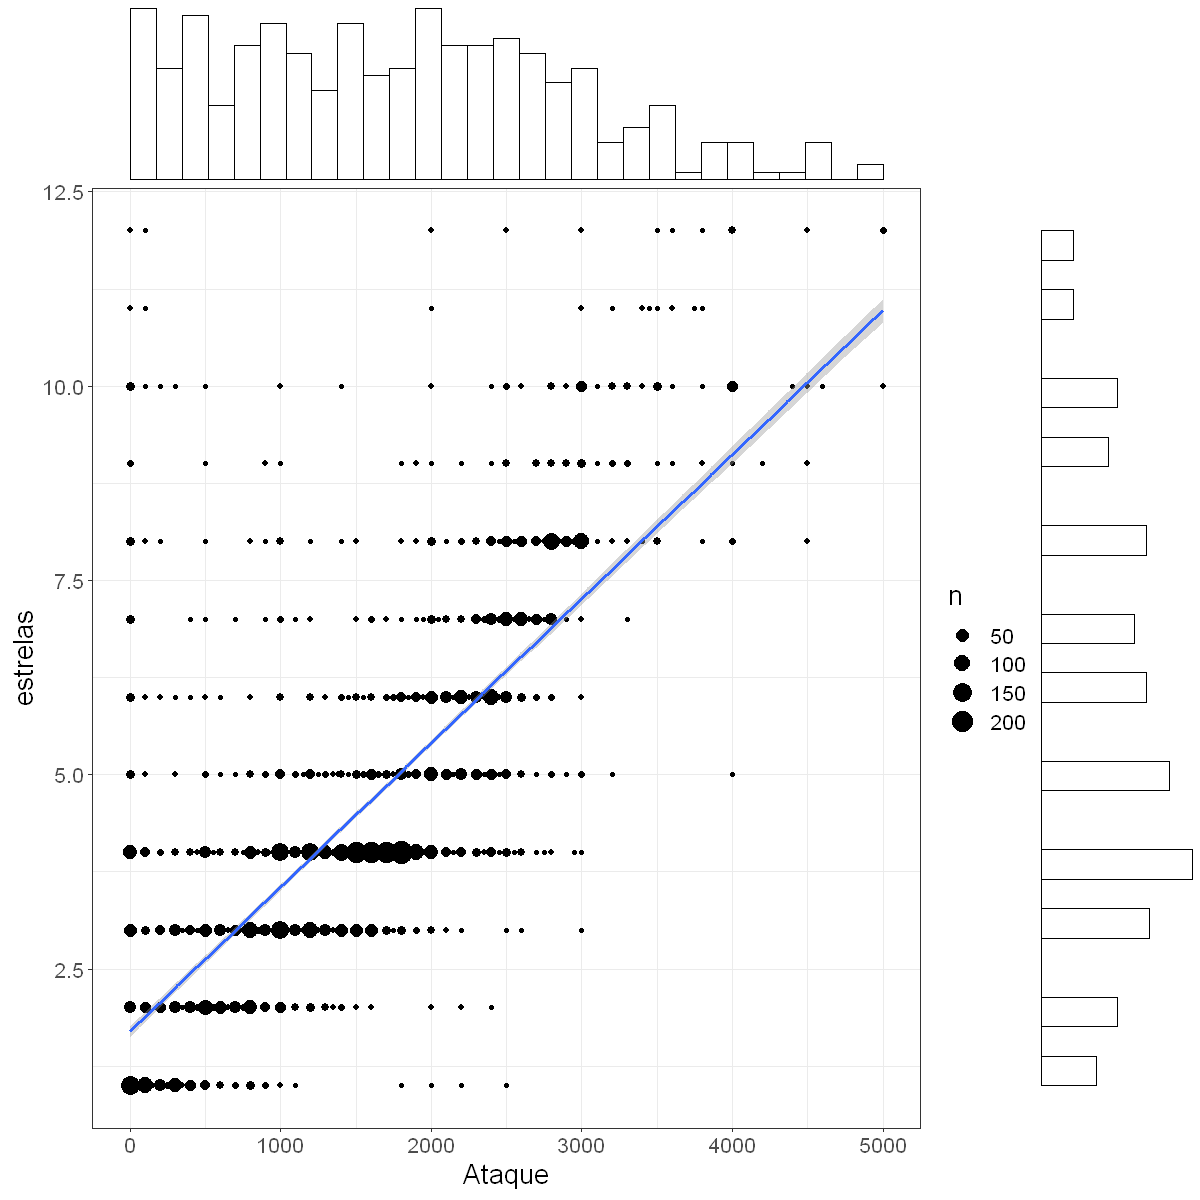

In [82]:
options(repr.plot.width=10, repr.plot.height=10)
g<-ggplot(ygo, aes(Ataque, estrelas)) + 
  geom_count(na.rm = TRUE) + 
  geom_smooth(method="lm", se=TRUE, na.rm = TRUE)+
  theme_bw()+
  theme(text = element_text(size = 16))
ggMarginal(g, type = "histogram", fill="transparent", na.rm=TRUE)


# Observando a Relação entre Defesa e Estrelas

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



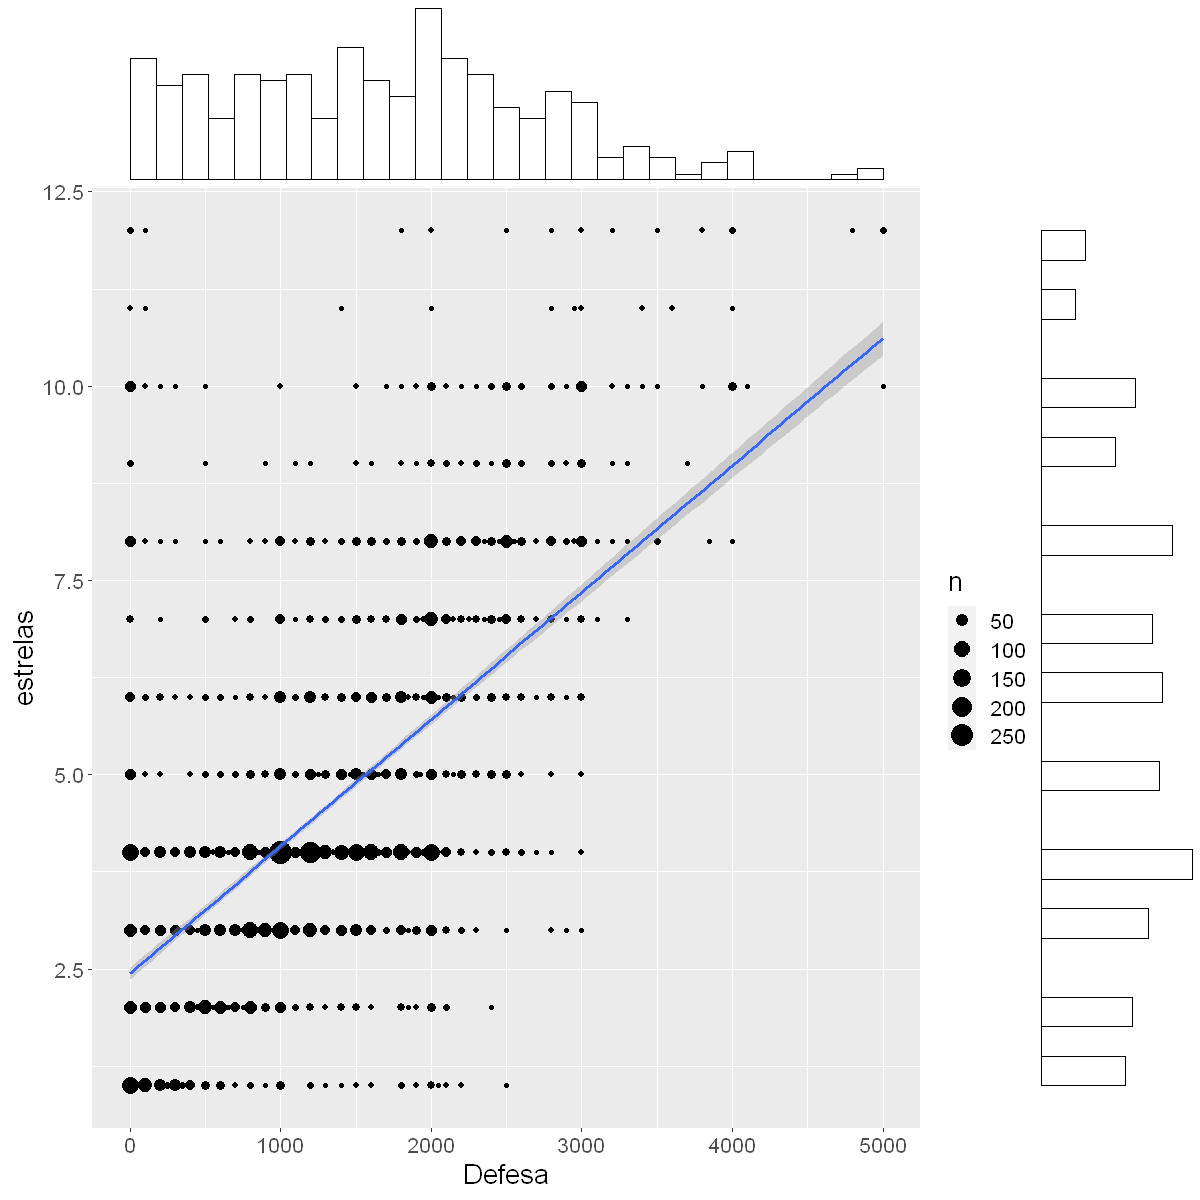

In [140]:
options(repr.plot.width=10, repr.plot.height=10)
g<-ggplot(ygo, aes(Defesa, estrelas)) + 
  geom_count(na.rm = TRUE) + 
  geom_smooth(method="lm", se=TRUE, na.rm = TRUE)+
  theme(text = element_text(size = 16))
ggMarginal(g, type = "histogram", fill="transparent", na.rm=TRUE)